<a href="https://colab.research.google.com/github/najkashyap/Linear_Regression_Model_CAR_DATA/blob/main/Linear_regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"1XnGV89yabTc_H_fwjqSLwrdmXaUVRqiy"})   # replace the id with id of file you want to access
downloaded.GetContentFile('auto-mpg.csv')        # replace the file name with your file

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
car_data = pd.read_csv("auto-mpg.csv")

In [6]:
# Displaying the data file of auto-mpg.csv
car_data

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[398 rows x 9 columns]

In [7]:
#Checking the columns in csv file
car_data .columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [8]:
# Just saving the brnd name of car in the columns of car name
brand_name = car_data["car name"].apply(lambda x:x.split(" ")[0])
car_data["car name"]= brand_name
car_data["car name"]


0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397        chevy
Name: car name, Length: 398, dtype: object

In [9]:
# reolacing the nicknames of brands
no_brands = car_data["car name"].unique()
no_brands

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [10]:
#replacing the nick-names with the original names of brands
car_data["car name"].replace("chevroelt","chevrolet",inplace=True)
car_data["car name"].replace("chevy","chevrolet",inplace=True)
car_data["car name"].replace("toyouta","toyota",inplace=True)
car_data["car name"].replace("mercedes-benz","mercedes",inplace=True)
car_data["car name"].replace("vw","volkswagen",inplace=True)
car_data["car name"].replace("maxda","mazda",inplace=True)
car_data['car name'].replace('vokswagen','volkswagen', inplace=True)

In [11]:
car_data["car name"].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'capri', 'mercedes', 'cadillac', 'triumph', 'nissan'], dtype=object)

In [12]:
car_data

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin    car name  
0            70       1   chevrolet  
1            70       1       buick  
2            70       1    plymouth  
3            70       1         amc  
4            70       1        ford  
..          ...     ...         ...  
393          82       1        ford  
394          82       2  volkswagen  
395          82       1       dodge  
396          82       1        ford  
397          82       1   chevrolet  

[398 rows x 9 columns]

In [13]:
#Convert text categories of brand names to codes
car_data["car name"]=car_data["car name"].astype("category").cat.codes
car_data

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin  car name  
0            70       1         6  
1            70       1         3  
2            70       1        21  
3            70       1         0  
4            70       1        11  
..          ...     ...       ...  
393          82       1        11  
394          82       2        28  
395          82       1         9  
396          82       1        11  
397          82       1         6  

[398 rows x 9 columns]

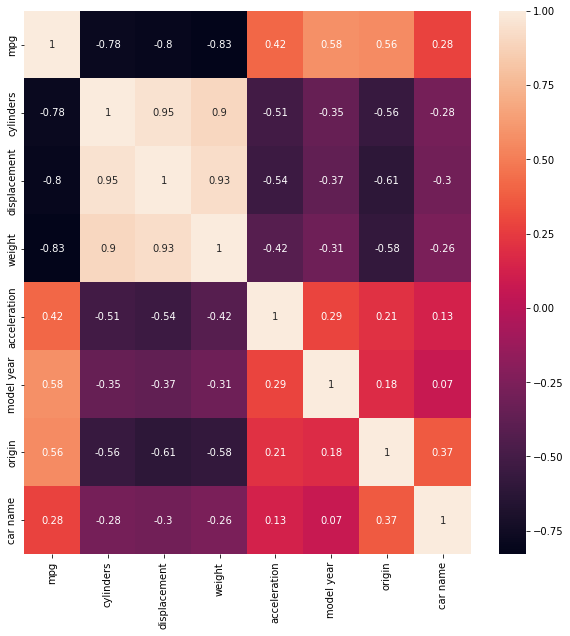

In [14]:
# A seaborn way to visulazie the data and its relations with each others
import seaborn as sns
correlation_matrix = car_data.corr().round(2)
plt.figure(figsize=[10,10])
sns.heatmap(data=correlation_matrix,annot = True)

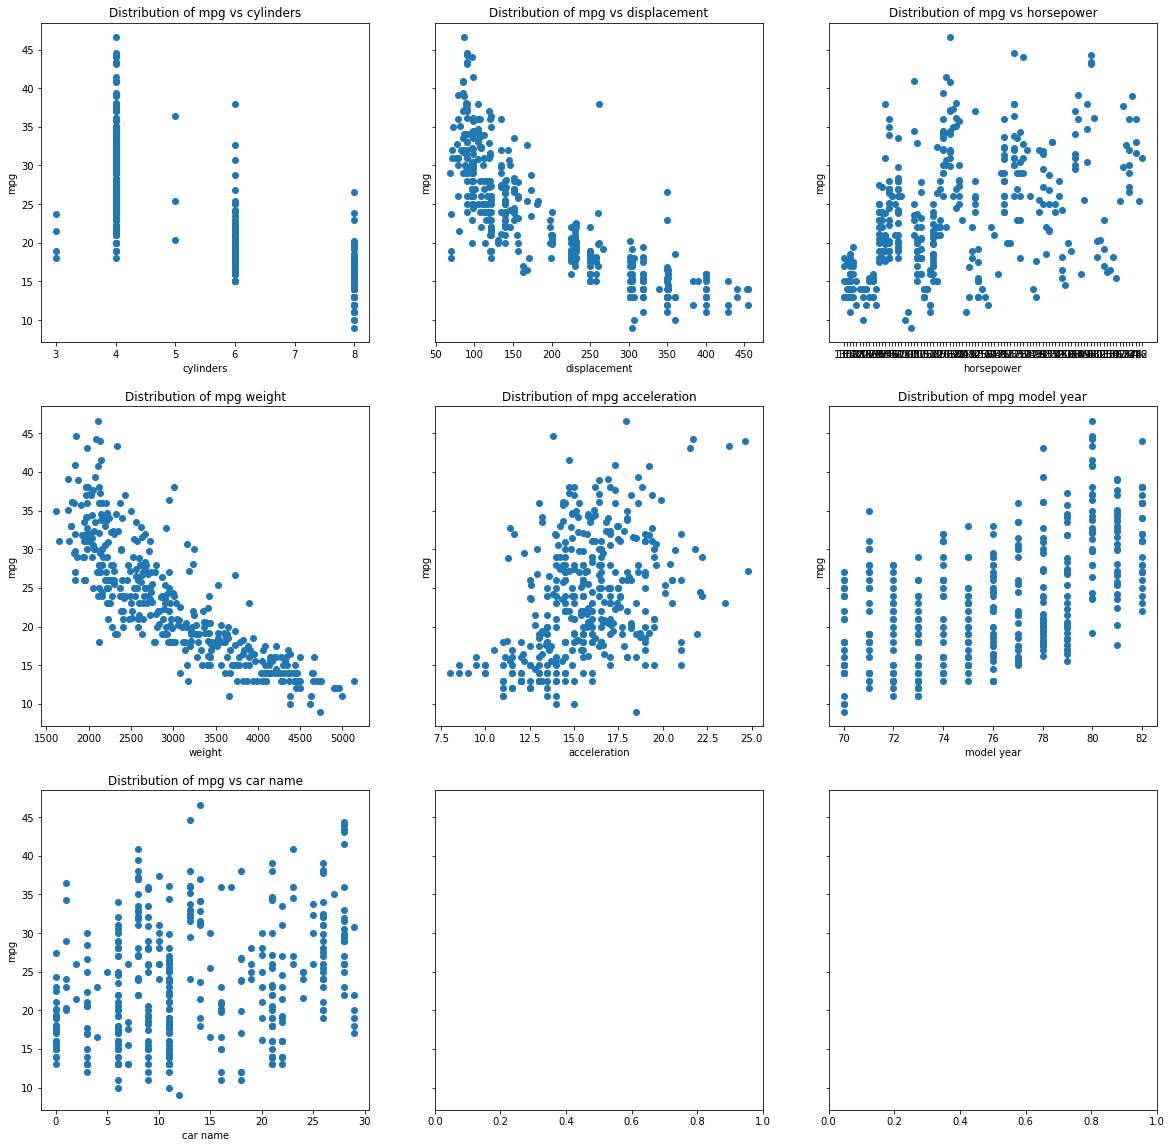

In [15]:
# Now I am making the feature mpg of the car as the target variable so I want to see the correlation of mpg with other fetures
x_features = car_data.columns
x_features
figure,ax = plt.subplots(3,3,figsize = [20,20],sharey = True)
for i in range(len(ax)):
  for j in range(len(ax)):
     if i == 0:
        ax[i,j].scatter(car_data[x_features[i+j+1]],car_data["mpg"])
        ax[i,j].set(title="Distribution of mpg vs " +x_features[i+j+1],xlabel = x_features[i+j+1],ylabel = "mpg")
     if i==1:
       ax[i,j].scatter(car_data[x_features[i+j+3]],car_data["mpg"])
       ax[i,j].set(title="Distribution of mpg " +x_features[i+j+3],xlabel = x_features[i+j+3],ylabel = "mpg")
ax[2,0].scatter(car_data["car name"],car_data["mpg"])
ax[2,0].set(title = "Distribution of mpg vs car name",xlabel= "car name",ylabel = "mpg")
plt.show()




/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


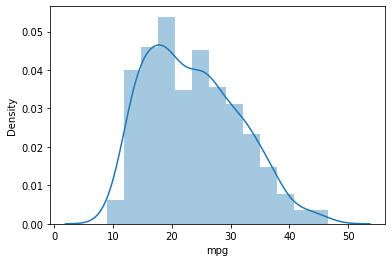

In [16]:
#distribution of mpg
sns.distplot(car_data["mpg"])

In [17]:
#create training set 
#Shuffle and copy 200 rows. Extract the mpg row as the target (train_sety)
from sklearn.utils import shuffle
car_data = shuffle(car_data)
training_set = car_data[:250]
testing_set = car_data[250:]
training_set_x = training_set.drop(columns = "mpg")
training_set_y = training_set["mpg"]
testing_set_x = testing_set.drop(columns = "mpg")
testing_set_y = testing_set["mpg"]


In [18]:
# Training and testing the MODEL =1: Based on the only one features weight taken in account
training_set_x_f1 = training_set_x["weight"]
training_set_x_f2 = np.square(training_set_x["weight"])
testing_set_x_f1 = testing_set_x["weight"]
testing_set_x_f2 = np.square(testing_set_x["weight"])



In [19]:
# scaling features
import random
training_set_x_f1_mu = np.mean(training_set_x_f1)
training_set_x_f2_mu =np.mean(training_set_x_f2)
training_set_x_f1_std = np.std(training_set_x_f1)
training_set_x_f2_std =np.std(training_set_x_f2)

In [20]:
# Normalising our features
norm_training_set_x_f1 = (training_set_x_f1 - training_set_x_f1_mu)/training_set_x_f1_std
norm_training_set_x_f2 = (training_set_x_f2-training_set_x_f2_mu)/training_set_x_f2_std

#setting the parameter of our model
alpha = 0.5
random.seed(1)
theta_0 = random.uniform(-10,10)
theta_1 = random.uniform(-10,10)
theta_2 = random.uniform(-10,10)
m = norm_training_set_x_f1.shape[0]
iteration_no = range(1,200)
j_hist = []

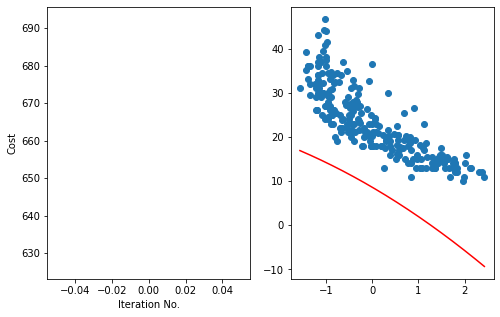

square_Error_value = 659.4148389744643, theta_0 = 8.087042441124012,theta_1 = -2.435071211755014,theta_2 = -3.997562899931438


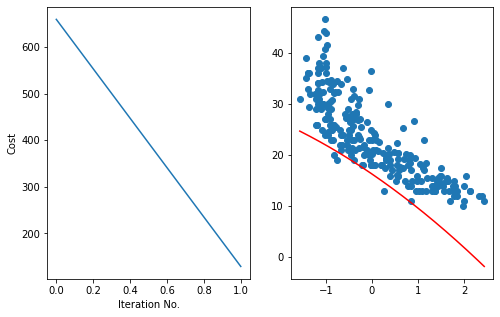

square_Error_value = 128.9832961650581, theta_0 = 15.786921220562006,theta_1 = -2.5251774526072874,theta_2 = -3.9773934039653764


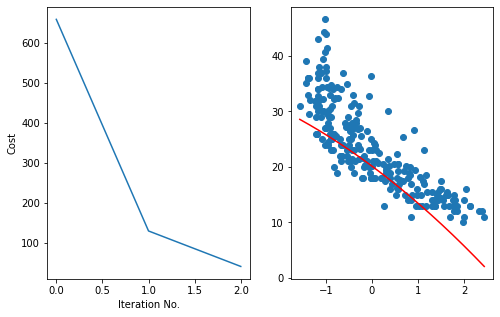

square_Error_value = 40.03650365109027, theta_0 = 19.636860610281,theta_1 = -2.580239713795448,theta_2 = -3.9225933071335266


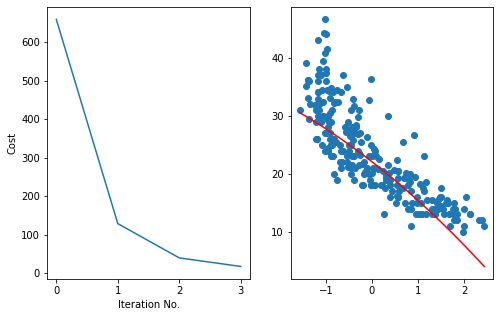

square_Error_value = 17.791406544385886, theta_0 = 21.5618303051405,theta_1 = -2.6349654695742872,theta_2 = -3.8678685341020227


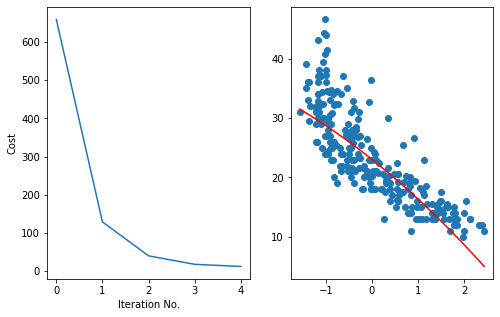

square_Error_value = 12.22118708991595, theta_0 = 22.52431515257025,theta_1 = -2.6894855931065256,theta_2 = -3.8133484142537037


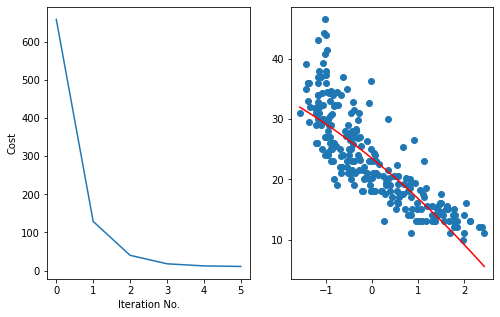

square_Error_value = 10.819753977901659, theta_0 = 23.005557576285124,theta_1 = -2.743801341085255,theta_2 = -3.7590326662887836


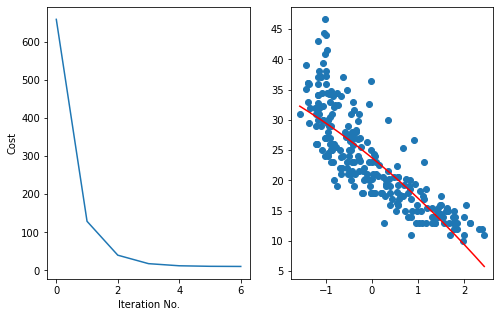

square_Error_value = 10.460583888614932, theta_0 = 23.24617878814256,theta_1 = -2.7979134814524373,theta_2 = -3.7049205259216533


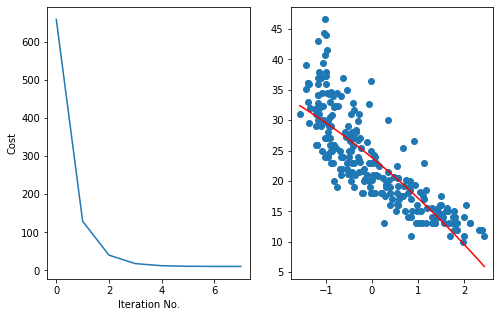

square_Error_value = 10.362045494966118, theta_0 = 23.36648939407128,theta_1 = -2.851822777456862,theta_2 = -3.651011229917229


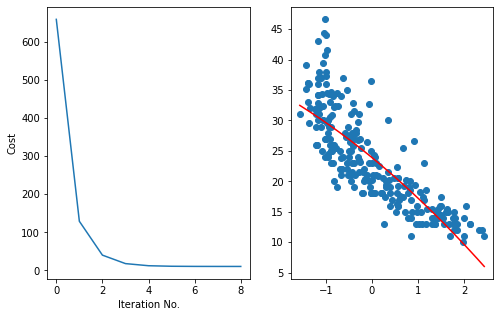

square_Error_value = 10.328730471745336, theta_0 = 23.42664469703564,theta_1 = -2.9055299894794087,theta_2 = -3.5973040178946825


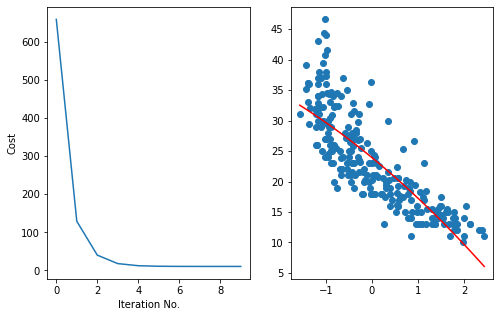

square_Error_value = 10.311786247905118, theta_0 = 23.456722348517822,theta_1 = -2.959035875050573,theta_2 = -3.5437981323235177


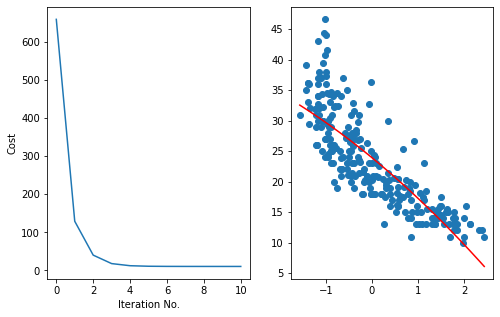

square_Error_value = 10.298999194603415, theta_0 = 23.471761174258912,theta_1 = -3.012341188861178,theta_2 = -3.4904928185129127


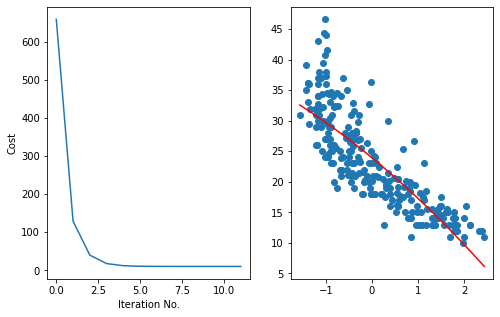

square_Error_value = 10.287315422186937, theta_0 = 23.479280587129455,theta_1 = -3.065446682773018,theta_2 = -3.437387324601073


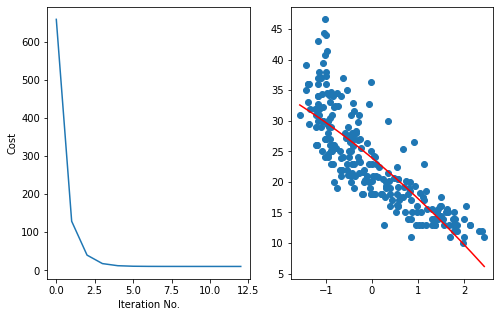

square_Error_value = 10.275970979409777, theta_0 = 23.483040293564727,theta_1 = -3.1183531058294633,theta_2 = -3.384480901544627


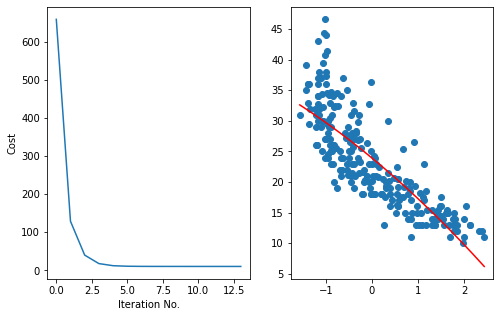

square_Error_value = 10.264774403211032, theta_0 = 23.484920146782365,theta_1 = -3.1710612042660276,theta_2 = -3.331772803108063


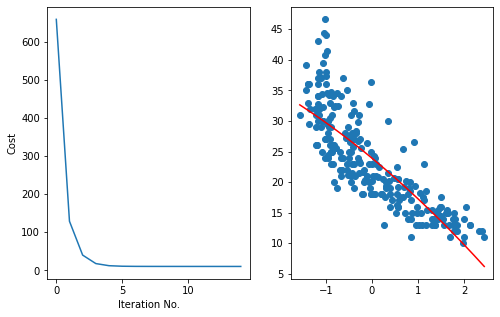

square_Error_value = 10.253677356132407, theta_0 = 23.48586007339118,theta_1 = -3.2235717215208894,theta_2 = -3.279262285853201


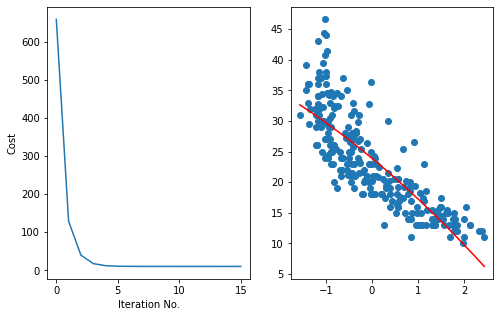

square_Error_value = 10.242667285646002, theta_0 = 23.48633003669559,theta_1 = -3.2758853982453826,theta_2 = -3.226948609128708


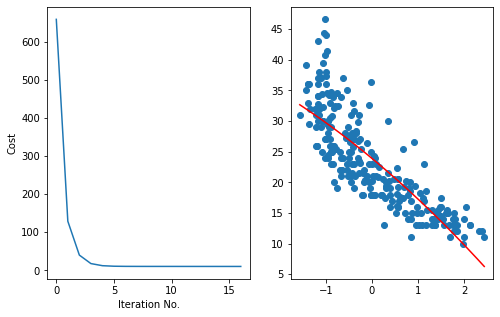

square_Error_value = 10.231740588959845, theta_0 = 23.486565018347797,theta_1 = -3.3280029723144393,theta_2 = -3.1748310350596514


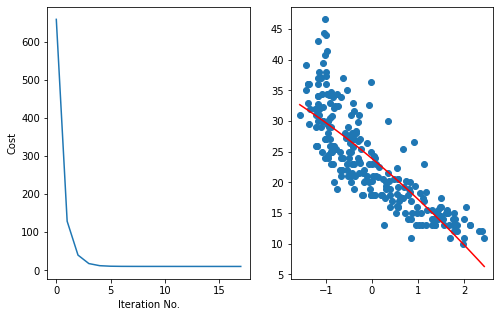

square_Error_value = 10.220895904193055, theta_0 = 23.4866825091739,theta_1 = -3.3799251788370004,theta_2 = -3.1229088285370903


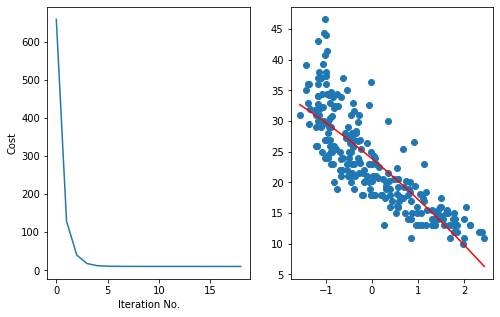

square_Error_value = 10.210132433143622, theta_0 = 23.48674125458695,theta_1 = -3.4316527501663825,theta_2 = -3.071181257207708


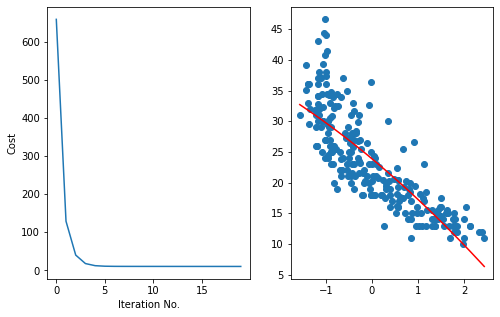

square_Error_value = 10.199449521954515, theta_0 = 23.486770627293474,theta_1 = -3.483186415910608,theta_2 = -3.0196475914634826


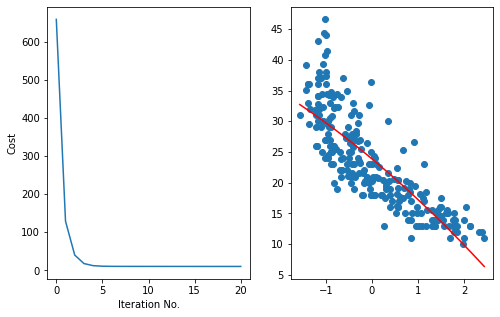

square_Error_value = 10.188846556254592, theta_0 = 23.486785313646738,theta_1 = -3.5345269029426962,theta_2 = -2.9683071044313944


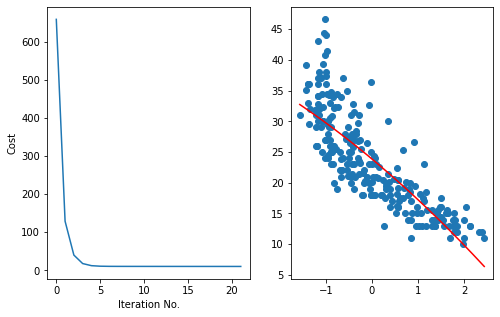

square_Error_value = 10.178322934918372, theta_0 = 23.48679265682337,theta_1 = -3.585674935410916,theta_2 = -2.917159071963175


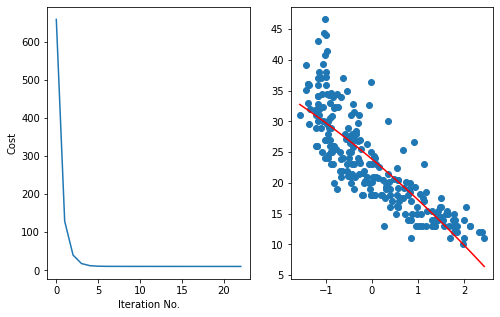

square_Error_value = 10.167878063480739, theta_0 = 23.486796328411685,theta_1 = -3.6366312347489984,theta_2 = -2.8662027726250923


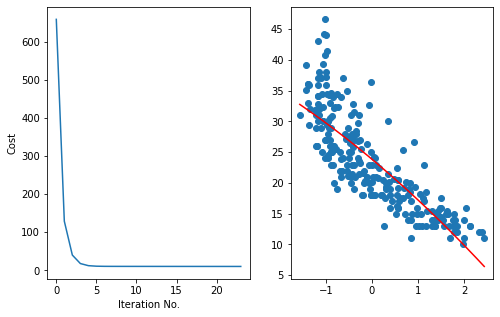

square_Error_value = 10.157511352465555, theta_0 = 23.486798164205844,theta_1 = -3.687396519686315,theta_2 = -2.8154374876877757


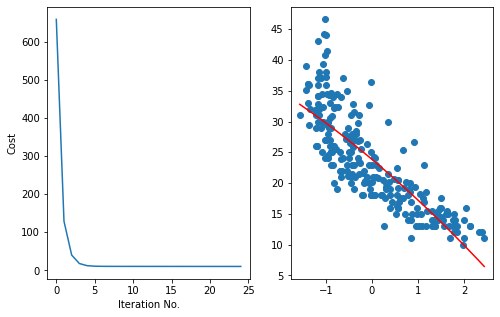

square_Error_value = 10.147222216942941, theta_0 = 23.486799082102923,theta_1 = -3.7379715062580128,theta_2 = -2.764862501116078


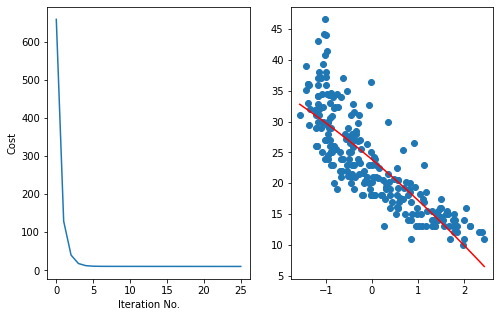

square_Error_value = 10.137010076393901, theta_0 = 23.48679954105146,theta_1 = -3.788356907815115,theta_2 = -2.7144770995589753


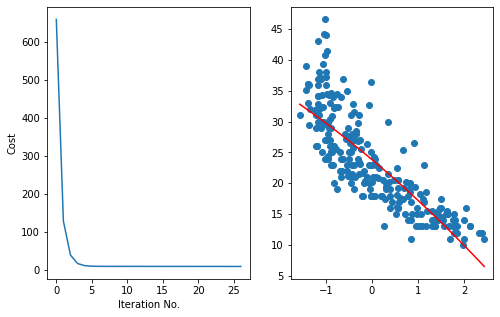

square_Error_value = 10.126874354651994, theta_0 = 23.48679977052573,theta_1 = -3.838553435034583,theta_2 = -2.6642805723395075


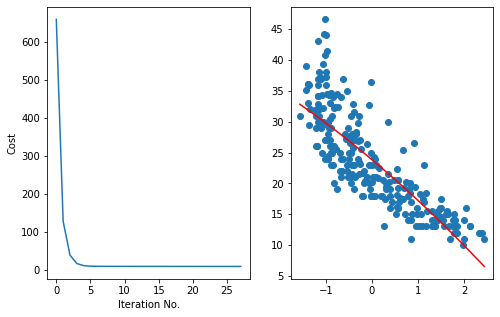

square_Error_value = 10.116814479864415, theta_0 = 23.486799885262865,theta_1 = -3.888561795929339,theta_2 = -2.6142722114447516


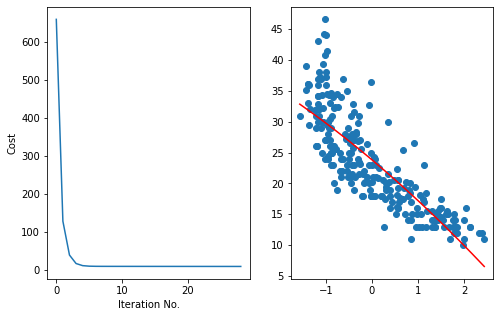

square_Error_value = 10.106829884458143, theta_0 = 23.486799942631432,theta_1 = -3.938382695858254,theta_2 = -2.5644513115158367


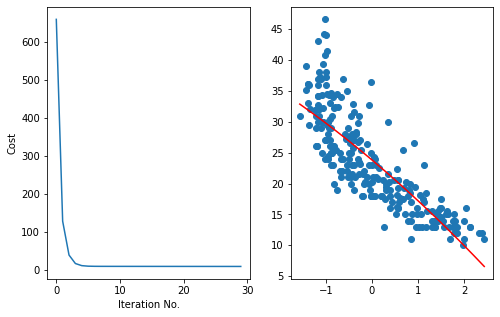

square_Error_value = 10.096920005107506, theta_0 = 23.486799971315715,theta_1 = -3.9880168375360956,theta_2 = -2.514817169837995


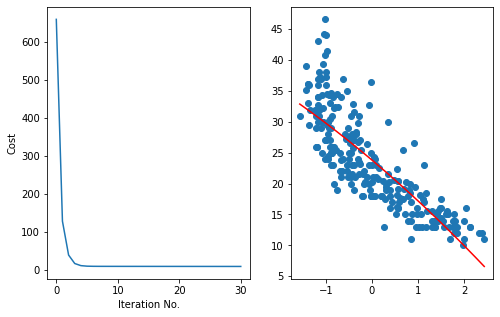

square_Error_value = 10.087084282702312, theta_0 = 23.486799985657857,theta_1 = -4.037464921043441,theta_2 = -2.46536908633065


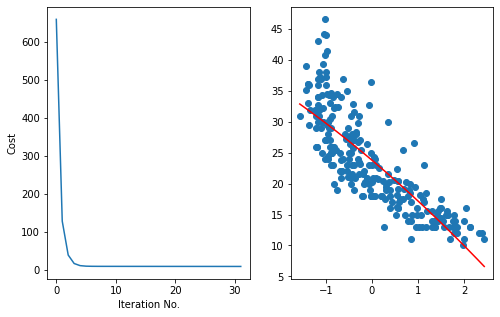

square_Error_value = 10.077322162316264, theta_0 = 23.486799992828928,theta_1 = -4.086727643836548,theta_2 = -2.4161063635375424


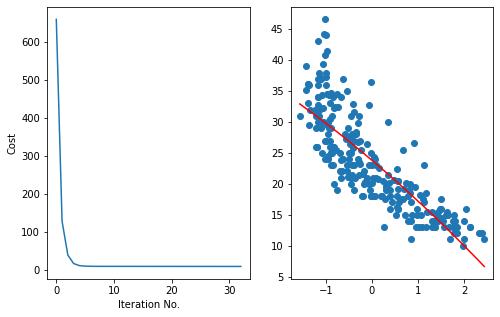

square_Error_value = 10.06763309317567, theta_0 = 23.486799996414465,theta_1 = -4.135805700757199,theta_2 = -2.3670283066168913


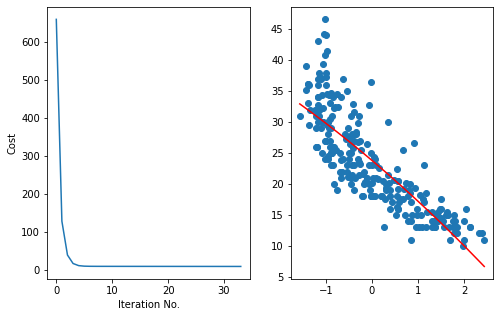

square_Error_value = 10.05801652862834, theta_0 = 23.486799998207232,theta_1 = -4.184699784042496,theta_2 = -2.318134223331595


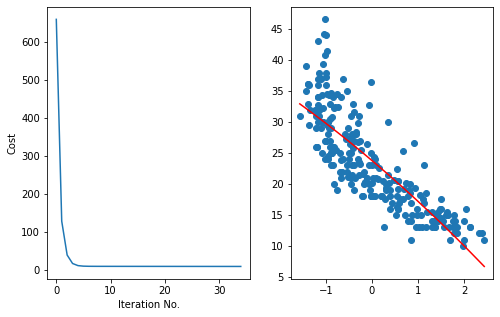

square_Error_value = 10.048471926112756, theta_0 = 23.486799999103617,theta_1 = -4.233410583334624,theta_2 = -2.2694234240394664


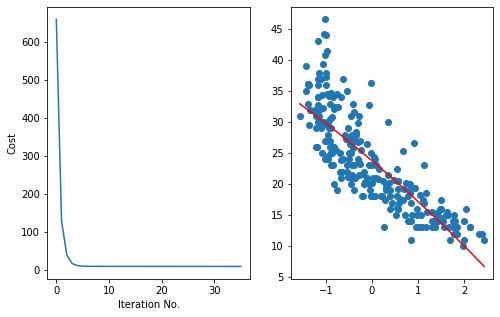

square_Error_value = 10.038998747127462, theta_0 = 23.48679999955181,theta_1 = -4.281938785690584,theta_2 = -2.2208952216835067


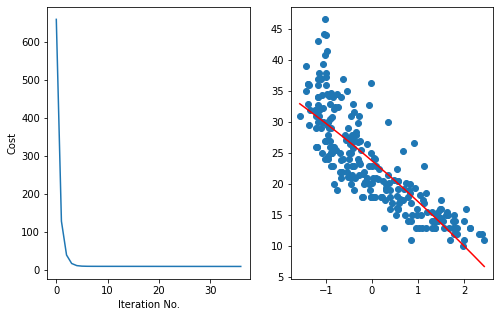

square_Error_value = 10.029596457200679, theta_0 = 23.486799999775904,theta_1 = -4.330285075591878,theta_2 = -2.172548931782213


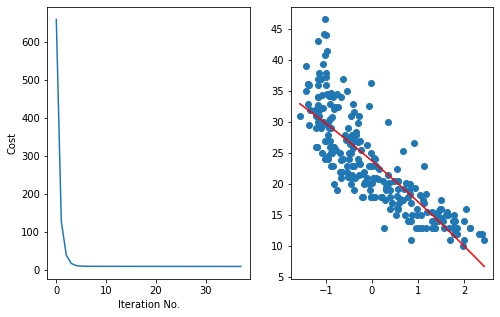

square_Error_value = 10.020264525860155, theta_0 = 23.486799999887953,theta_1 = -4.378450134954166,theta_2 = -2.1243838724199247


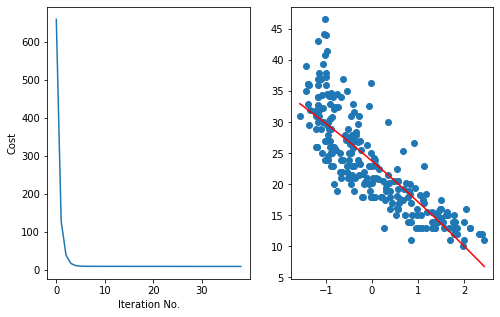

square_Error_value = 10.011002426603229, theta_0 = 23.486799999943976,theta_1 = -4.4264346431368855,theta_2 = -2.0763993642372047


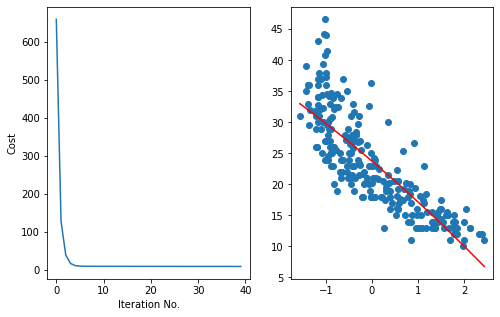

square_Error_value = 10.001809636867126, theta_0 = 23.48679999997199,theta_1 = -4.474239276952831,theta_2 = -2.028594730421259


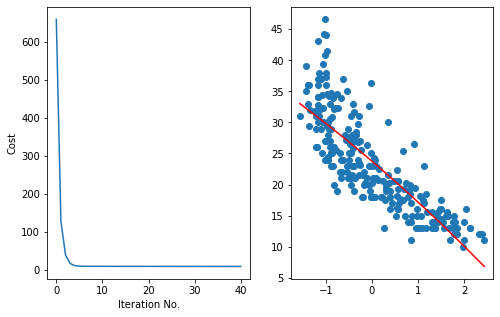

square_Error_value = 9.99268563799949, theta_0 = 23.486799999985994,theta_1 = -4.521864710677703,theta_2 = -1.9809692966963877


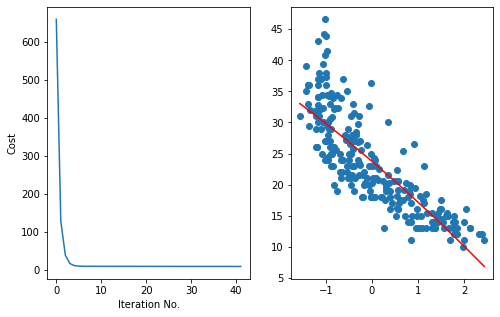

square_Error_value = 9.98362991522909, theta_0 = 23.486799999992996,theta_1 = -4.569311616059615,theta_2 = -1.9335223913144755


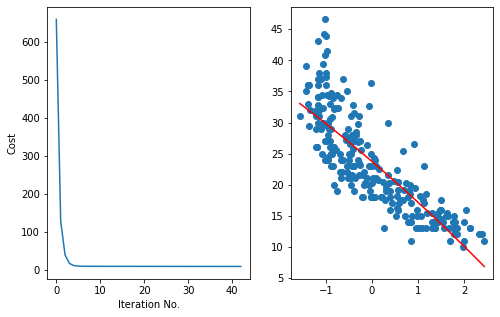

square_Error_value = 9.974641957636818, theta_0 = 23.4867999999965,theta_1 = -4.616580662328572,theta_2 = -1.8862533450455186


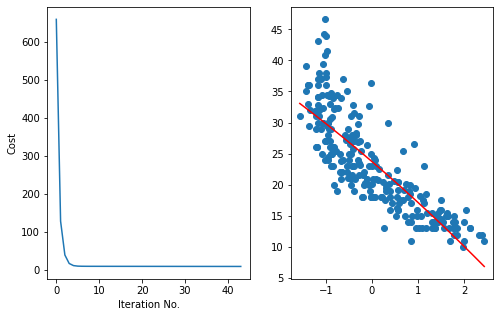

square_Error_value = 9.965721258126825, theta_0 = 23.48679999999825,theta_1 = -4.663672516205909,theta_2 = -1.8391614911681817


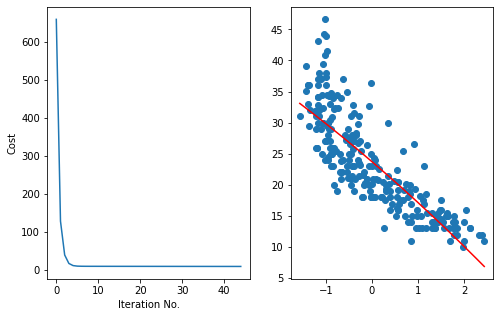

square_Error_value = 9.95686731339794, theta_0 = 23.486799999999125,theta_1 = -4.710587841913693,theta_2 = -1.7922461654603976


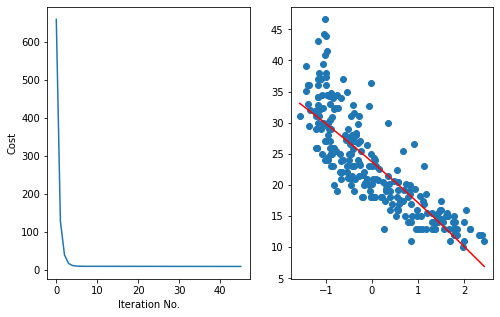

square_Error_value = 9.948079623915252, theta_0 = 23.486799999999562,theta_1 = -4.757327301184094,theta_2 = -1.745506706189997


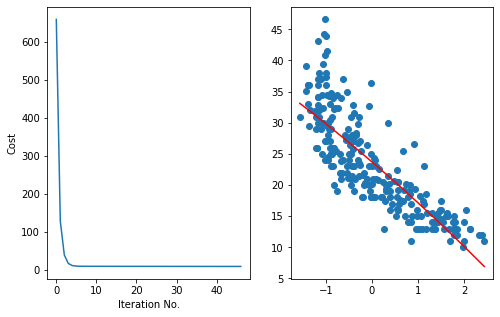

square_Error_value = 9.939357693881943, theta_0 = 23.486799999999782,theta_1 = -4.803891553268717,theta_2 = -1.698942454105374


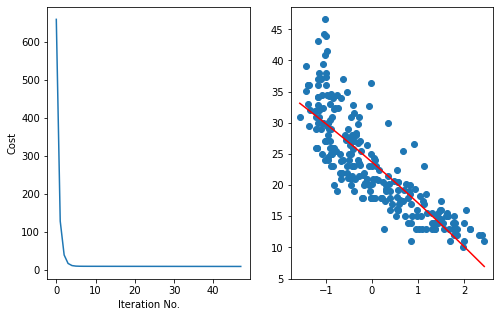

square_Error_value = 9.9307010312113, theta_0 = 23.486799999999892,theta_1 = -4.850281254947903,theta_2 = -1.652552752426188


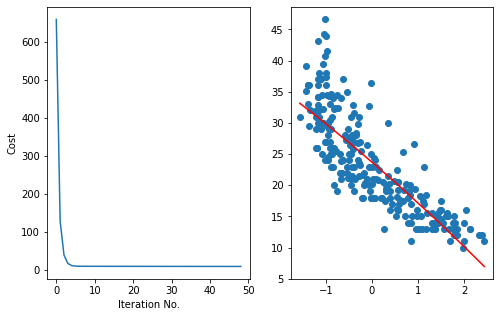

square_Error_value = 9.922109147498974, theta_0 = 23.486799999999945,theta_1 = -4.896497060539988,theta_2 = -1.606336946834102


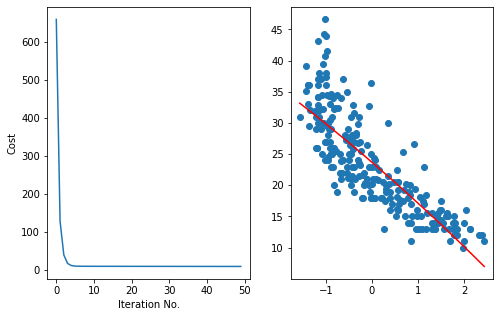

square_Error_value = 9.913581557995396, theta_0 = 23.486799999999974,theta_1 = -4.94253962191054,theta_2 = -1.5602943854635507


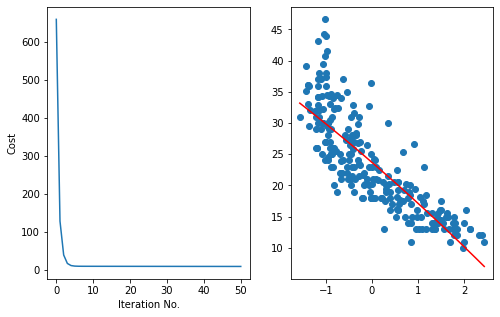

square_Error_value = 9.905117781578452, theta_0 = 23.486799999999988,theta_1 = -4.988409588481544,theta_2 = -1.5144244188925462


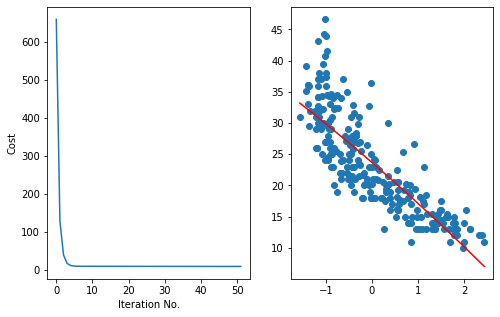

square_Error_value = 9.896717340726328, theta_0 = 23.486799999999995,theta_1 = -5.0341076072405695,theta_2 = -1.4687264001335207


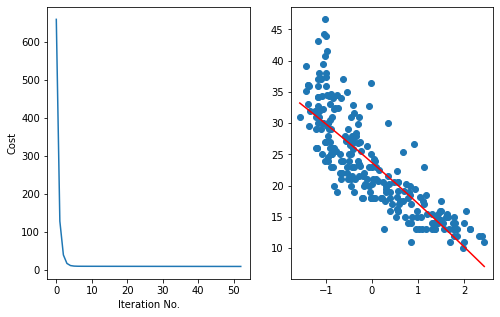

square_Error_value = 9.888379761490564, theta_0 = 23.4868,theta_1 = -5.079634322749892,theta_2 = -1.4231996846241983


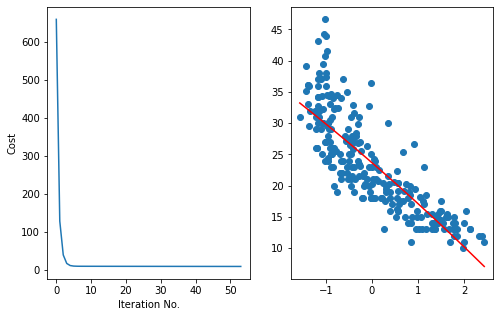

square_Error_value = 9.880104573469323, theta_0 = 23.4868,theta_1 = -5.124990377155586,theta_2 = -1.3778436302185044


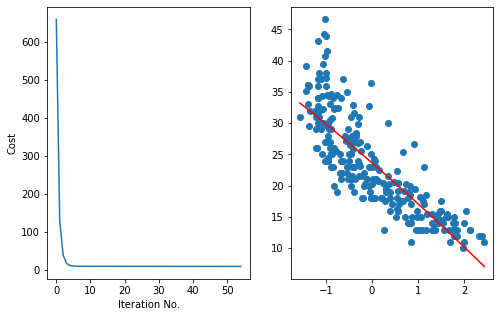

square_Error_value = 9.87189130978085, theta_0 = 23.4868,theta_1 = -5.170176410196582,theta_2 = -1.332657597177508


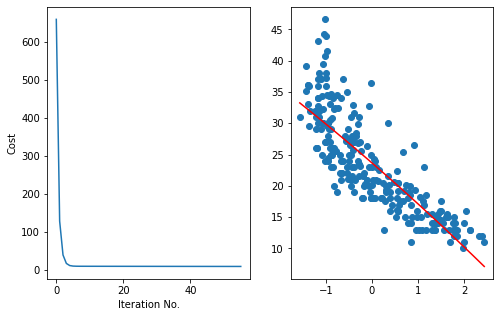

square_Error_value = 9.86373950703712, theta_0 = 23.4868,theta_1 = -5.215193059213691,theta_2 = -1.2876409481604


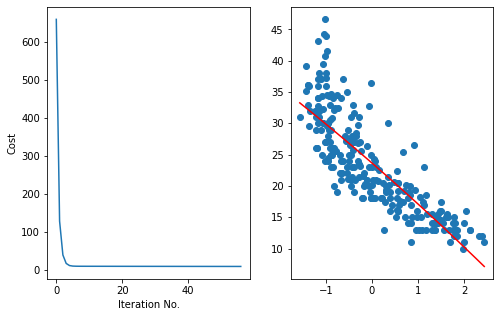

square_Error_value = 9.855648705317714, theta_0 = 23.4868,theta_1 = -5.26004095915859,theta_2 = -1.2427930482155003


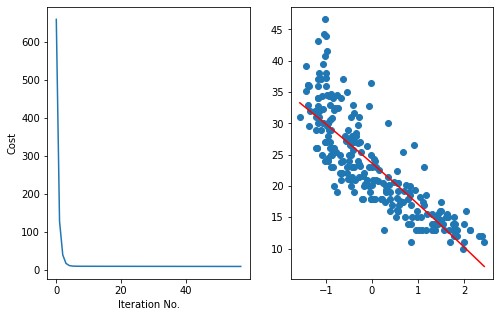

square_Error_value = 9.847618448143848, theta_0 = 23.4868,theta_1 = -5.304720742602784,theta_2 = -1.198113264771306


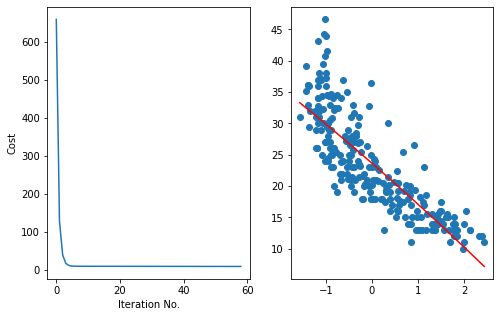

square_Error_value = 9.839648282452636, theta_0 = 23.4868,theta_1 = -5.349233039746525,theta_2 = -1.1536009676275656


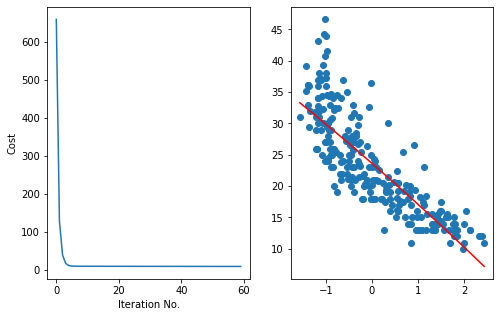

square_Error_value = 9.831737758571519, theta_0 = 23.4868,theta_1 = -5.393578478427699,theta_2 = -1.1092555289463912


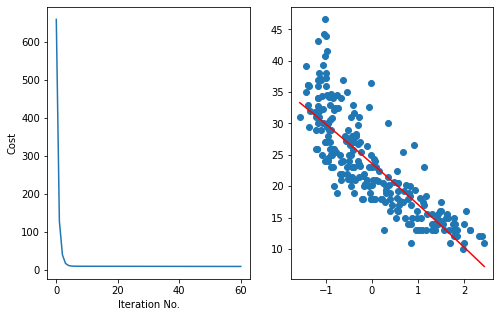

square_Error_value = 9.823886430192896, theta_0 = 23.4868,theta_1 = -5.437757684130686,theta_2 = -1.0650763232434048


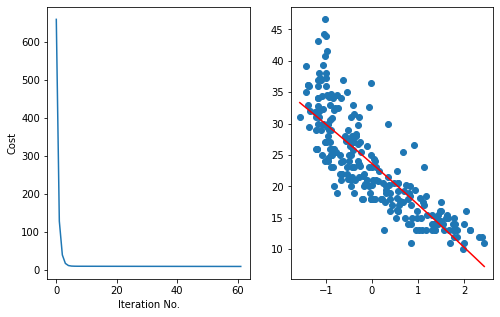

square_Error_value = 9.816093854348953, theta_0 = 23.4868,theta_1 = -5.481771279995177,theta_2 = -1.021062727378913


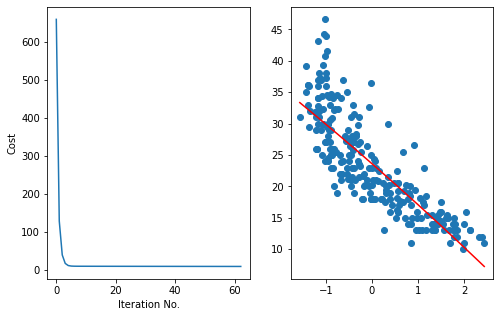

square_Error_value = 9.808359591386653, theta_0 = 23.4868,theta_1 = -5.525619886824971,theta_2 = -0.9772141205491203


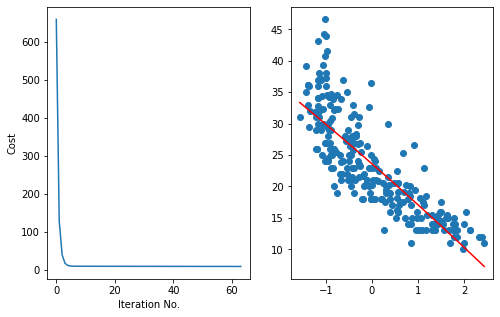

square_Error_value = 9.800683204942944, theta_0 = 23.4868,theta_1 = -5.56930412309672,theta_2 = -0.9335298842773706


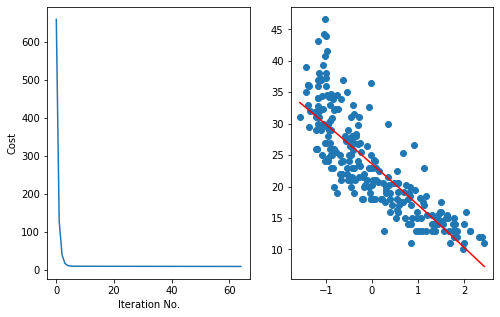

square_Error_value = 9.793064261920144, theta_0 = 23.4868,theta_1 = -5.612824604968665,theta_2 = -0.8900094024054256


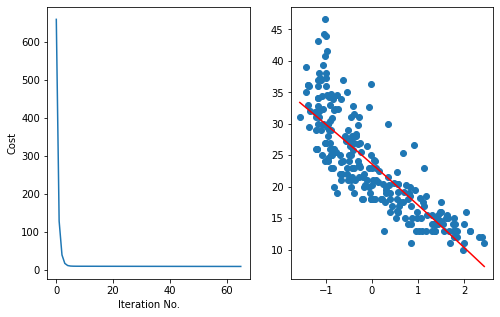

square_Error_value = 9.785502332461489, theta_0 = 23.4868,theta_1 = -5.656181946289318,theta_2 = -0.8466520610847726


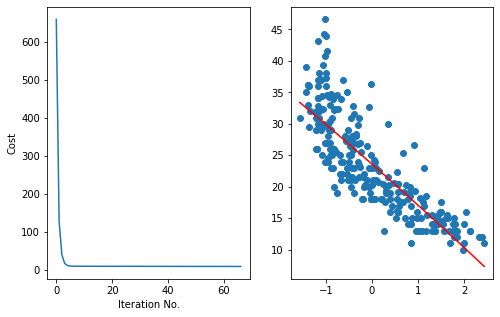

square_Error_value = 9.777996989926894, theta_0 = 23.4868,theta_1 = -5.699376758606124,theta_2 = -0.8034572487679672


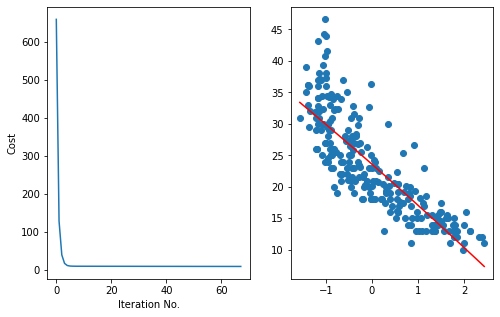

square_Error_value = 9.770547810868884, theta_0 = 23.4868,theta_1 = -5.742409651174084,theta_2 = -0.7604243562000068


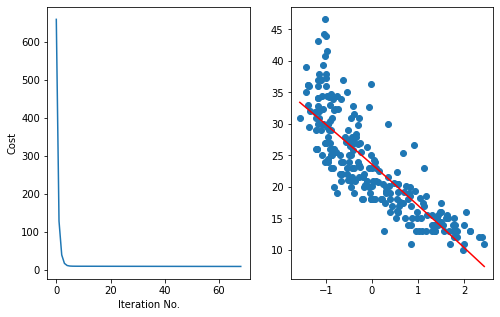

square_Error_value = 9.763154375008686, theta_0 = 23.4868,theta_1 = -5.785281230964353,theta_2 = -0.7175527764097378


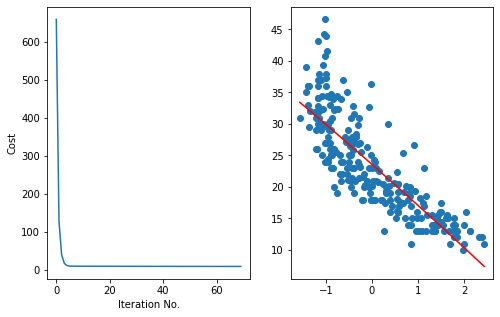

square_Error_value = 9.755816265212538, theta_0 = 23.4868,theta_1 = -5.8279921026727965,theta_2 = -0.6748419047012939


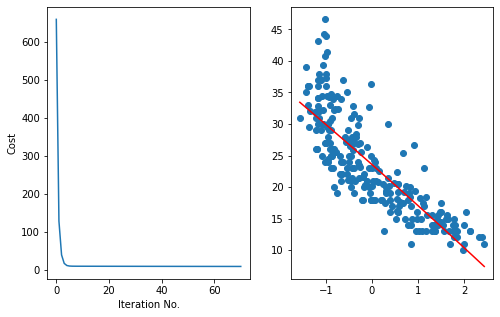

square_Error_value = 9.748533067468143, theta_0 = 23.4868,theta_1 = -5.870542868728523,theta_2 = -0.6322911386455675


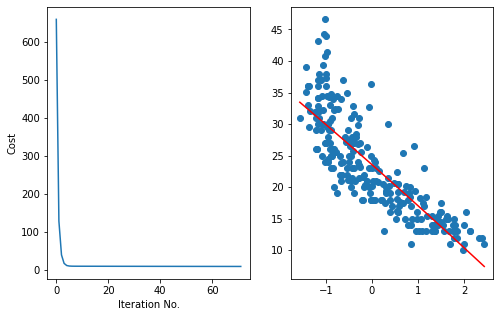

square_Error_value = 9.741304370861311, theta_0 = 23.4868,theta_1 = -5.912934129302379,theta_2 = -0.5898998780717118


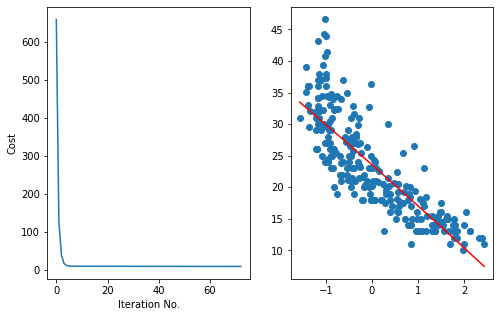

square_Error_value = 9.734129767552785, theta_0 = 23.4868,theta_1 = -5.9551664823154145,theta_2 = -0.547667525058676


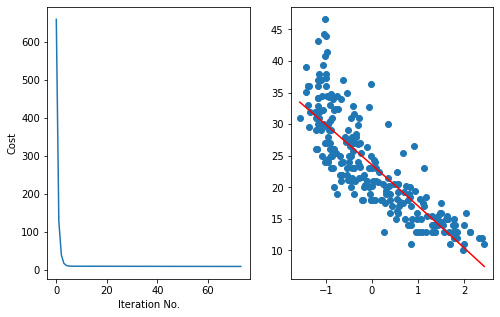

square_Error_value = 9.727008852755217, theta_0 = 23.4868,theta_1 = -5.997240523447319,theta_2 = -0.5055934839267723


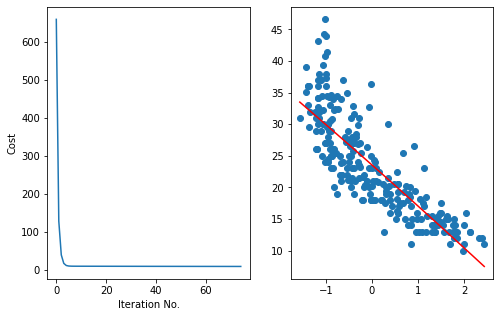

square_Error_value = 9.719941224710333, theta_0 = 23.4868,theta_1 = -6.039156846144818,theta_2 = -0.46367716122927194


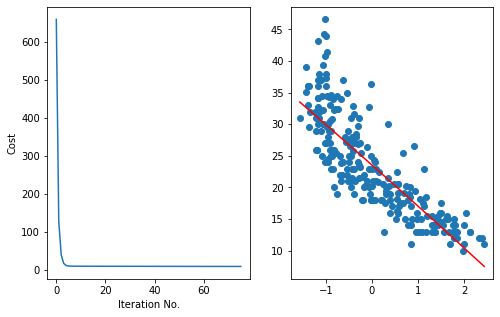

square_Error_value = 9.712926484666275, theta_0 = 23.4868,theta_1 = -6.0809160416300525,theta_2 = -0.4219179657440379


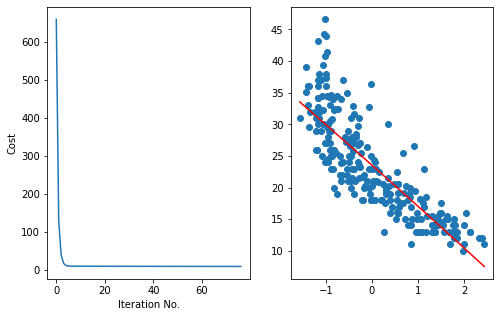

square_Error_value = 9.7059642368551, theta_0 = 23.4868,theta_1 = -6.122518698908908,theta_2 = -0.38031530846518263


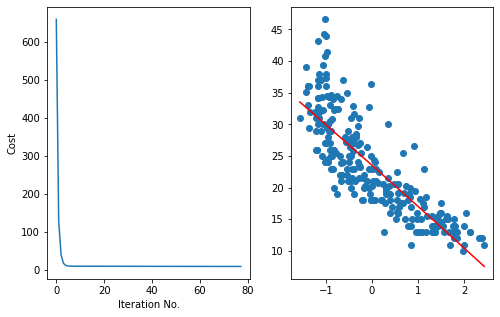

square_Error_value = 9.699054088470449, theta_0 = 23.4868,theta_1 = -6.163965404779328,theta_2 = -0.33886860259476215


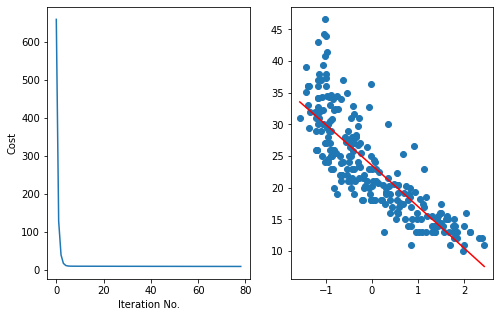

square_Error_value = 9.69219564964538, theta_0 = 23.4868,theta_1 = -6.205256743839592,theta_2 = -0.2975772635344986


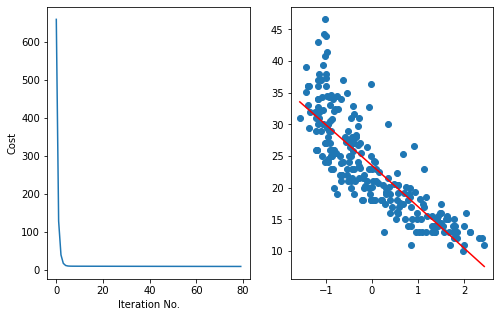

square_Error_value = 9.685388533430373, theta_0 = 23.4868,theta_1 = -6.246393298496556,theta_2 = -0.25644070887753506


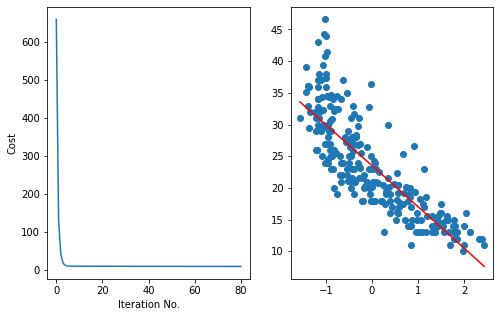

square_Error_value = 9.678632355771523, theta_0 = 23.4868,theta_1 = -6.28737564897387,theta_2 = -0.21545835840022048


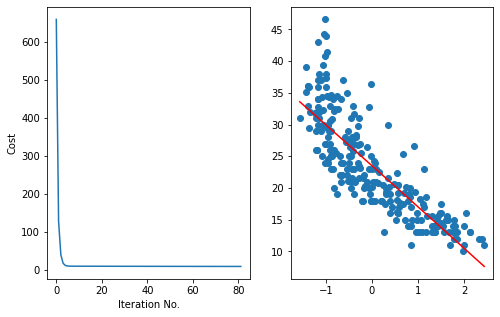

square_Error_value = 9.671926735488828, theta_0 = 23.4868,theta_1 = -6.3282043733201645,theta_2 = -0.17462963405392595


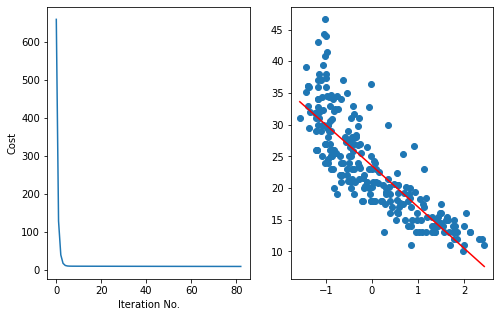

square_Error_value = 9.665271294254723, theta_0 = 23.4868,theta_1 = -6.368880047417199,theta_2 = -0.13395395995689144


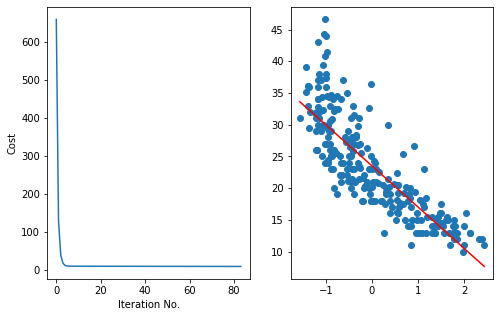

square_Error_value = 9.658665656572706, theta_0 = 23.4868,theta_1 = -6.409403244987988,theta_2 = -0.09343076238610254


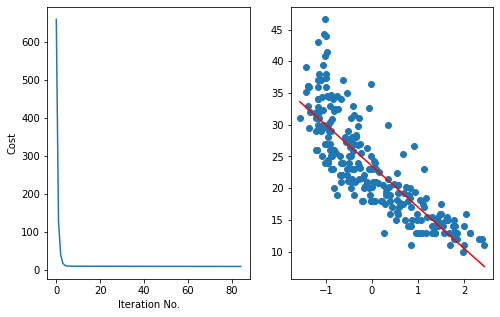

square_Error_value = 9.652109449756178, theta_0 = 23.4868,theta_1 = -6.449774537604892,theta_2 = -0.05305946976919857


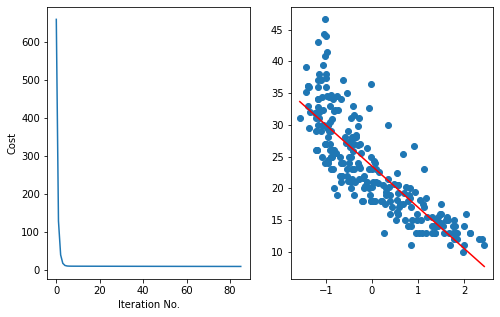

square_Error_value = 9.645602303907395, theta_0 = 23.4868,theta_1 = -6.4899944946976795,theta_2 = -0.012839512676411313


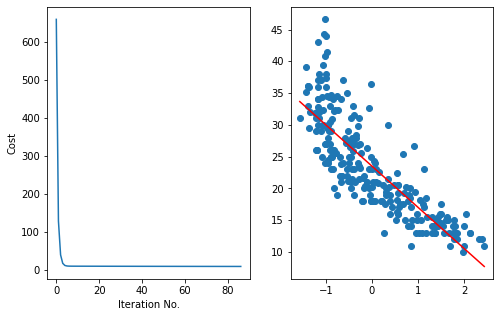

square_Error_value = 9.639143851896607, theta_0 = 23.4868,theta_1 = -6.530063683561559,theta_2 = 0.02722967618746798


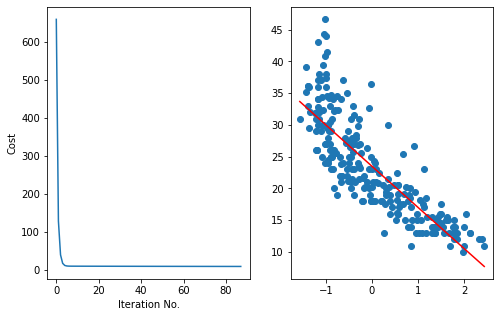

square_Error_value = 9.63273372934135, theta_0 = 23.4868,theta_1 = -6.56998266936518,theta_2 = 0.0671486619910891


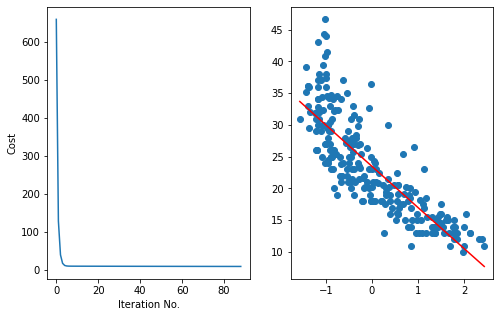

square_Error_value = 9.626371574585876, theta_0 = 23.4868,theta_1 = -6.609752015158605,theta_2 = 0.10691800778451463


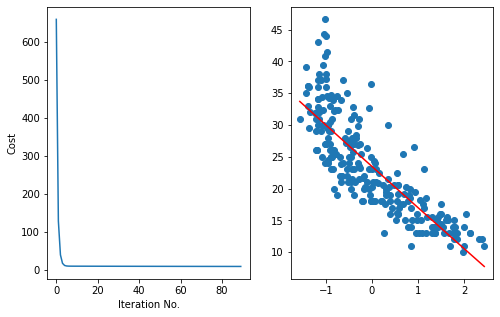

square_Error_value = 9.620057028680762, theta_0 = 23.4868,theta_1 = -6.649372281881253,theta_2 = 0.14653827450716264


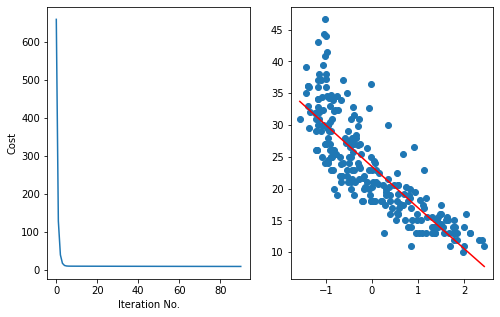

square_Error_value = 9.613789735362642, theta_0 = 23.4868,theta_1 = -6.688844028369808,theta_2 = 0.18601002099571728


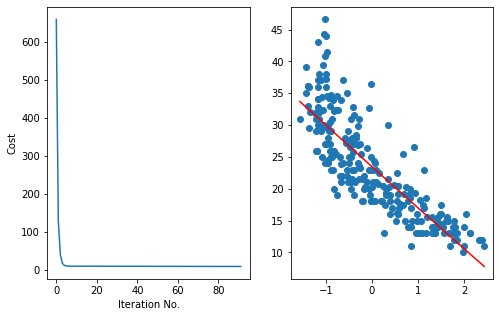

square_Error_value = 9.607569341034129, theta_0 = 23.4868,theta_1 = -6.728167811366103,theta_2 = 0.2253338039920124


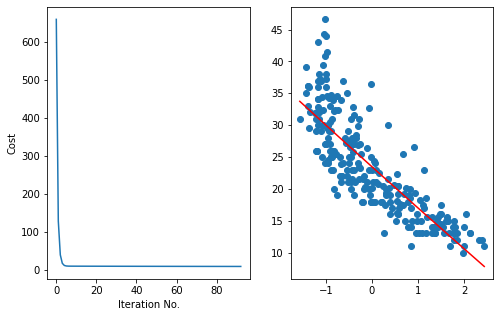

square_Error_value = 9.601395494743837, theta_0 = 23.4868,theta_1 = -6.767344185524974,theta_2 = 0.2645101781508827


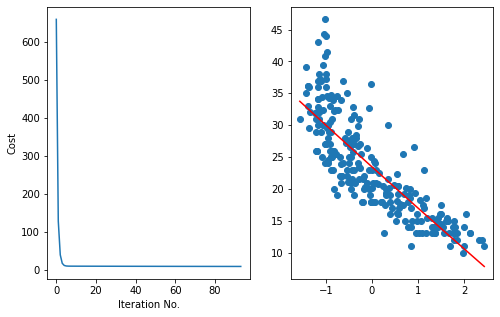

square_Error_value = 9.595267848166612, theta_0 = 23.4868,theta_1 = -6.8063737034220795,theta_2 = 0.3035396960479886


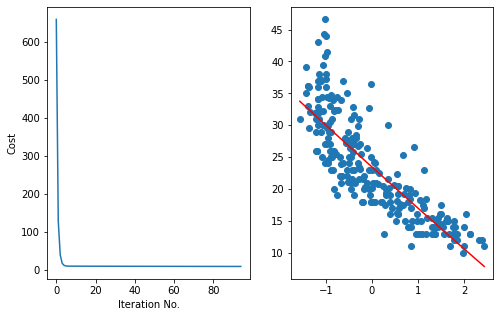

square_Error_value = 9.58918605558385, theta_0 = 23.4868,theta_1 = -6.8452569155617,theta_2 = 0.34242290818760923


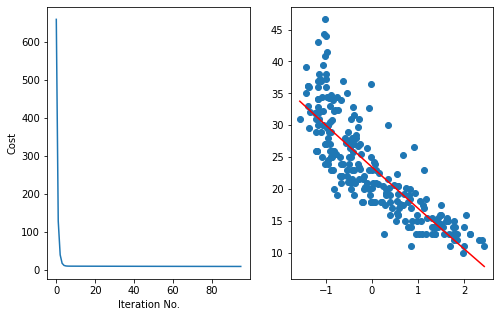

square_Error_value = 9.583149773864013, theta_0 = 23.4868,theta_1 = -6.883994370384499,theta_2 = 0.3811603630104078


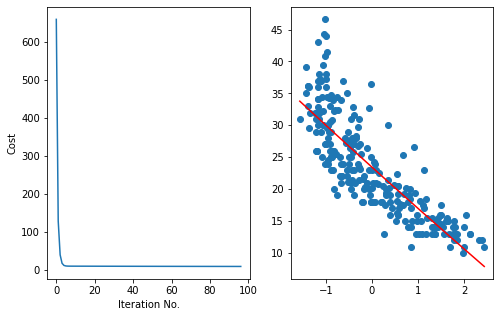

square_Error_value = 9.57715866244326, theta_0 = 23.4868,theta_1 = -6.922586614275257,theta_2 = 0.41975260690116634


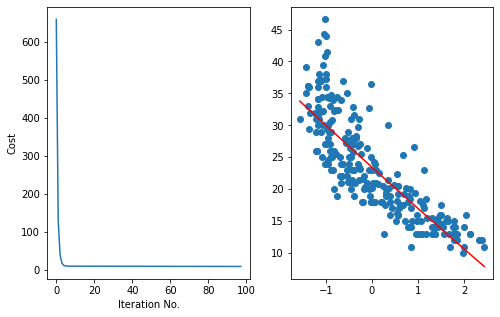

square_Error_value = 9.57121238330623, theta_0 = 23.4868,theta_1 = -6.961034191570585,theta_2 = 0.45820018419649383


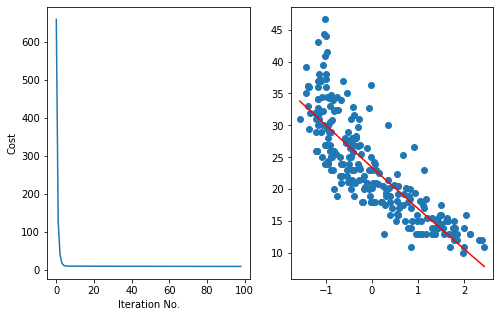

square_Error_value = 9.565310600966988, theta_0 = 23.4868,theta_1 = -6.999337644566594,theta_2 = 0.49650363719250273


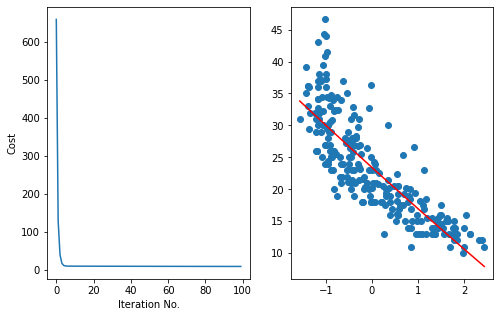

square_Error_value = 9.559452982450072, theta_0 = 23.4868,theta_1 = -7.037497513526549,theta_2 = 0.5346635061524581


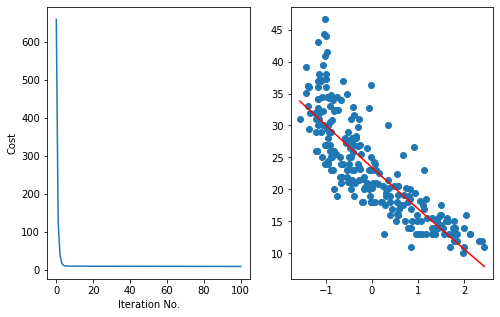

square_Error_value = 9.553639197271721, theta_0 = 23.4868,theta_1 = -7.07551433668849,theta_2 = 0.572680329314399


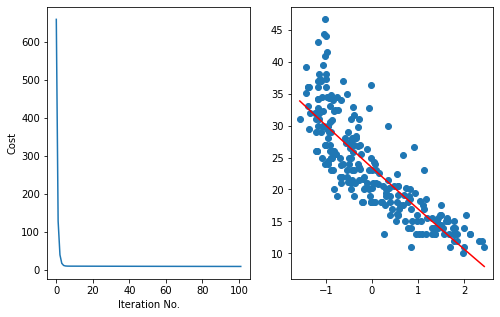

square_Error_value = 9.547868917421237, theta_0 = 23.4868,theta_1 = -7.113388650272819,theta_2 = 0.6105546428987283


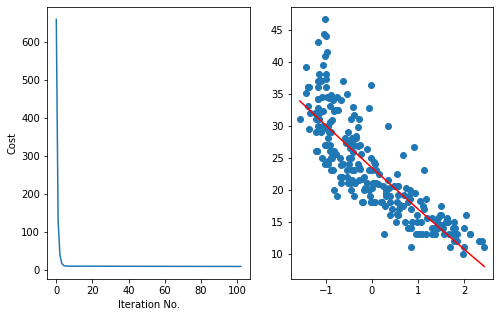

square_Error_value = 9.542141817342465, theta_0 = 23.4868,theta_1 = -7.151120988489868,theta_2 = 0.648286981115778


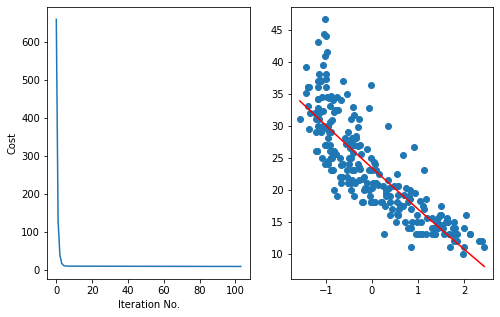

square_Error_value = 9.536457573915426, theta_0 = 23.4868,theta_1 = -7.188711883547433,theta_2 = 0.6858778761733426


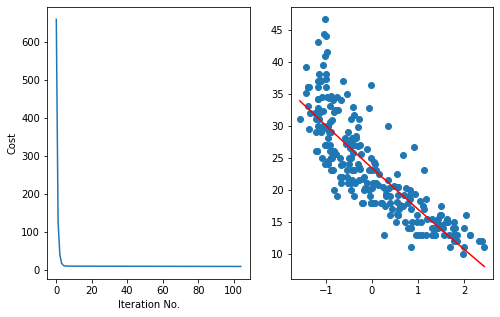

square_Error_value = 9.530815866438095, theta_0 = 23.4868,theta_1 = -7.226161865658278,theta_2 = 0.7233278582841871


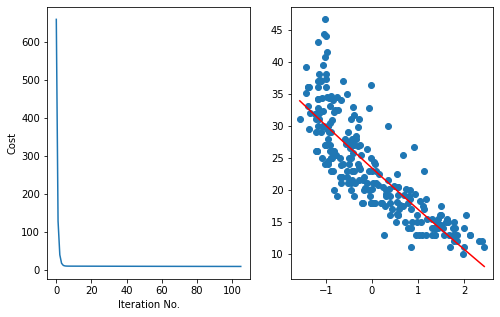

square_Error_value = 9.525216376608302, theta_0 = 23.4868,theta_1 = -7.263471463047615,theta_2 = 0.7606374556735248


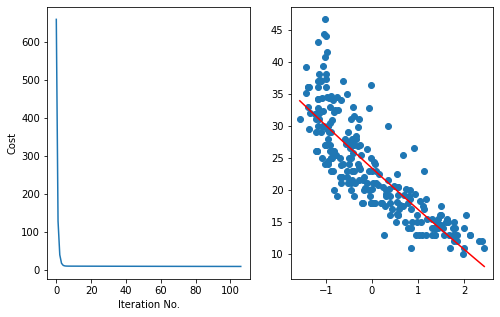

square_Error_value = 9.519658788505778, theta_0 = 23.4868,theta_1 = -7.300641201960558,theta_2 = 0.7978071945864675


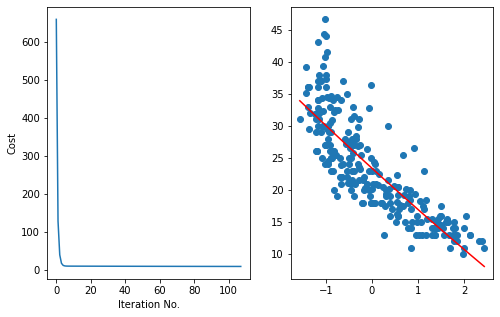

square_Error_value = 9.514142788574318, theta_0 = 23.4868,theta_1 = -7.33767160666954,theta_2 = 0.8348375992954491


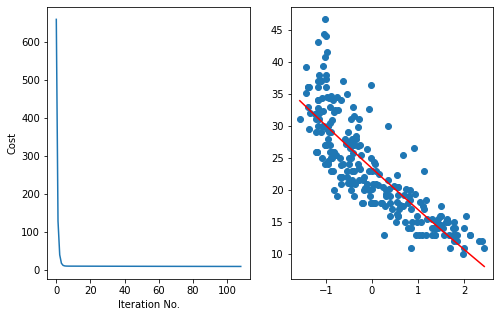

square_Error_value = 9.508668065604105, theta_0 = 23.4868,theta_1 = -7.37456319948171,theta_2 = 0.8717291921076191


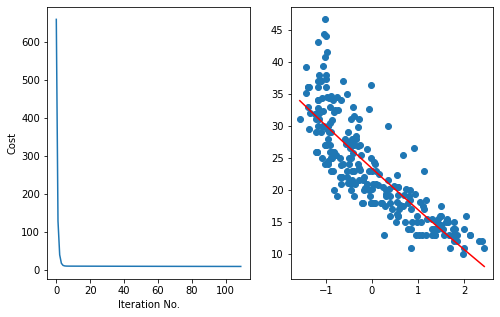

square_Error_value = 9.503234310714157, theta_0 = 23.4868,theta_1 = -7.4113165007463015,theta_2 = 0.9084824933722109


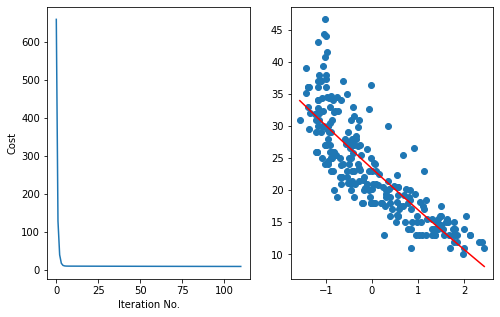

square_Error_value = 9.49784121733487, theta_0 = 23.4868,theta_1 = -7.447932028861971,theta_2 = 0.9450980214878806


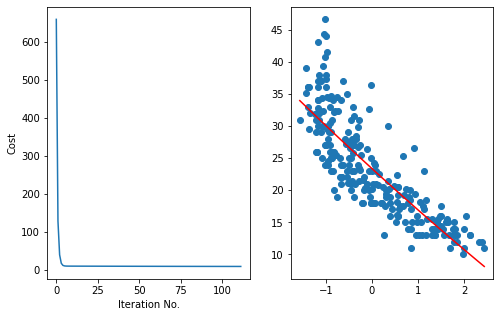

square_Error_value = 9.492488481190755, theta_0 = 23.4868,theta_1 = -7.484410300284109,theta_2 = 0.9815762929100187


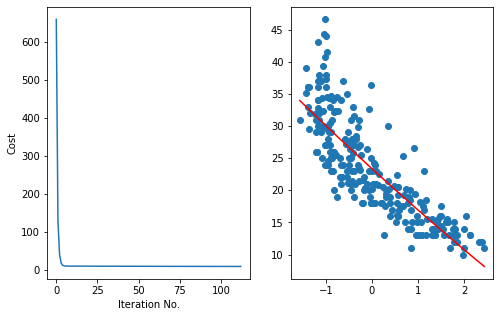

square_Error_value = 9.487175800283252, theta_0 = 23.4868,theta_1 = -7.520751829532125,theta_2 = 1.0179178221580352


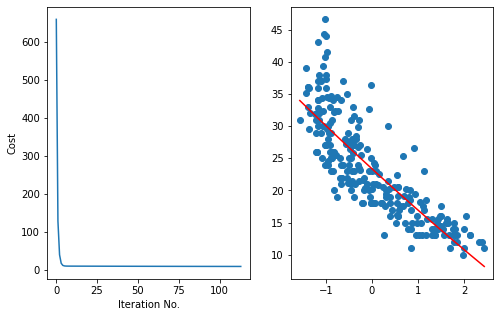

square_Error_value = 9.481902874873695, theta_0 = 23.4868,theta_1 = -7.556957129196707,theta_2 = 1.0541231218226161


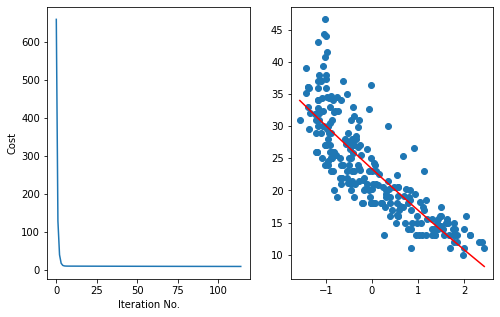

square_Error_value = 9.476669407466407, theta_0 = 23.4868,theta_1 = -7.593026709947046,theta_2 = 1.090192702572955


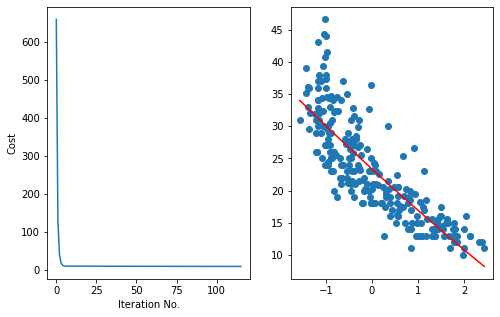

square_Error_value = 9.471475102791908, theta_0 = 23.4868,theta_1 = -7.628961080538044,theta_2 = 1.1261270731639532


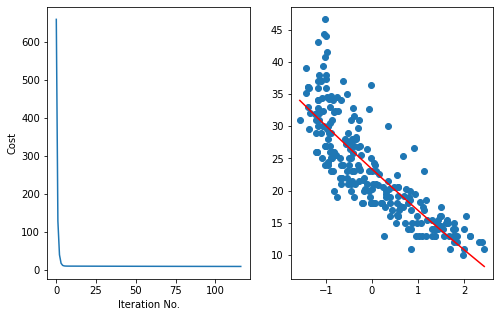

square_Error_value = 9.466319667790255, theta_0 = 23.4868,theta_1 = -7.664760747817489,theta_2 = 1.161926740443398


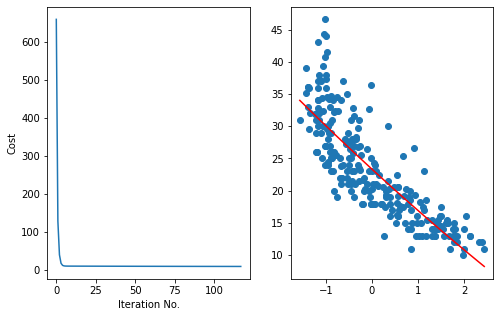

square_Error_value = 9.461202811594525, theta_0 = 23.4868,theta_1 = -7.700426216733201,theta_2 = 1.1975922093591107


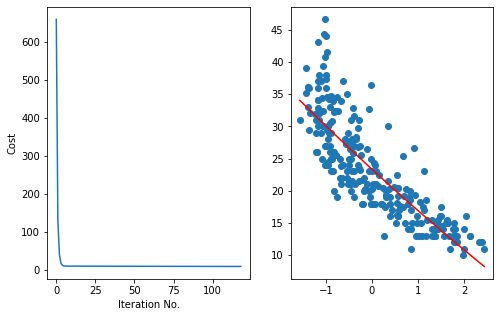

square_Error_value = 9.456124245514369, theta_0 = 23.4868,theta_1 = -7.73595799034016,theta_2 = 1.2331239829660692


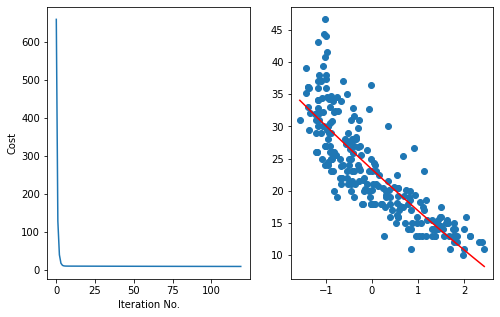

square_Error_value = 9.451083683019768, theta_0 = 23.4868,theta_1 = -7.771356569807594,theta_2 = 1.2685225624335033


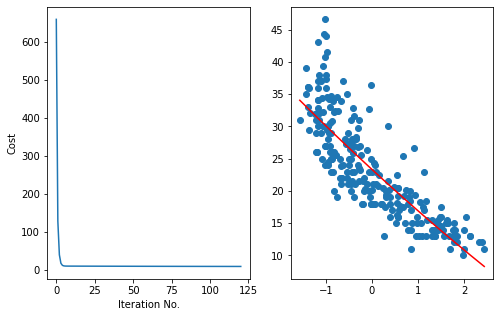

square_Error_value = 9.44608083972483, theta_0 = 23.4868,theta_1 = -7.806622454426054,theta_2 = 1.3037884470519632


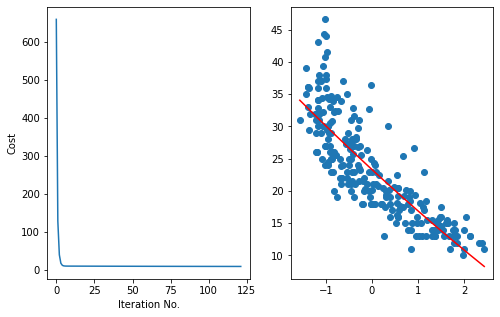

square_Error_value = 9.441115433371772, theta_0 = 23.4868,theta_1 = -7.841756141614454,theta_2 = 1.3389221342403628


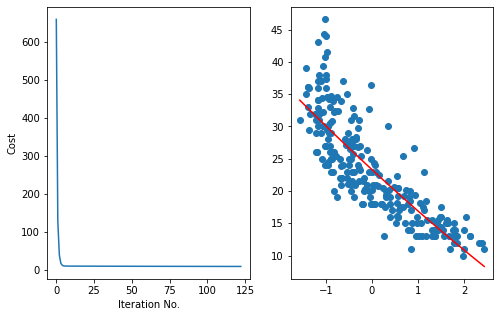

square_Error_value = 9.436187183814974, theta_0 = 23.4868,theta_1 = -7.876758126927085,theta_2 = 1.373924119552995


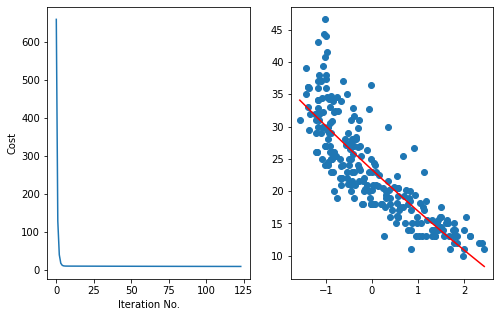

square_Error_value = 9.431295813005187, theta_0 = 23.4868,theta_1 = -7.911628904060612,theta_2 = 1.4087948966865214


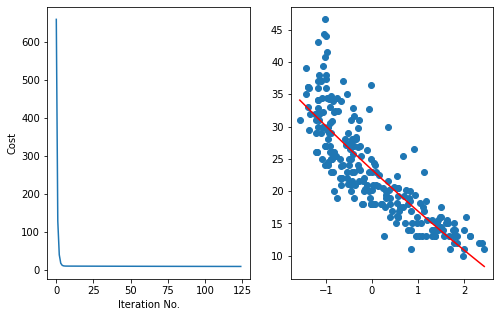

square_Error_value = 9.426441044973842, theta_0 = 23.4868,theta_1 = -7.946368964861027,theta_2 = 1.443534957486936


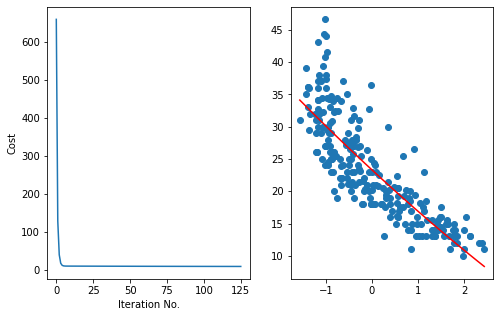

square_Error_value = 9.421622605817477, theta_0 = 23.4868,theta_1 = -7.980978799330594,theta_2 = 1.4781447919565038


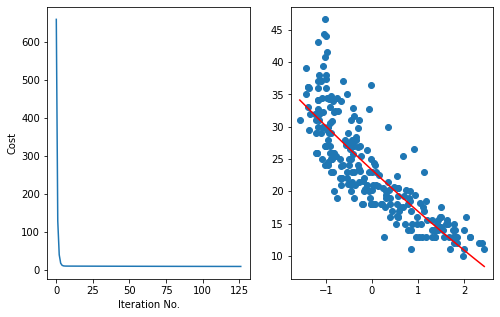

square_Error_value = 9.416840223682293, theta_0 = 23.4868,theta_1 = -8.01545889563476,theta_2 = 1.5126248882606688


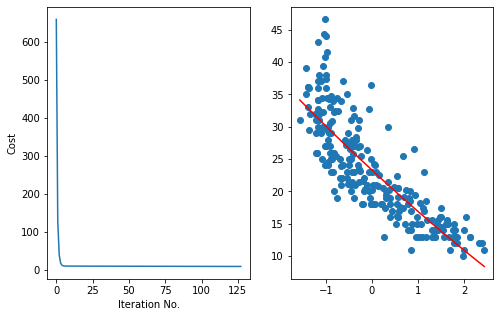

square_Error_value = 9.412093628748801, theta_0 = 23.4868,theta_1 = -8.049809740109033,theta_2 = 1.5469757327349436


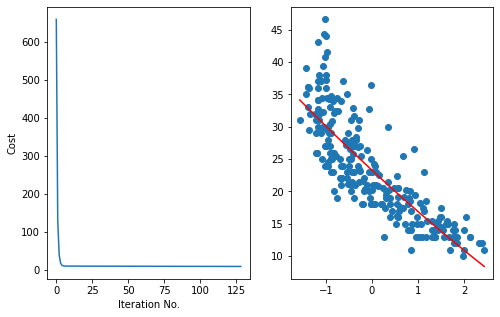

square_Error_value = 9.407382553216607, theta_0 = 23.4868,theta_1 = -8.084031817265856,theta_2 = 1.5811978098917654


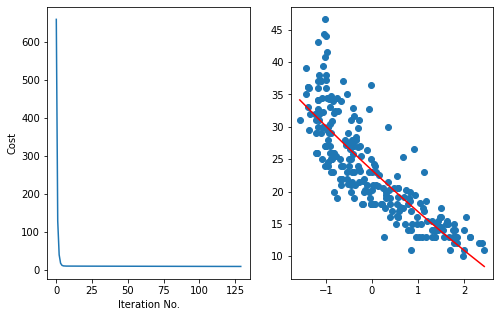

square_Error_value = 9.402706731289308, theta_0 = 23.4868,theta_1 = -8.118125609801425,theta_2 = 1.615291602427334


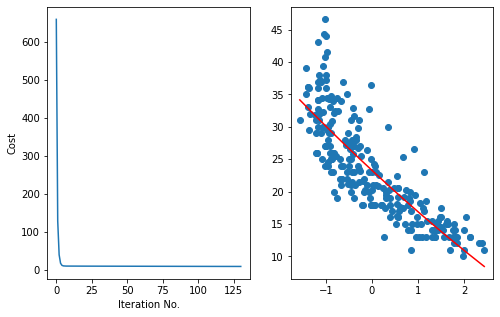

square_Error_value = 9.398065899159494, theta_0 = 23.4868,theta_1 = -8.152091598602507,theta_2 = 1.6492575912284158


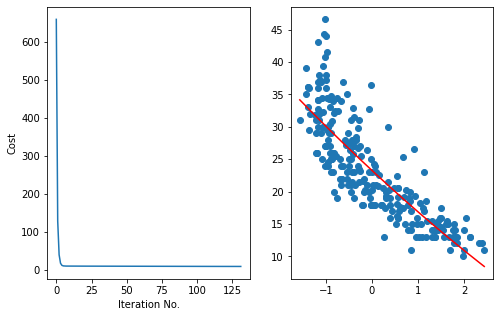

square_Error_value = 9.39345979499385, theta_0 = 23.4868,theta_1 = -8.18593026275322,theta_2 = 1.6830962553791298


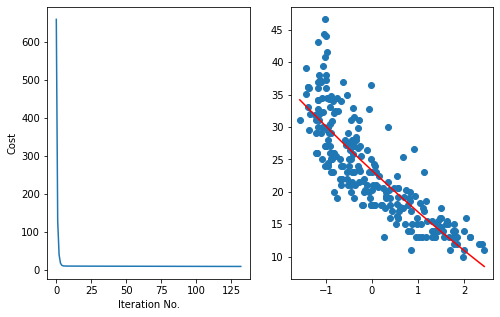

square_Error_value = 9.388888158918402, theta_0 = 23.4868,theta_1 = -8.219642079541794,theta_2 = 1.7168080721677035


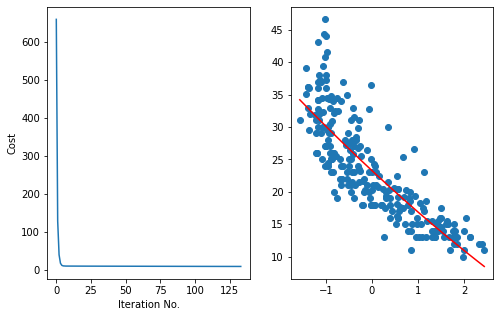

square_Error_value = 9.384350733003846, theta_0 = 23.4868,theta_1 = -8.253227524467295,theta_2 = 1.7503935170932048


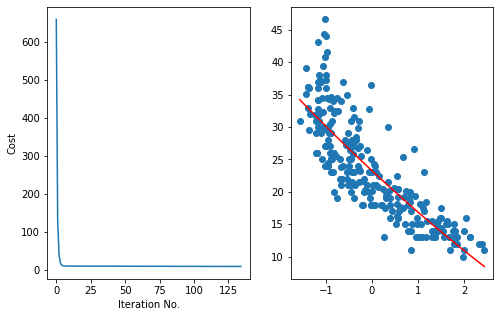

square_Error_value = 9.379847261251, theta_0 = 23.4868,theta_1 = -8.286687071246341,theta_2 = 1.7838530638722505


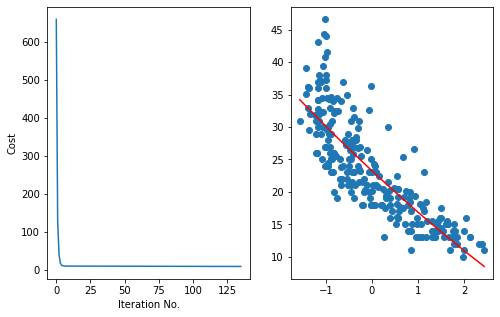

square_Error_value = 9.375377489576351, theta_0 = 23.4868,theta_1 = -8.320021191819777,theta_2 = 1.8171871844456864


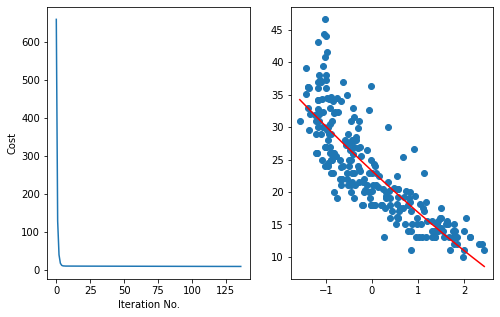

square_Error_value = 9.370941165797733, theta_0 = 23.4868,theta_1 = -8.353230356359335,theta_2 = 1.850396348985244


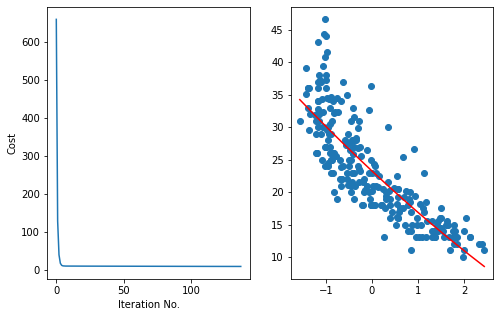

square_Error_value = 9.366538039620089, theta_0 = 23.4868,theta_1 = -8.386315033274263,theta_2 = 1.8834810259001733


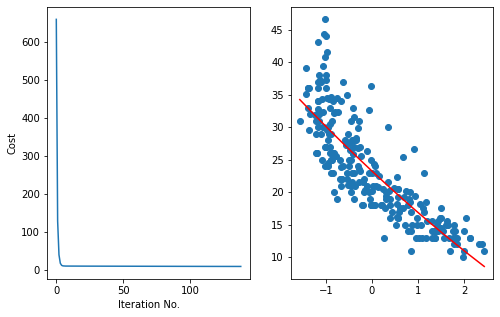

square_Error_value = 9.36216786262136, theta_0 = 23.4868,theta_1 = -8.419275689217939,theta_2 = 1.9164416818438474


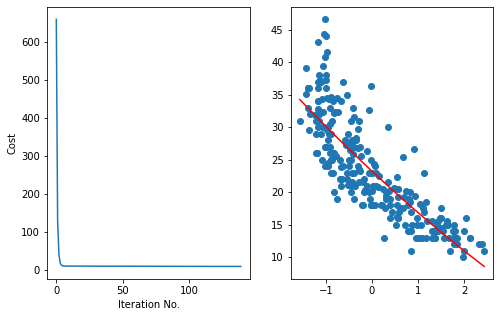

square_Error_value = 9.35783038823845, theta_0 = 23.4868,theta_1 = -8.45211278909444,theta_2 = 1.9492787817203485


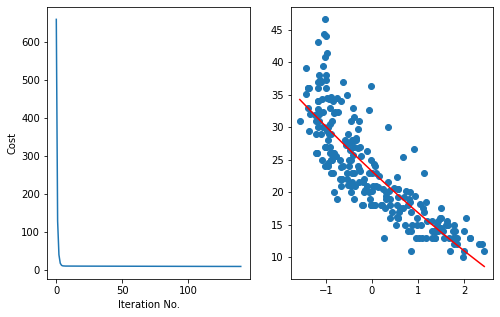

square_Error_value = 9.353525371753339, theta_0 = 23.4868,theta_1 = -8.48482679606511,theta_2 = 1.9819927886910207


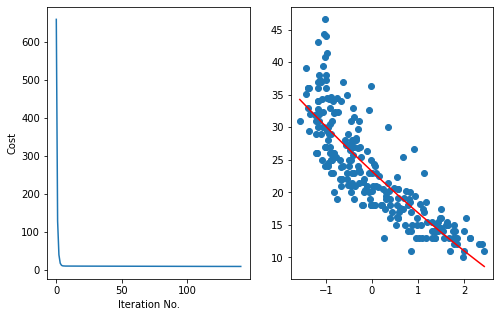

square_Error_value = 9.349252570279257, theta_0 = 23.4868,theta_1 = -8.517418171555097,theta_2 = 2.0145841641810054


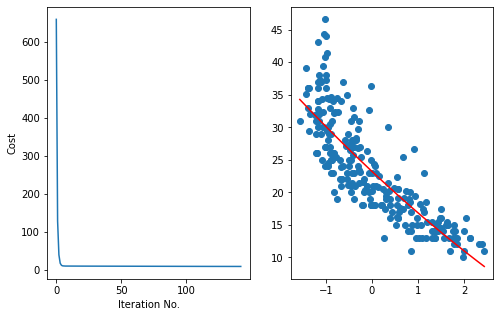

square_Error_value = 9.345011742746996, theta_0 = 23.4868,theta_1 = -8.549887375259841,theta_2 = 2.0470533678857508


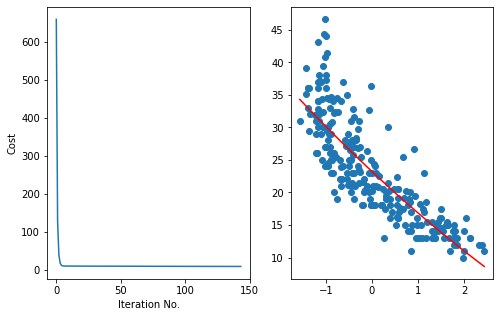

square_Error_value = 9.34080264989129, theta_0 = 23.4868,theta_1 = -8.582234865151582,theta_2 = 2.0794008577774914


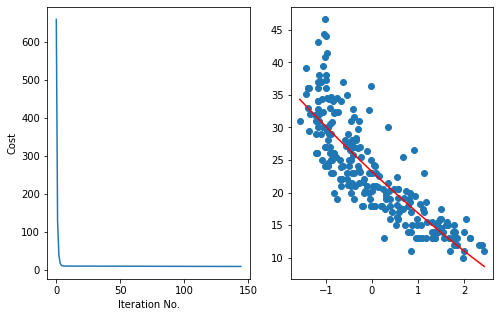

square_Error_value = 9.336625054237336, theta_0 = 23.4868,theta_1 = -8.614461097485805,theta_2 = 2.111627090111713


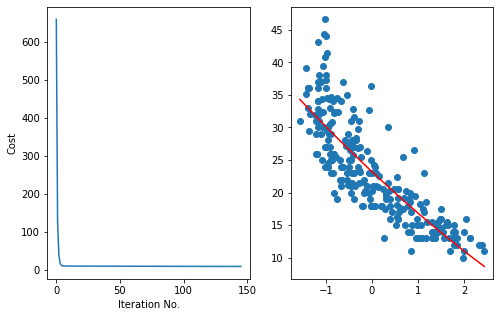

square_Error_value = 9.332478720087385, theta_0 = 23.4868,theta_1 = -8.646566526807677,theta_2 = 2.143732519433585


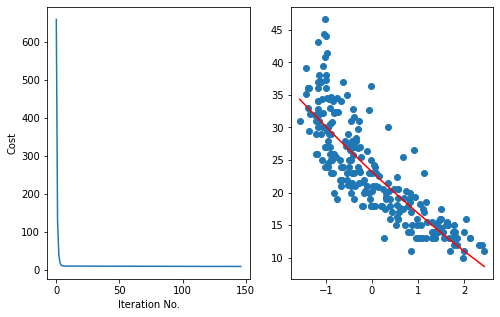

square_Error_value = 9.328363413507441, theta_0 = 23.4868,theta_1 = -8.67855160595846,theta_2 = 2.1757175985843706


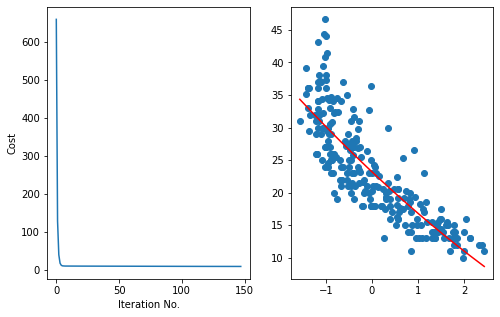

square_Error_value = 9.324278902314072, theta_0 = 23.4868,theta_1 = -8.710416786081908,theta_2 = 2.2075827787078164


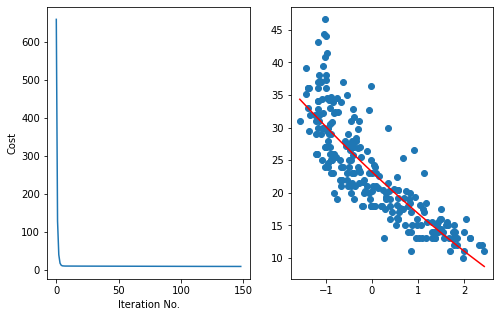

square_Error_value = 9.320224956061304, theta_0 = 23.4868,theta_1 = -8.742162516630607,theta_2 = 2.2393285092565165


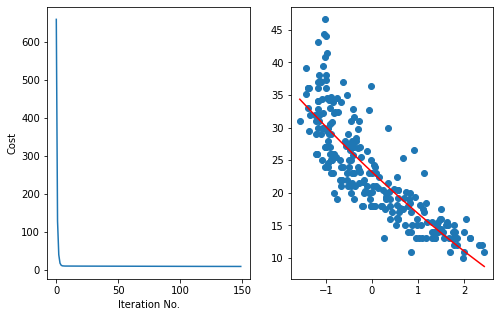

square_Error_value = 9.316201346027619, theta_0 = 23.4868,theta_1 = -8.773789245372338,theta_2 = 2.270955237998248


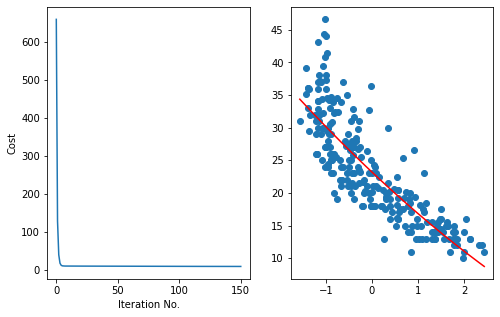

square_Error_value = 9.312207845203055, theta_0 = 23.4868,theta_1 = -8.805297418396382,theta_2 = 2.3024634110222904


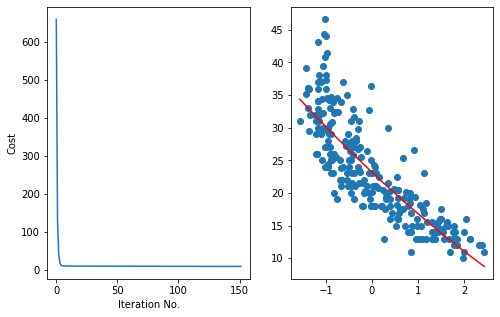

square_Error_value = 9.308244228276395, theta_0 = 23.4868,theta_1 = -8.836687480119808,theta_2 = 2.333853472745717


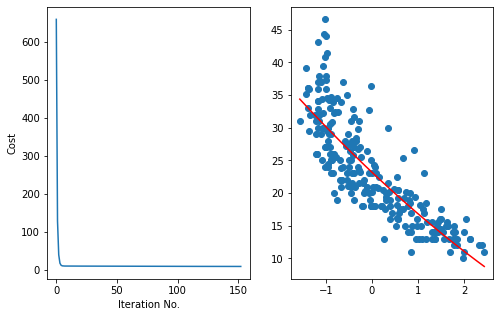

square_Error_value = 9.304310271622455, theta_0 = 23.4868,theta_1 = -8.867959873293753,theta_2 = 2.3651258659196612


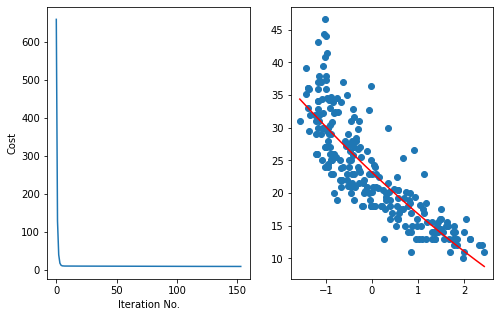

square_Error_value = 9.30040575328947, theta_0 = 23.4868,theta_1 = -8.899115039009654,theta_2 = 2.396281031635563


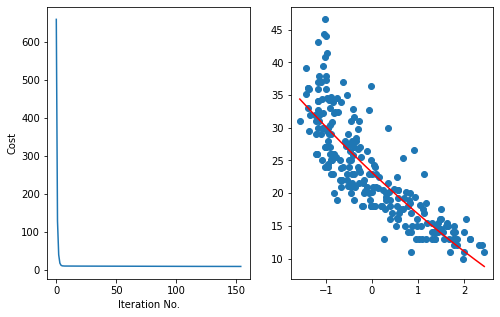

square_Error_value = 9.296530452986566, theta_0 = 23.4868,theta_1 = -8.930153416705481,theta_2 = 2.427319409331391


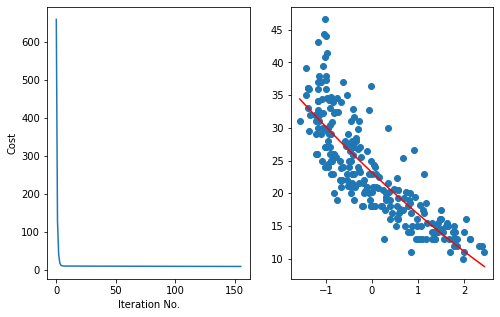

square_Error_value = 9.292684152071338, theta_0 = 23.4868,theta_1 = -8.961075444171929,theta_2 = 2.458241436797839


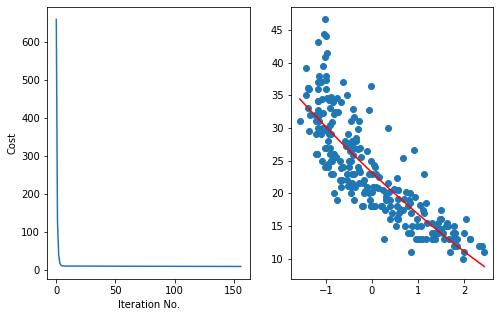

square_Error_value = 9.288866633537515, theta_0 = 23.4868,theta_1 = -8.991881557558592,theta_2 = 2.4890475501845026


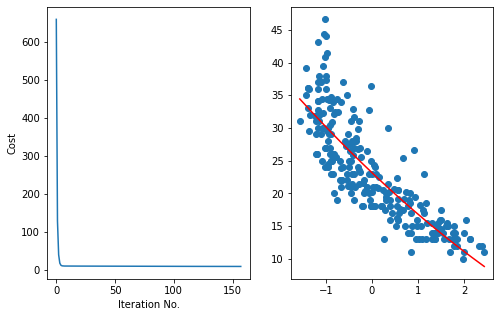

square_Error_value = 9.2850776820027, theta_0 = 23.4868,theta_1 = -9.022572191380121,theta_2 = 2.5197381840060307


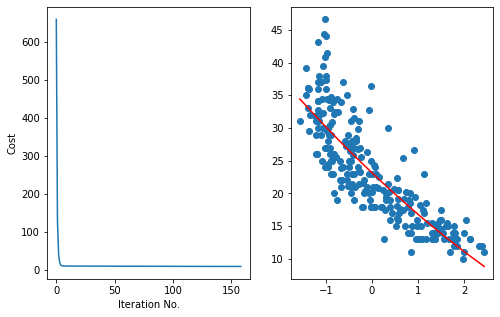

square_Error_value = 9.281317083696248, theta_0 = 23.4868,theta_1 = -9.053147778522344,theta_2 = 2.550313771148253


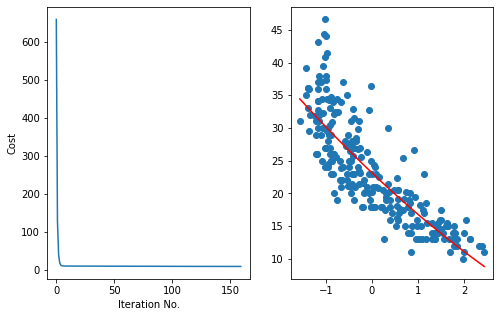

square_Error_value = 9.27758462644717, theta_0 = 23.4868,theta_1 = -9.083608750248379,theta_2 = 2.5807747428742878


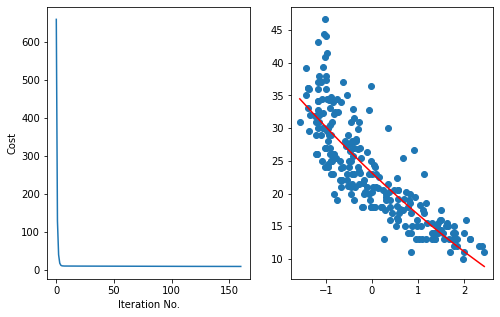

square_Error_value = 9.273880099672198, theta_0 = 23.4868,theta_1 = -9.113955536204713,theta_2 = 2.611121528830622


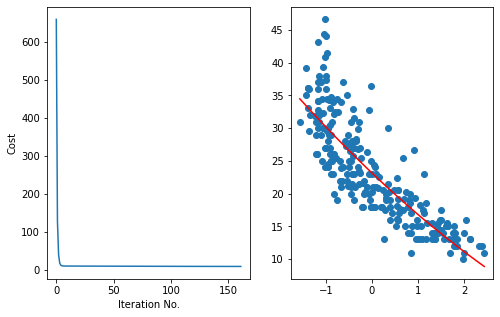

square_Error_value = 9.270203294363876, theta_0 = 23.4868,theta_1 = -9.144188564427266,theta_2 = 2.6413545570531745


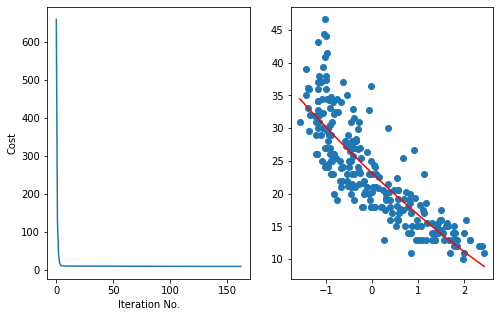

square_Error_value = 9.266554003078781, theta_0 = 23.4868,theta_1 = -9.174308261347422,theta_2 = 2.6714742539733307


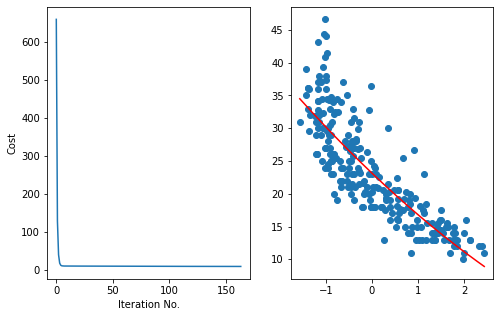

square_Error_value = 9.262932019925817, theta_0 = 23.4868,theta_1 = -9.20431505179805,theta_2 = 2.701481044423959


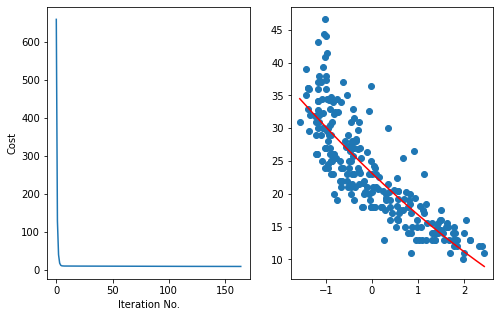

square_Error_value = 9.259337140554603, theta_0 = 23.4868,theta_1 = -9.234209359019493,theta_2 = 2.731375351645403


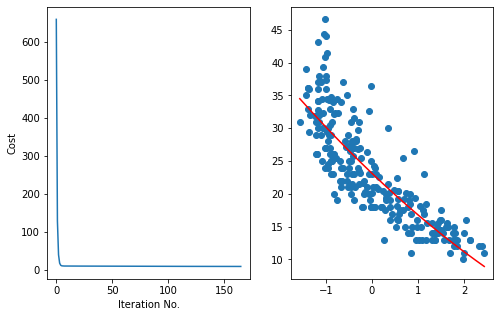

square_Error_value = 9.255769162143926, theta_0 = 23.4868,theta_1 = -9.26399160466554,theta_2 = 2.7611575972914495


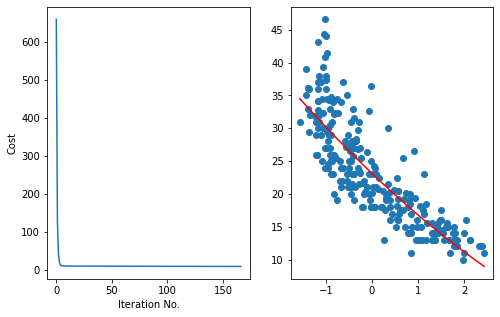

square_Error_value = 9.252227883390326, theta_0 = 23.4868,theta_1 = -9.29366220880937,theta_2 = 2.7908282014352785


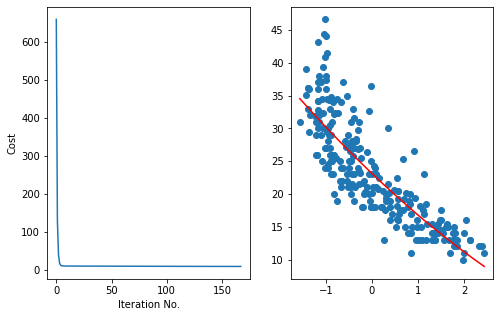

square_Error_value = 9.24871310449672, theta_0 = 23.4868,theta_1 = -9.323221589949478,theta_2 = 2.820387582575387


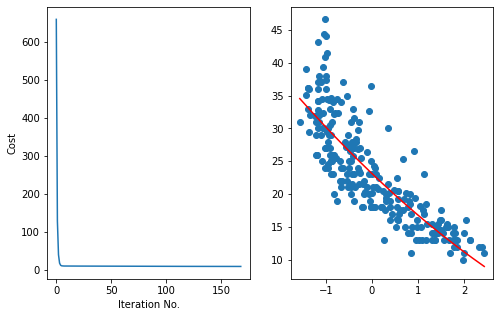

square_Error_value = 9.245224627161122, theta_0 = 23.4868,theta_1 = -9.35267016501558,theta_2 = 2.84983615764149


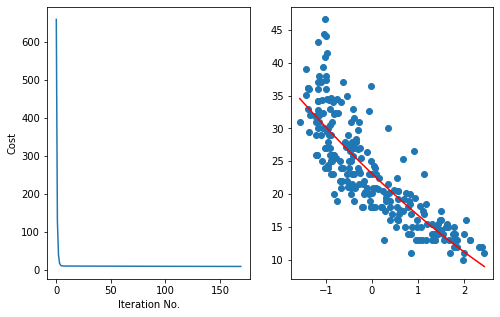

square_Error_value = 9.241762254565481, theta_0 = 23.4868,theta_1 = -9.382008349374495,theta_2 = 2.879174342000403


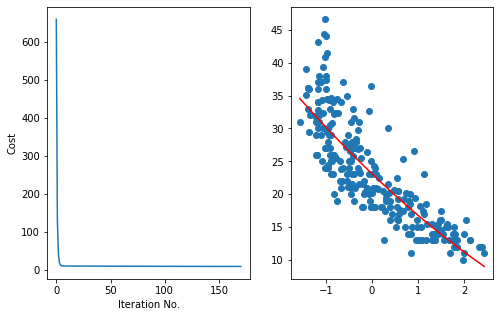

square_Error_value = 9.238325791364554, theta_0 = 23.4868,theta_1 = -9.411236556835995,theta_2 = 2.9084025494619037


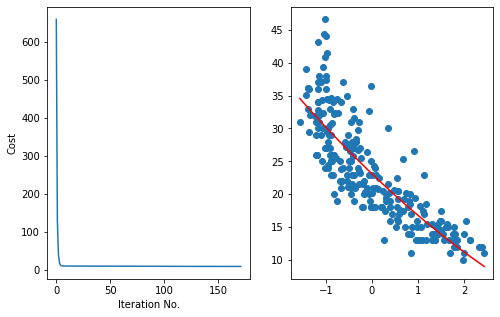

square_Error_value = 9.234915043674892, theta_0 = 23.4868,theta_1 = -9.440355199658653,theta_2 = 2.9375211922845614


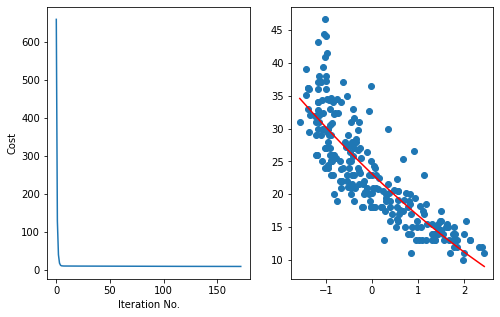

square_Error_value = 9.231529819063907, theta_0 = 23.4868,theta_1 = -9.46936468855565,theta_2 = 2.966530681181559


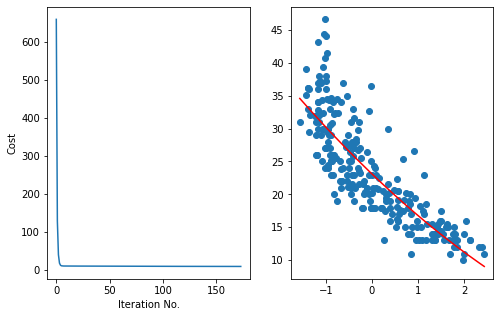

square_Error_value = 9.228169926539001, theta_0 = 23.4868,theta_1 = -9.498265432700572,theta_2 = 2.995431425326481


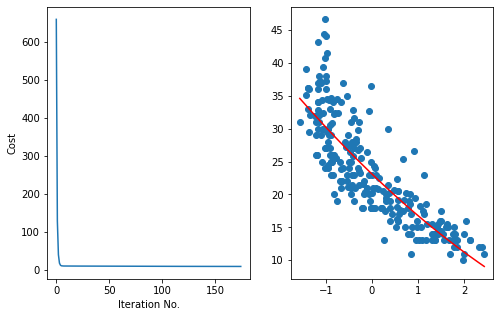

square_Error_value = 9.22483517653681, theta_0 = 23.4868,theta_1 = -9.52705783973318,theta_2 = 3.0242238323590884


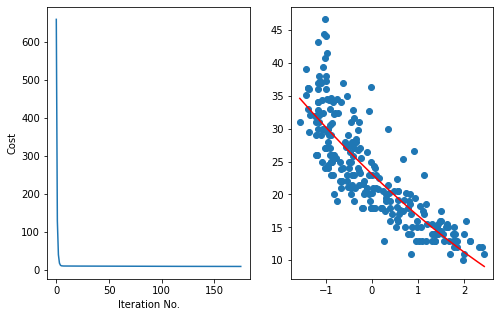

square_Error_value = 9.221525380912487, theta_0 = 23.4868,theta_1 = -9.555742315765157,theta_2 = 3.0529083083910664


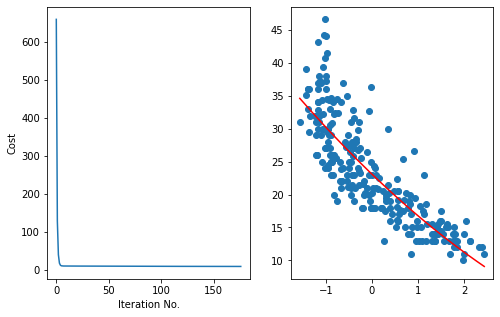

square_Error_value = 9.218240352929108, theta_0 = 23.4868,theta_1 = -9.584319265385842,theta_2 = 3.0814852580117518


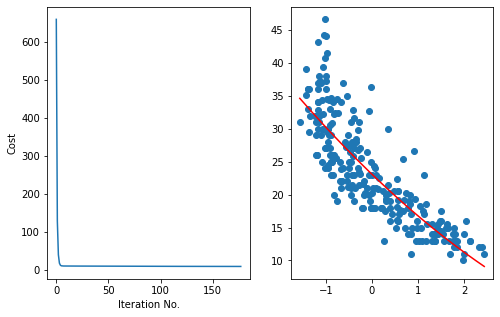

square_Error_value = 9.214979907247114, theta_0 = 23.4868,theta_1 = -9.612789091667933,theta_2 = 3.1099550842938424


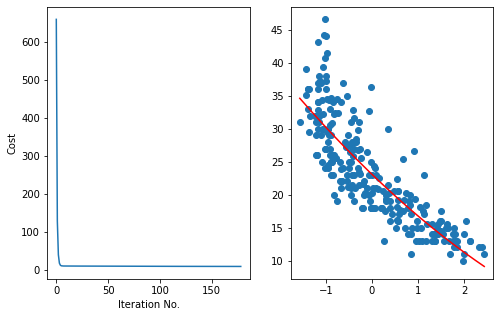

square_Error_value = 9.211743859913879, theta_0 = 23.4868,theta_1 = -9.641152196173172,theta_2 = 3.138318188799081


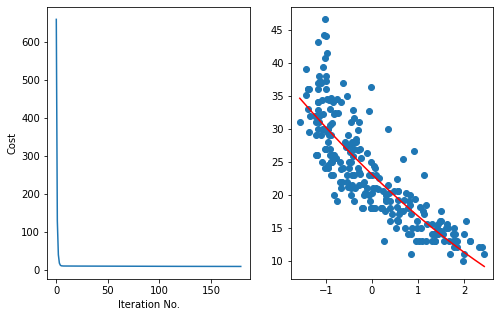

square_Error_value = 9.208532028353313, theta_0 = 23.4868,theta_1 = -9.669408978958009,theta_2 = 3.166574971583918


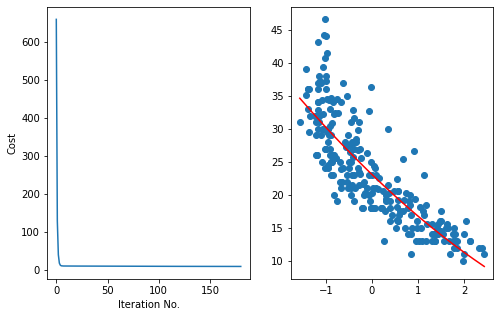

square_Error_value = 9.205344231355564, theta_0 = 23.4868,theta_1 = -9.697559838579245,theta_2 = 3.194725831205155


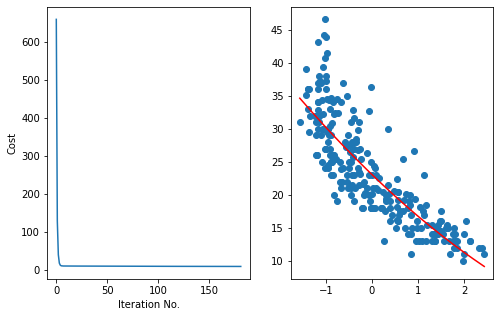

square_Error_value = 9.202180289066808, theta_0 = 23.4868,theta_1 = -9.725605172099659,theta_2 = 3.2227711647255672


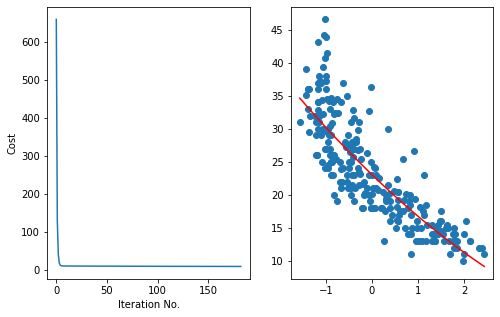

square_Error_value = 9.199040022979082, theta_0 = 23.4868,theta_1 = -9.753545375093594,theta_2 = 3.250711367719504


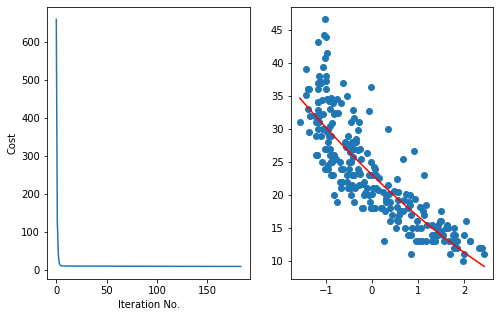

square_Error_value = 9.195923255920219, theta_0 = 23.4868,theta_1 = -9.781380841652556,theta_2 = 3.278546834278466


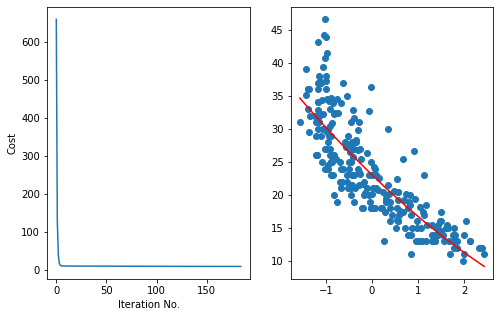

square_Error_value = 9.192829812043867, theta_0 = 23.4868,theta_1 = -9.809111964390757,theta_2 = 3.306277957016666


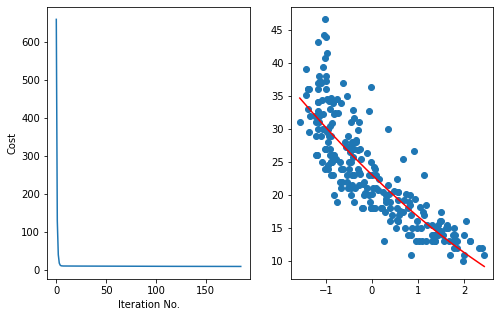

square_Error_value = 9.189759516819544, theta_0 = 23.4868,theta_1 = -9.836739134450658,theta_2 = 3.333905127076567


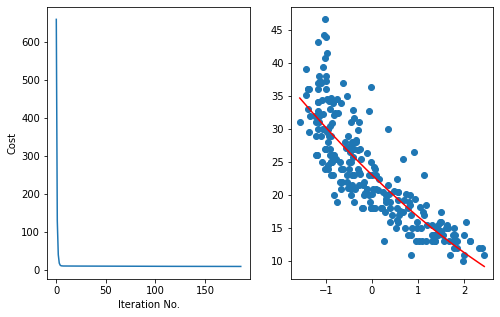

square_Error_value = 9.186712197022807, theta_0 = 23.4868,theta_1 = -9.864262741508488,theta_2 = 3.3614287341343982


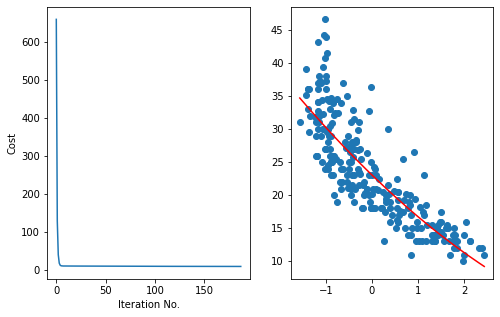

square_Error_value = 9.18368768072548, theta_0 = 23.4868,theta_1 = -9.89168317377974,theta_2 = 3.3888491664056497


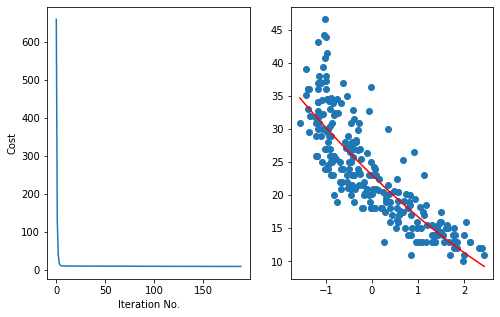

square_Error_value = 9.18068579728594, theta_0 = 23.4868,theta_1 = -9.919000818024642,theta_2 = 3.416166810650551


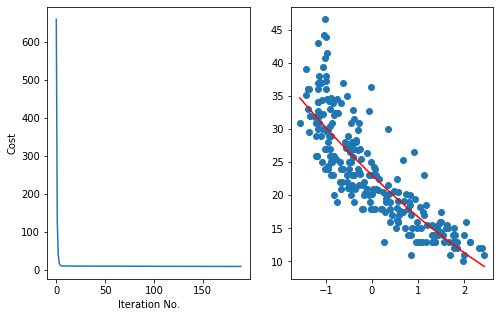

square_Error_value = 9.177706377339504, theta_0 = 23.4868,theta_1 = -9.946216059553617,theta_2 = 3.4433820521795266


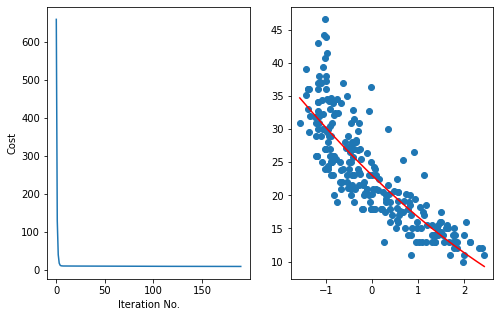

square_Error_value = 9.174749252788862, theta_0 = 23.4868,theta_1 = -9.973329282232717,theta_2 = 3.4704952748586266


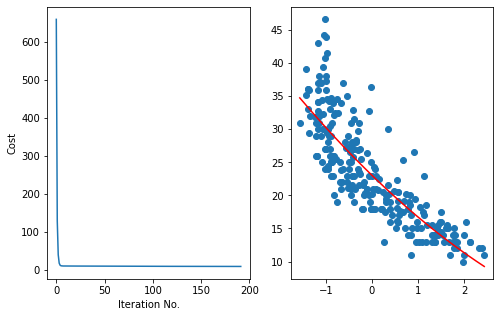

square_Error_value = 9.171814256794601, theta_0 = 23.4868,theta_1 = -10.000340868489037,theta_2 = 3.4975068611149456


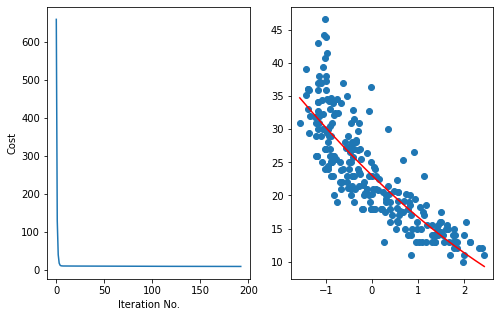

square_Error_value = 9.168901223765795, theta_0 = 23.4868,theta_1 = -10.027251199316105,theta_2 = 3.5244171919420144


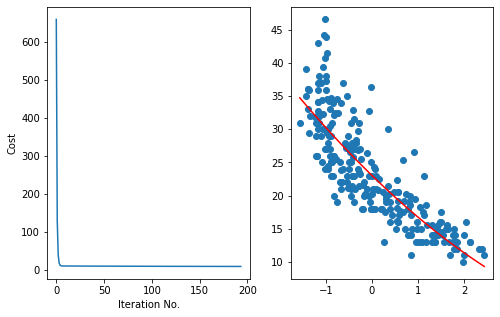

square_Error_value = 9.166009989350647, theta_0 = 23.4868,theta_1 = -10.054060654279265,theta_2 = 3.551226646905174


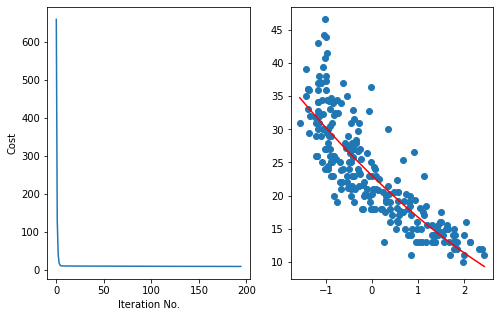

square_Error_value = 9.16314039042723, theta_0 = 23.4868,theta_1 = -10.08076961152102,theta_2 = 3.57793560414693


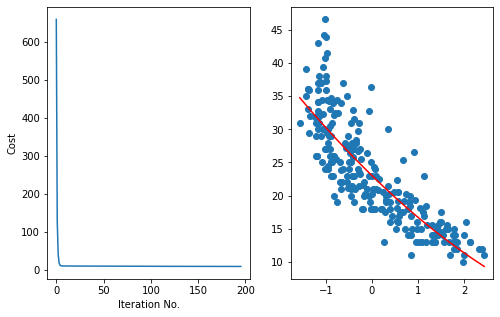

square_Error_value = 9.160292265094288, theta_0 = 23.4868,theta_1 = -10.107378447766376,theta_2 = 3.604544440392285


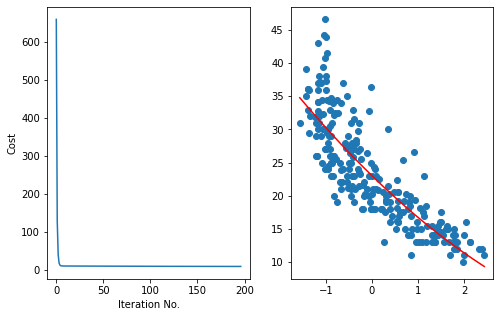

square_Error_value = 9.157465452662079, theta_0 = 23.4868,theta_1 = -10.133887538328144,theta_2 = 3.631053530954054


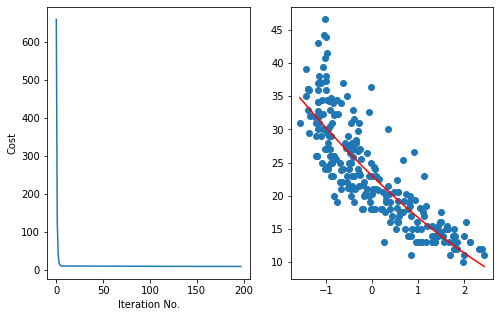

square_Error_value = 9.154659793643338, theta_0 = 23.4868,theta_1 = -10.160297257112248,theta_2 = 3.6574632497381567


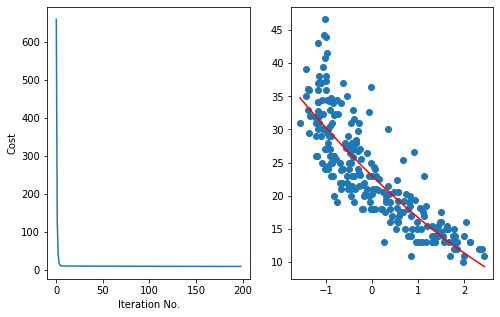

square_Error_value = 9.151875129744258, theta_0 = 23.4868,theta_1 = -10.186607976622984,theta_2 = 3.6837739692488927


In [21]:
#building our model
for i in iteration_no:
  h_fun = theta_0 + theta_1*norm_training_set_x_f1+theta_2*norm_training_set_x_f2
  j = 0.5*np.mean(np.square(h_fun - training_set_y))
  j_hist.append(j)
  theta_0 = theta_0 - (alpha)*np.mean(h_fun - training_set_y )
  theta_1 = theta_1 - (alpha)*np.mean(((h_fun - training_set_y)*norm_training_set_x_f1) )
  theta_2 = theta_2 - (alpha)*np.mean(((h_fun - training_set_y)*norm_training_set_x_f2))
  
  fig,ax = plt.subplots(1,2,figsize = [8,5])
  
  ax[0].plot(j_hist[:])
  ax[0].set_xlabel('Iteration No.')
  ax[0].set_ylabel('Cost')

  ax[1].scatter(norm_training_set_x_f1,training_set_y)

  x_r = np.arange(np.min(training_set_x_f1),np.max(training_set_x_f1),0.1)
  x_r2 = np.square(x_r)
  x_r = (x_r - training_set_x_f1_mu)/training_set_x_f1_std
  x_r2 = (x_r2 - training_set_x_f2_mu)/training_set_x_f2_std
  ax[1].plot(x_r,(theta_0 + theta_1*x_r+theta_2*x_r2),c="r",label="prdection line")
  plt.show()
  
  print(f"square_Error_value = {j}, theta_0 = {theta_0},theta_1 = {theta_1},theta_2 = {theta_2}")








#Assignment(2 marks)

In [22]:
# Making maodel more precise by adding more features
# Model : 2(with four features)
#setting parameters
training_set_x_f1 = training_set_x["weight"]
training_set_x_f2 = np.square(training_set_x["weight"])
training_set_x_f3 = training_set_x["displacement"]
training_set_x_f4 = np.square(training_set_x["displacement"])
training_set_x_f3_mu = np.mean(training_set_x_f3)
training_set_x_f4_mu =np.mean(training_set_x_f4)
training_set_x_f3_std = np.std(training_set_x_f3)
training_set_x_f4_std =np.std(training_set_x_f4)

# normalising the features 3 and features 4
norm_training_set_x_f3 = (training_set_x_f3 - training_set_x_f3_mu)/training_set_x_f3_std
norm_training_set_x_f4 = (training_set_x_f4 - training_set_x_f4_mu)/training_set_x_f4_std

theta_3 = random.uniform(-10,10)
theta_4 = random.uniform(-10,10)
alpha = 0.5
iteration_no = range(1,200)
j_hist1 = []

theta_0_1 = 23.4868


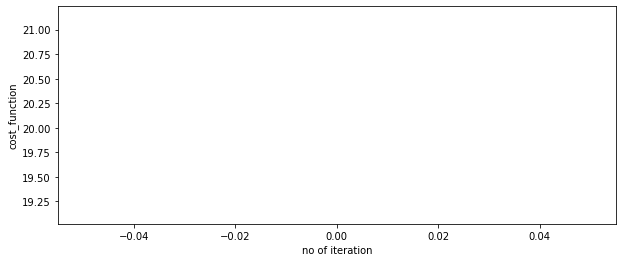

square_Error_value = 20.12992014720184, theta_0 = 23.4868,theta_1 = -7.850415577665142,theta_2 = 6.064700627872796,theta_3 = -2.5523827795746623,theta_4 = 2.297112034945994
theta_0_2 = 23.4868


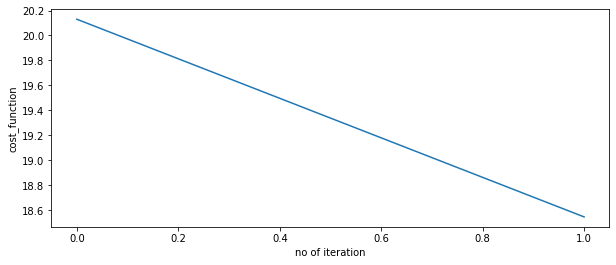

square_Error_value = 18.544103095655053, theta_0 = 23.4868,theta_1 = -10.071563035969298,theta_2 = 3.875086334462151,theta_3 = -4.78339925403354,theta_4 = 0.15623680366500858
theta_0_3 = 23.4868


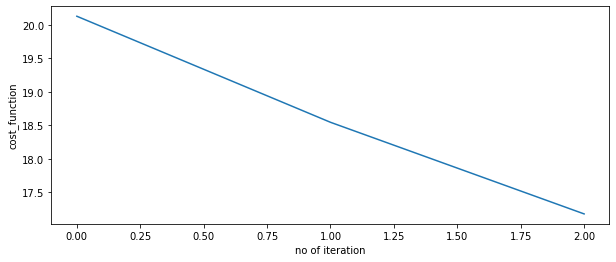

square_Error_value = 17.174011925245825, theta_0 = 23.4868,theta_1 = -8.056031294696757,theta_2 = 5.933497807554644,theta_3 = -2.761208825726603,theta_4 = 2.2222779573544176
theta_0_4 = 23.4868


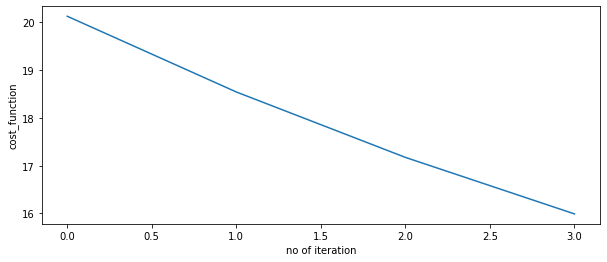

square_Error_value = 15.99022747299551, theta_0 = 23.4868,theta_1 = -9.9759905490445,theta_2 = 4.044970742354238,theta_3 = -4.6917096277160315,theta_4 = 0.3769725675328992
theta_0_5 = 23.4868


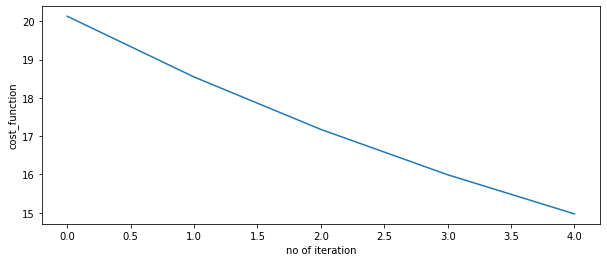

square_Error_value = 14.9673440668052, theta_0 = 23.4868,theta_1 = -8.23730212851882,theta_2 = 5.824842699162148,theta_3 = -2.9492927378350884,theta_4 = 2.164533295847544
theta_0_6 = 23.4868


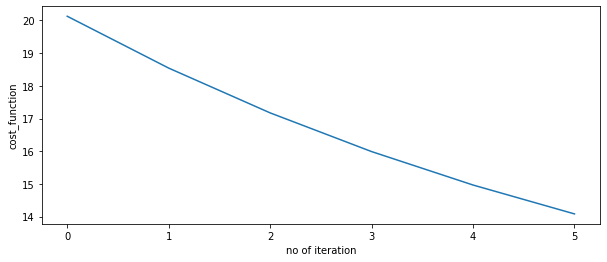

square_Error_value = 14.083421952058806, theta_0 = 23.4868,theta_1 = -9.897104654893615,theta_2 = 4.19629160044029,theta_3 = -4.620221540909778,theta_4 = 0.5743758315395813
theta_0_7 = 23.4868


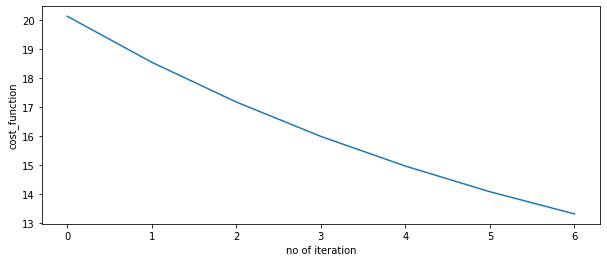

square_Error_value = 13.319514426695475, theta_0 = 23.4868,theta_1 = -8.397424871726264,theta_2 = 5.735597713837436,theta_3 = -3.119345253140887,theta_4 = 2.121361642453019
theta_0_8 = 23.4868


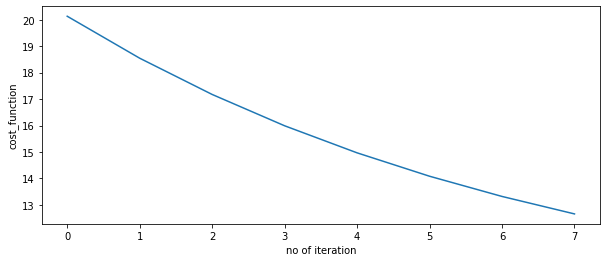

square_Error_value = 12.659259491770277, theta_0 = 23.4868,theta_1 = -9.83250759485589,theta_2 = 4.331518974527153,theta_3 = -4.566058512934312,theta_4 = 0.7514503076009582
theta_0_9 = 23.4868


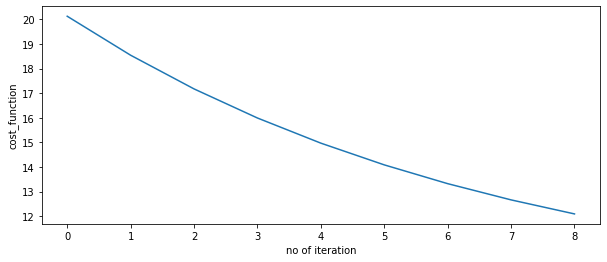

square_Error_value = 12.088527215228568, theta_0 = 23.4868,theta_1 = -8.539167727047403,theta_2 = 5.6630501675542115,theta_3 = -3.2737058642058106,theta_4 = 2.0905994007456115
theta_0_10 = 23.4868


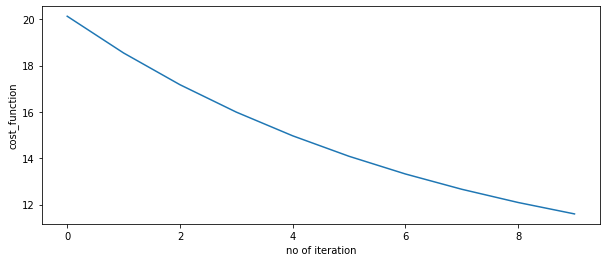

square_Error_value = 11.595115207580378, theta_0 = 23.4868,theta_1 = -9.780135976066461,theta_2 = 4.452783010127468,theta_3 = -4.5267353936870105,theta_4 = 0.9107988991124372
theta_0_11 = 23.4868


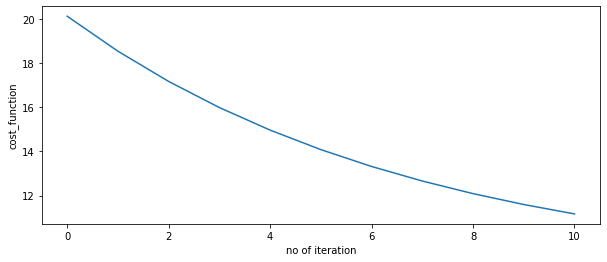

square_Error_value = 11.168485645264914, theta_0 = 23.4868,theta_1 = -8.664928047641377,theta_2 = 5.604854883452934,theta_3 = -3.41439393742582,theta_4 = 2.0703867917634216
theta_0_12 = 23.4868


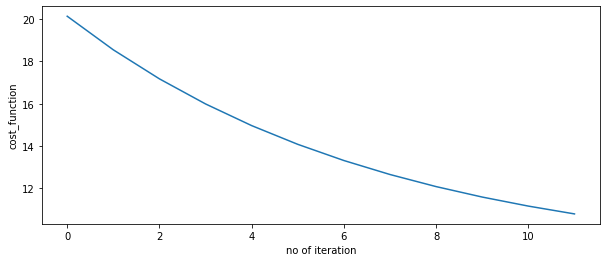

square_Error_value = 10.799538173098314, theta_0 = 23.4868,theta_1 = -9.738214454532718,theta_2 = 4.561920852998884,theta_3 = -4.5001054034938415,theta_4 = 1.054677581253423
theta_0_13 = 23.4868


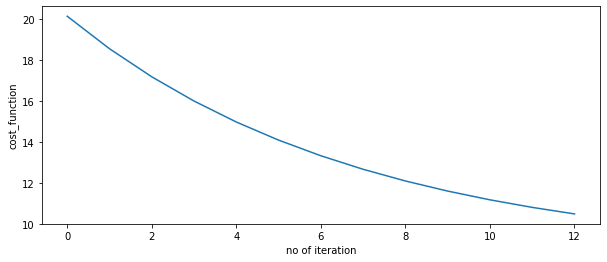

square_Error_value = 10.480413790606509, theta_0 = 23.4868,theta_1 = -8.776782281591315,theta_2 = 5.558984554732279,theta_3 = -3.543152796929661,theta_4 = 2.059125638876658
theta_0_14 = 23.4868


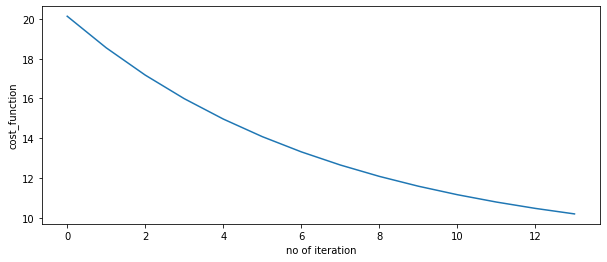

square_Error_value = 10.204325494931512, theta_0 = 23.4868,theta_1 = -9.705215815369662,theta_2 = 4.66051710105522,theta_3 = -4.4843143427443515,theta_4 = 1.1850420182373336
theta_0_15 = 23.4868


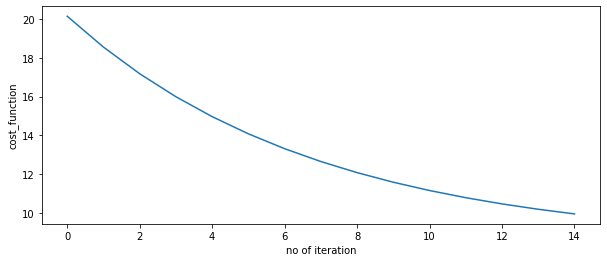

square_Error_value = 9.965412029760634, theta_0 = 23.4868,theta_1 = -8.876529174803348,theta_2 = 5.523686817508094,theta_3 = -3.661487740727087,theta_4 = 2.0554429958961067
theta_0_16 = 23.4868


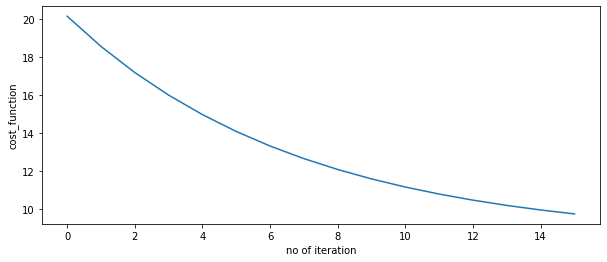

square_Error_value = 9.75861158779751, theta_0 = 23.4868,theta_1 = -9.679826568442211,theta_2 = 4.749938678034347,theta_3 = -4.477760999668366,theta_4 = 1.3035878983636868
theta_0_17 = 23.4868


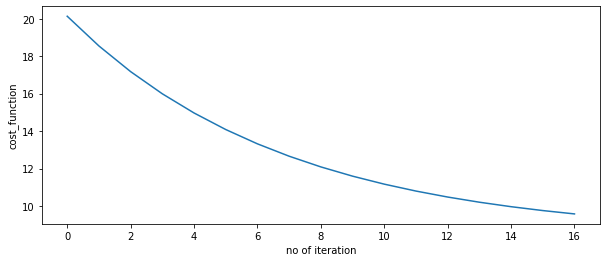

square_Error_value = 9.579552744407739, theta_0 = 23.4868,theta_1 = -8.965727143775661,theta_2 = 5.497447125437337,theta_3 = -3.770698823232865,theta_4 = 2.0581598116228084
theta_0_18 = 23.4868


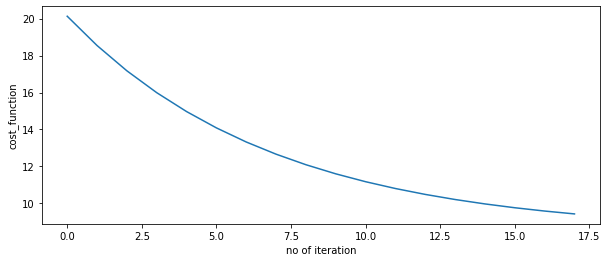

square_Error_value = 9.42446027150205, theta_0 = 23.4868,theta_1 = -9.660917298999168,theta_2 = 4.831364896919368,theta_3 = -4.479062916417613,theta_4 = 1.41178583506735
theta_0_19 = 23.4868


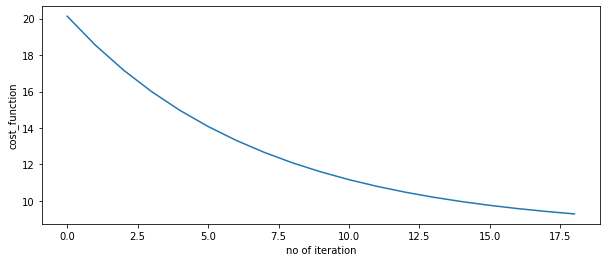

square_Error_value = 9.290073801473117, theta_0 = 23.4868,theta_1 = -9.045726606306083,theta_2 = 5.478956640974074,theta_3 = -3.8719091237603562,theta_4 = 2.06626393522179
theta_0_20 = 23.4868


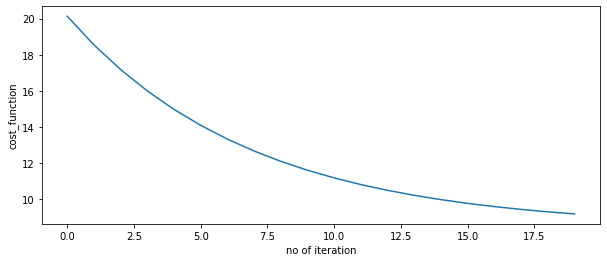

square_Error_value = 9.173577587992792, theta_0 = 23.4868,theta_1 = -9.647517117546046,theta_2 = 4.90581337552469,theta_3 = -4.487026787526101,theta_4 = 1.5109115674641556
theta_0_21 = 23.4868


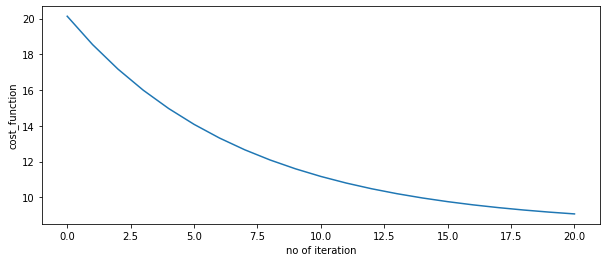

square_Error_value = 9.072539849675014, theta_0 = 23.4868,theta_1 = -9.117697951535895,theta_2 = 5.4670844645002195,theta_3 = -3.9660891217566996,theta_4 = 2.0788868626870887
theta_0_22 = 23.4868


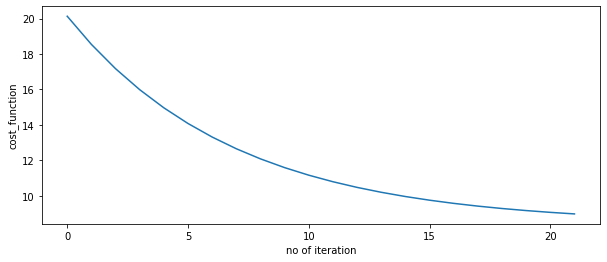

square_Error_value = 8.984860389173008, theta_0 = 23.4868,theta_1 = -9.638791643480914,theta_2 = 4.974162375572155,theta_3 = -4.500622863269896,theta_4 = 1.6020720947262044
theta_0_23 = 23.4868


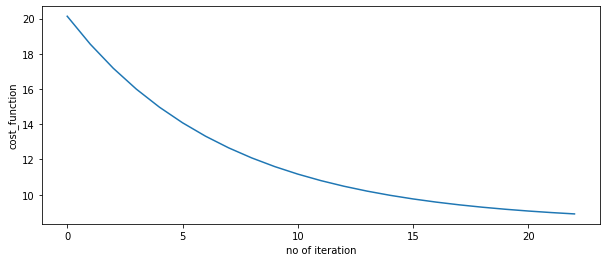

square_Error_value = 8.908725358659565, theta_0 = 23.4868,theta_1 = -9.182655738512162,theta_2 = 5.460853614521967,theta_3 = -4.054077714287155,theta_4 = 2.0952837073546617
theta_0_24 = 23.4868


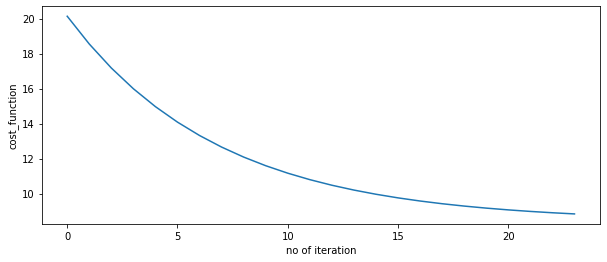

square_Error_value = 8.842568196681878, theta_0 = 23.4868,theta_1 = -9.634024034883815,theta_2 = 5.037170058005466,theta_3 = -4.518962815530917,theta_4 = 1.6862282928790027
theta_0_25 = 23.4868


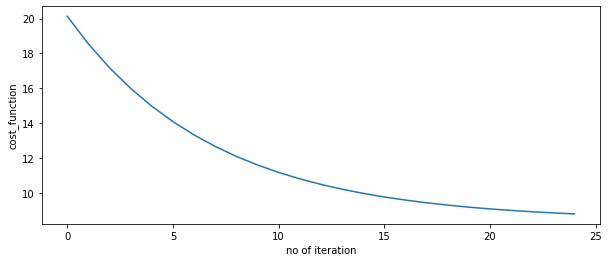

square_Error_value = 8.785035894408104, theta_0 = 23.4868,theta_1 = -9.241479632730371,theta_2 = 5.459420251601987,theta_3 = -4.1366003377107665,theta_4 = 2.1148159487273586
theta_0_26 = 23.4868


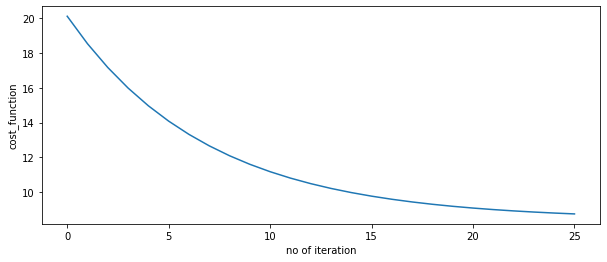

square_Error_value = 8.734959864158784, theta_0 = 23.4868,theta_1 = -9.632598644010262,theta_2 = 5.095491079507698,theta_3 = -4.5412805973056205,theta_4 = 1.764214488476786
theta_0_27 = 23.4868


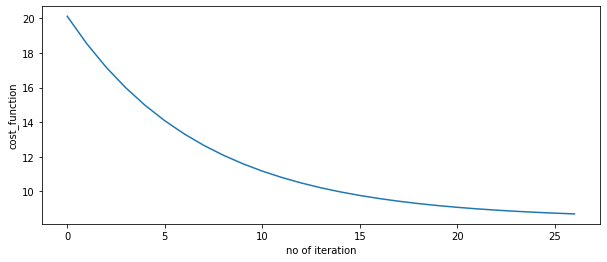

square_Error_value = 8.691330782319131, theta_0 = 23.4868,theta_1 = -9.294932521198557,theta_2 = 5.4620557074002205,theta_3 = -4.214284592019251,theta_4 = 2.1369365753664606
theta_0_28 = 23.4868


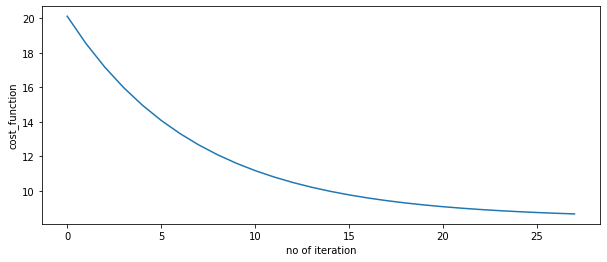

square_Error_value = 8.653276864396084, theta_0 = 23.4868,theta_1 = -9.633986935963035,theta_2 = 5.149690896715487,theta_3 = -4.566915890556562,theta_4 = 1.8367553995091377
theta_0_29 = 23.4868


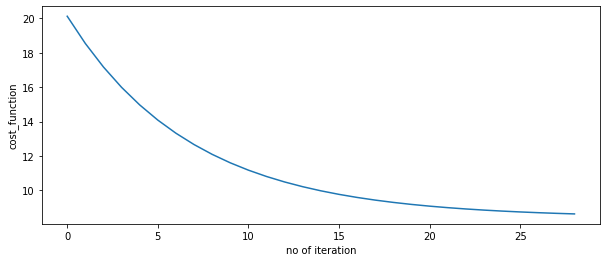

square_Error_value = 8.62004510396384, theta_0 = 23.4868,theta_1 = -9.343676186978866,theta_2 = 5.468130939584737,theta_3 = -4.287673711551965,theta_4 = 2.161177290626964
theta_0_30 = 23.4868


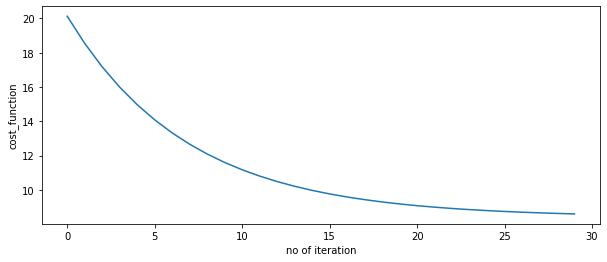

square_Error_value = 8.590985071127763, theta_0 = 23.4868,theta_1 = -9.637735357972716,theta_2 = 5.200258094186705,theta_3 = -4.595299792038048,theta_4 = 1.904480798462144
theta_0_31 = 23.4868


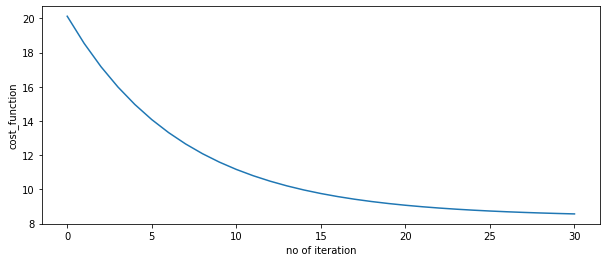

square_Error_value = 8.565534921306579, theta_0 = 23.4868,theta_1 = -9.388284872646762,theta_2 = 5.477103084712739,theta_3 = -4.357238178557327,theta_4 = 2.18713749573317
theta_0_32 = 23.4868


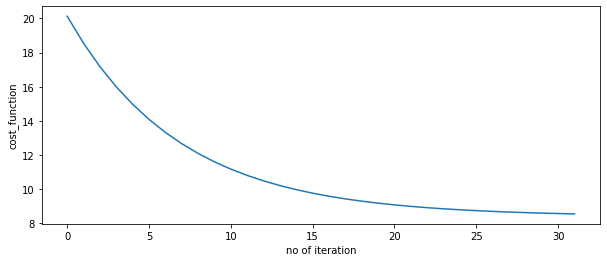

square_Error_value = 8.543209312775364, theta_0 = 23.4868,theta_1 = -9.643454889800529,theta_2 = 5.247615008673248,theta_3 = -4.6259424342076,theta_4 = 1.9679382045257605
theta_0_33 = 23.4868


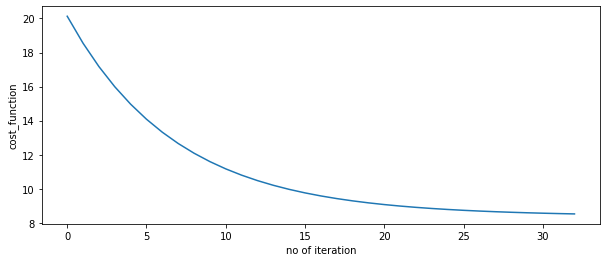

square_Error_value = 8.523588972554624, theta_0 = 23.4868,theta_1 = -9.429257017567801,theta_2 = 5.4885038255625025,theta_3 = -4.423385735314505,theta_4 = 2.2144748041116133
theta_0_34 = 23.4868


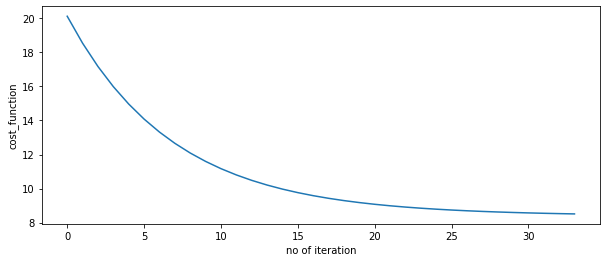

square_Error_value = 8.506311685759933, theta_0 = 23.4868,theta_1 = -9.65081204293159,theta_2 = 5.292126884725479,theta_3 = -4.658422279374646,theta_4 = 2.027603870490236
theta_0_35 = 23.4868


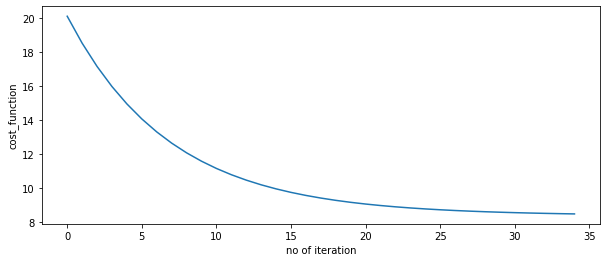

square_Error_value = 8.491064514208517, theta_0 = 23.4868,theta_1 = -9.467025415381562,theta_2 = 5.501929327763865,theta_3 = -4.486470015368843,theta_4 = 2.242896874886471
theta_0_36 = 23.4868


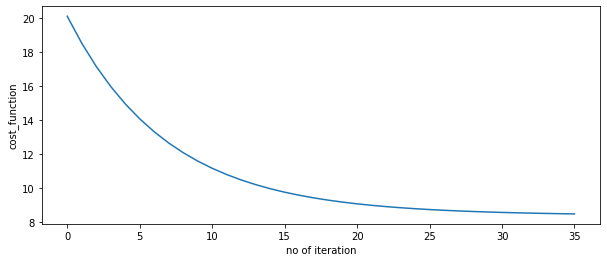

square_Error_value = 8.477577076574974, theta_0 = 23.4868,theta_1 = -9.659521108267196,theta_2 = 5.334109764288838,theta_3 = -4.692376860711209,theta_4 = 2.0838922940304347
theta_0_37 = 23.4868


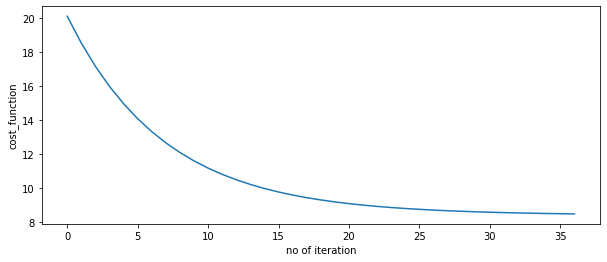

square_Error_value = 8.465615745269155, theta_0 = 23.4868,theta_1 = -9.501966004784533,theta_2 = 5.517031533743491,theta_3 = -4.546797984102766,theta_4 = 2.2721543827456556
theta_0_38 = 23.4868


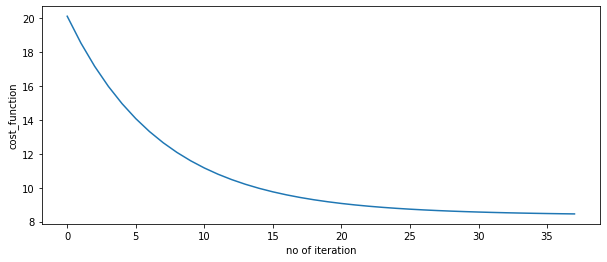

square_Error_value = 8.454978634968311, theta_0 = 23.4868,theta_1 = -9.669337479654331,theta_2 = 5.373837285037668,theta_3 = -4.727494774412061,theta_4 = 2.1371644520787783
theta_0_39 = 23.4868


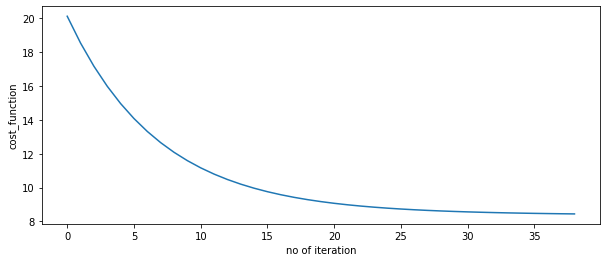

square_Error_value = 8.445491274798998, theta_0 = 23.4868,theta_1 = -9.53440547791228,theta_2 = 5.533510630676629,theta_3 = -4.604636352698435,theta_4 = 2.3020349666486384
theta_0_40 = 23.4868


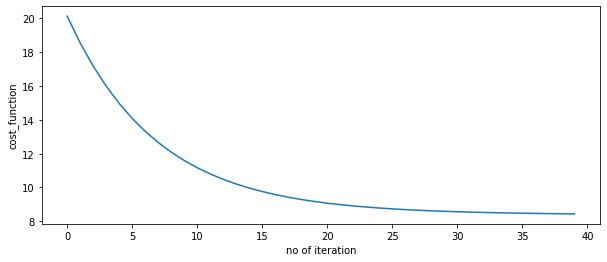

square_Error_value = 8.43700287089941, theta_0 = 23.4868,theta_1 = -9.680051904415391,theta_2 = 5.411546538115321,theta_3 = -4.763508753796739,theta_4 = 2.1877349301793596
theta_0_41 = 23.4868


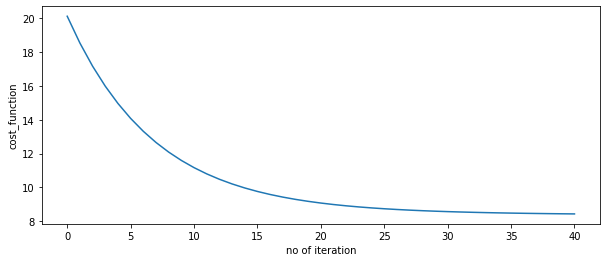

square_Error_value = 8.429383078817757, theta_0 = 23.4868,theta_1 = -9.564627865725335,theta_2 = 5.5511085339286765,theta_3 = -4.660217106977362,theta_4 = 2.3323580216257365
theta_0_42 = 23.4868


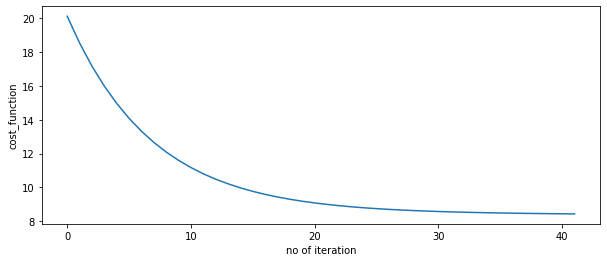

square_Error_value = 8.42251921619111, theta_0 = 23.4868,theta_1 = -9.691485532584593,theta_2 = 5.4474431151855045,theta_3 = -4.8001896790574365,theta_4 = 2.2358780955303343
theta_0_43 = 23.4868


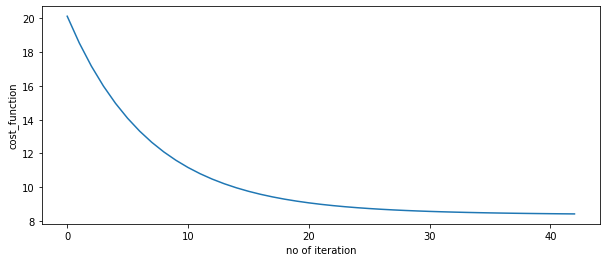

square_Error_value = 8.416313855638597, theta_0 = 23.4868,theta_1 = -9.592880238275368,theta_2 = 5.569603248904278,theta_3 = -4.713742273132527,theta_4 = 2.3629702166928452
theta_0_44 = 23.4868


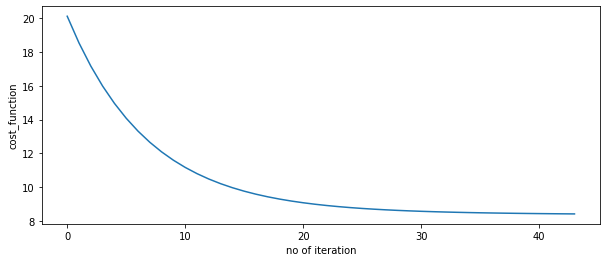

square_Error_value = 8.410682745997844, theta_0 = 23.4868,theta_1 = -9.703485654270601,theta_2 = 5.481705456792804,theta_3 = -4.837341396162476,theta_4 = 2.281833442368858
theta_0_45 = 23.4868


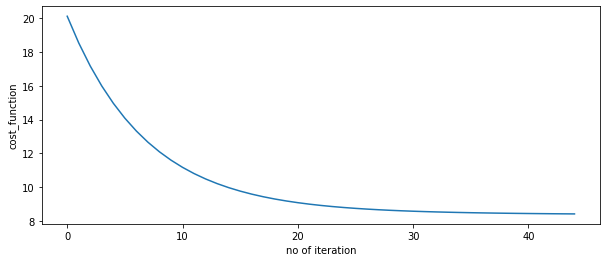

square_Error_value = 8.40555301711022, theta_0 = 23.4868,theta_1 = -9.619377639111972,theta_2 = 5.5888039927539035,theta_3 = -4.765388025574398,theta_4 = 2.3937416380891174
theta_0_46 = 23.4868


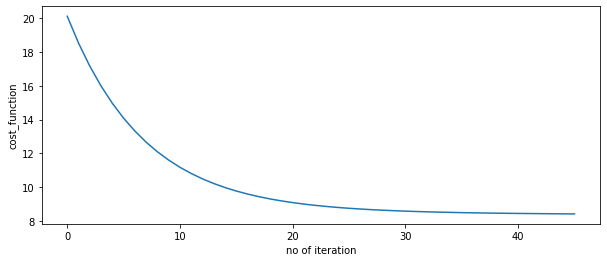

square_Error_value = 8.40086162947182, theta_0 = 23.4868,theta_1 = -9.715922029837246,theta_2 = 5.514488598587619,theta_3 = -4.874796235546508,theta_4 = 2.3258102210086182
theta_0_47 = 23.4868


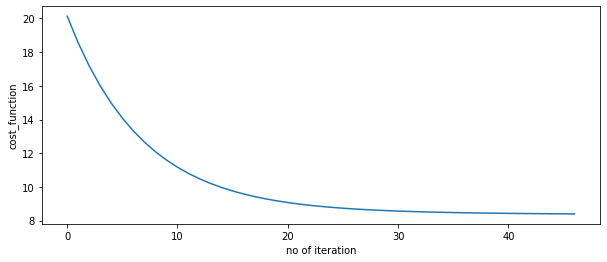

square_Error_value = 8.396554035344675, theta_0 = 23.4868,theta_1 = -9.644307356991595,theta_2 = 5.608546973411422,theta_3 = -4.815308227626506,theta_4 = 2.4245624709947533
theta_0_48 = 23.4868


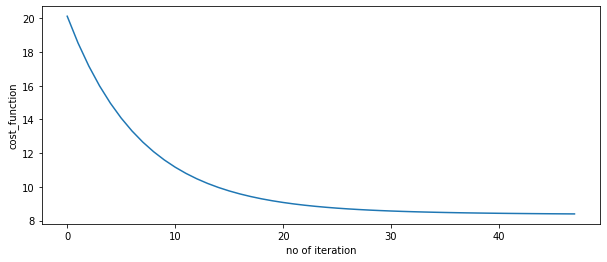

square_Error_value = 8.392583022480101, theta_0 = 23.4868,theta_1 = -9.728683730761352,theta_2 = 5.545927398653805,theta_3 = -4.912411136019807,theta_4 = 2.3679914468381127
theta_0_49 = 23.4868


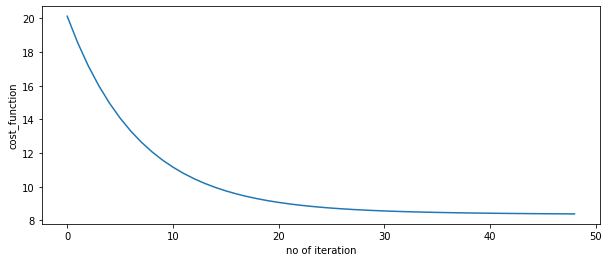

square_Error_value = 8.388907715541892, theta_0 = 23.4868,theta_1 = -9.667832624127929,theta_2 = 5.628691737290977,theta_3 = -4.8636374833118845,theta_4 = 2.455340144909644
theta_0_50 = 23.4868


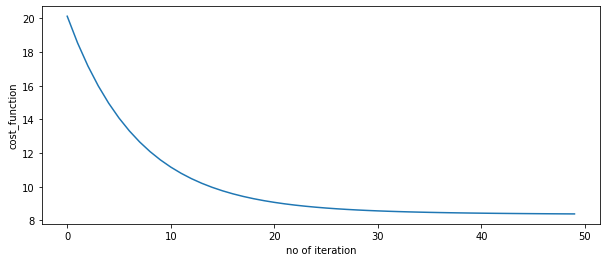

square_Error_value = 8.385492713715744, theta_0 = 23.4868,theta_1 = -9.741676420378488,theta_2 = 5.576139317693904,theta_3 = -4.950064292124714,theta_4 = 2.4085373726114274
theta_0_51 = 23.4868


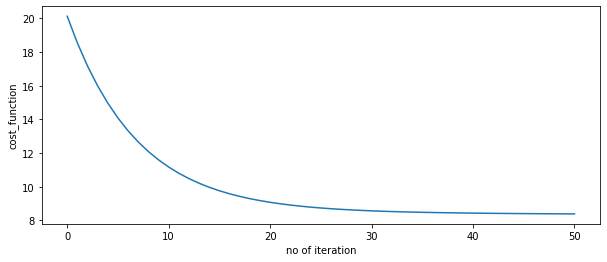

square_Error_value = 8.382307345926394, theta_0 = 23.4868,theta_1 = -9.690095818182662,theta_2 = 5.64911800895139,theta_3 = -4.910493767695335,theta_4 = 2.4859968782364894
theta_0_52 = 23.4868


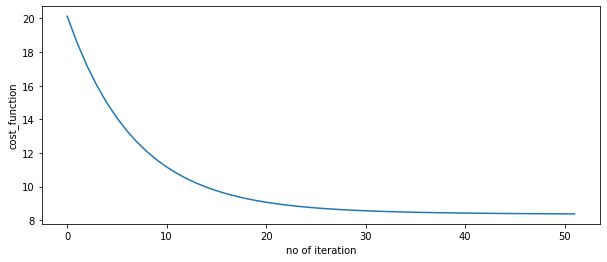

square_Error_value = 8.379325027618663, theta_0 = 23.4868,theta_1 = -9.754820013513712,theta_2 = 5.605226813924785,theta_3 = -4.987652254229696,theta_4 = 2.4475884961384007
theta_0_53 = 23.4868


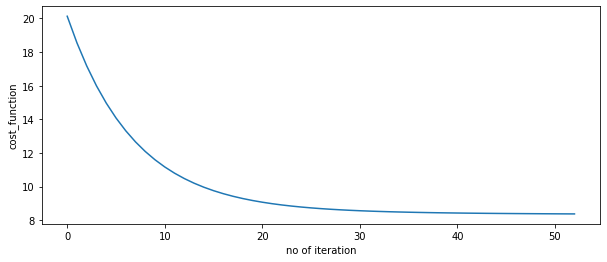

square_Error_value = 8.376522705247195, theta_0 = 23.4868,theta_1 = -9.71122123478231,theta_2 = 5.66972295639548,theta_3 = -4.955980693952192,theta_4 = 2.516467566543175
theta_0_54 = 23.4868


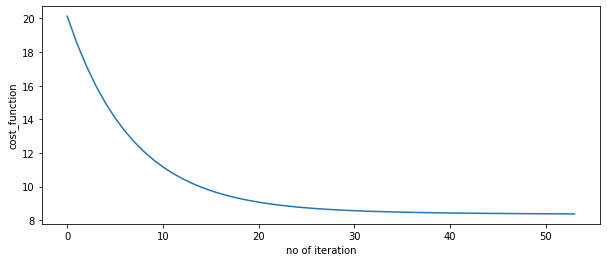

square_Error_value = 8.373880376510174, theta_0 = 23.4868,theta_1 = -9.768046662430685,theta_2 = 5.6332794059985805,theta_3 = -5.025087420215297,theta_4 = 2.485268165771089
theta_0_55 = 23.4868


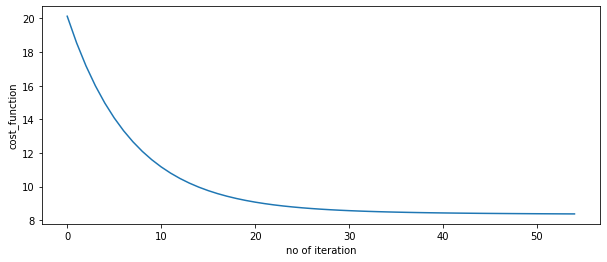

square_Error_value = 8.371380675994386, theta_0 = 23.4868,theta_1 = -9.731317488340538,theta_2 = 5.690418824629464,theta_3 = -5.000189467318418,theta_4 = 2.546697966675986
theta_0_56 = 23.4868


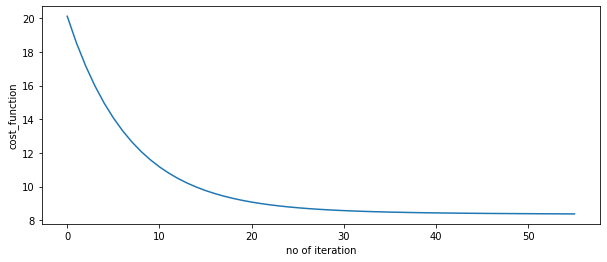

square_Error_value = 8.369008517308766, theta_0 = 23.4868,theta_1 = -9.78129902380465,theta_2 = 5.660375449902053,theta_3 = -5.06229586587511,theta_4 = 2.521684837683401
theta_0_57 = 23.4868


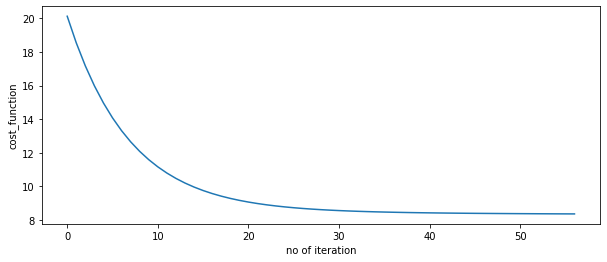

square_Error_value = 8.366750784000791, theta_0 = 23.4868,theta_1 = -9.750479591175784,theta_2 = 5.71113088785399,theta_3 = -5.043200569163917,theta_4 = 2.5766431355279424
theta_0_58 = 23.4868


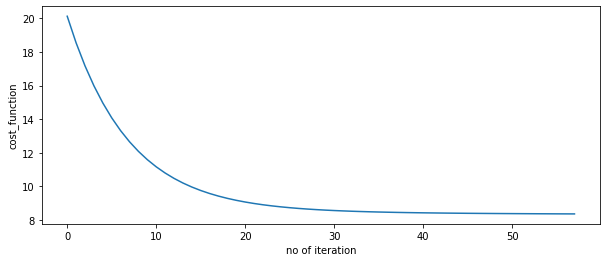

square_Error_value = 8.364596062601377, theta_0 = 23.4868,theta_1 = -9.794528767693235,theta_2 = 5.686583669440514,theta_3 = -5.099215468303926,theta_4 = 2.5569340316738685
theta_0_59 = 23.4868


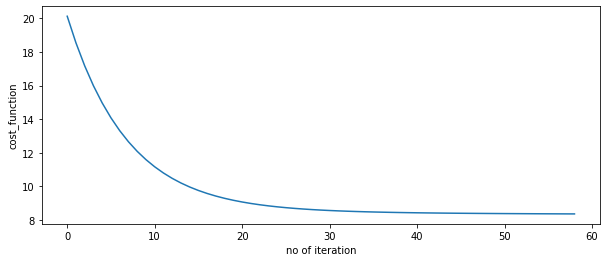

square_Error_value = 8.362534412051712, theta_0 = 23.4868,theta_1 = -9.768790754176218,theta_2 = 5.731795677357257,theta_3 = -5.085085208469271,theta_4 = 2.606266087981932
theta_0_60 = 23.4868


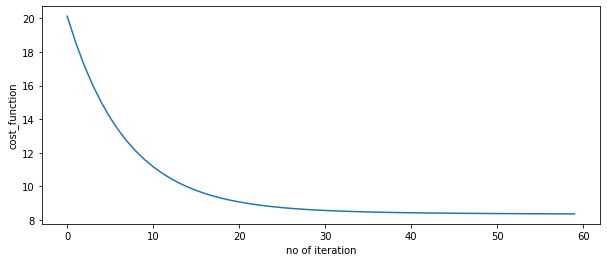

square_Error_value = 8.360557164549439, theta_0 = 23.4868,theta_1 = -9.807695294881967,theta_2 = 5.711964474440216,theta_3 = -5.135794282726583,theta_4 = 2.5911000259344297
theta_0_61 = 23.4868


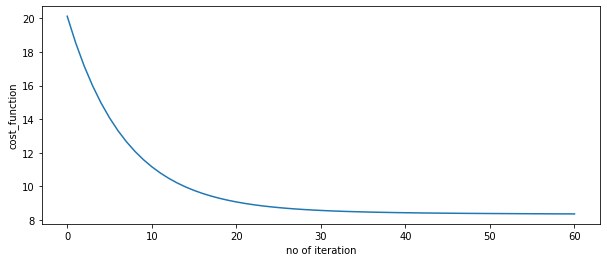

square_Error_value = 8.358656753528622, theta_0 = 23.4868,theta_1 = -9.786323946436244,theta_2 = 5.752359447973971,theta_3 = -5.12590657284506,theta_4 = 2.63553664347297
theta_0_62 = 23.4868


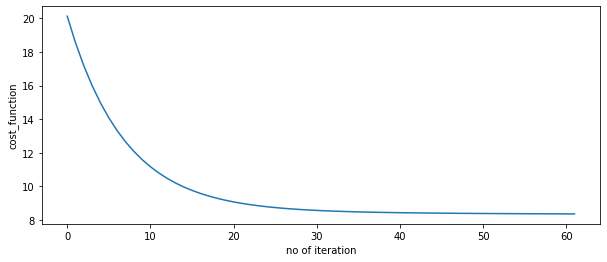

square_Error_value = 8.356826565072526, theta_0 = 23.4868,theta_1 = -9.820764633638127,theta_2 = 5.736571096085527,theta_3 = -5.1719891385656,theta_4 = 2.624257325788671
theta_0_63 = 23.4868


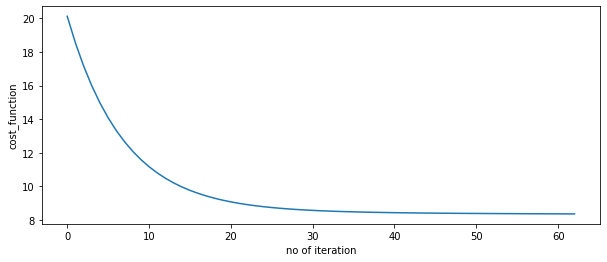

square_Error_value = 8.355060809563192, theta_0 = 23.4868,theta_1 = -9.8031432462474,theta_2 = 5.772776850984176,theta_3 = -5.165720906799591,theta_4 = 2.664430434857041
theta_0_64 = 23.4868


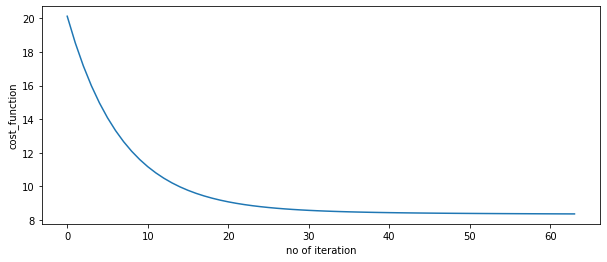

square_Error_value = 8.353354410807777, theta_0 = 23.4868,theta_1 = -9.833708490919959,theta_2 = 5.760450564740284,theta_3 = -5.207764425167072,theta_4 = 2.6564719366965925
theta_0_65 = 23.4868


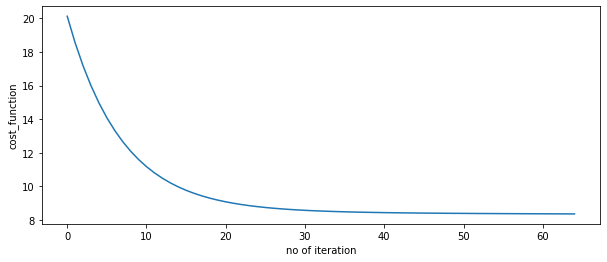

square_Error_value = 8.351702910258064, theta_0 = 23.4868,theta_1 = -9.819305011465667,theta_2 = 5.793009785659245,theta_3 = -5.204578441138103,theta_4 = 2.6929280569295613
theta_0_66 = 23.4868


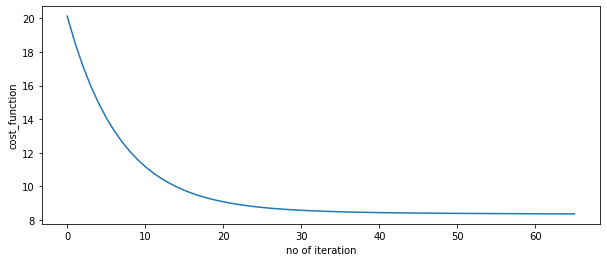

square_Error_value = 8.350102384264869, theta_0 = 23.4868,theta_1 = -9.846503436546984,theta_2 = 5.783644552096839,theta_3 = -5.243091041600322,theta_4 = 2.6878024677507524
theta_0_67 = 23.4868


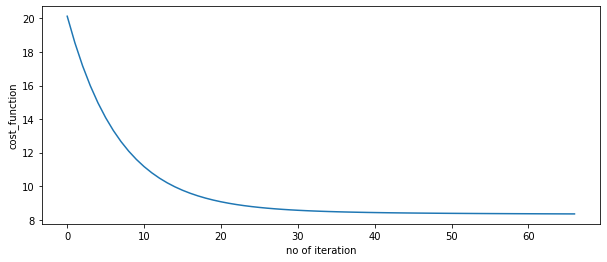

square_Error_value = 8.348549372589696, theta_0 = 23.4868,theta_1 = -9.834858893504688,theta_2 = 5.8130264054101,theta_3 = -5.24252419408021,theta_4 = 2.7210143350858482
theta_0_68 = 23.4868


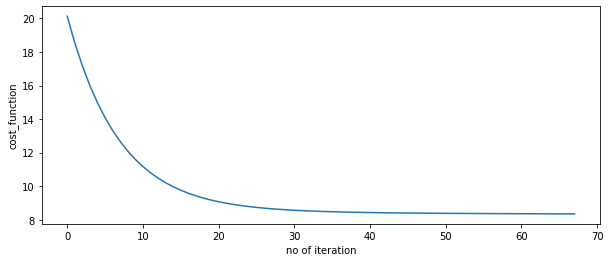

square_Error_value = 8.347040816638604, theta_0 = 23.4868,theta_1 = -9.859130201817791,theta_2 = 5.806190096474282,theta_3 = -5.27794548840228,theta_4 = 2.7183010883649366
theta_0_69 = 23.4868


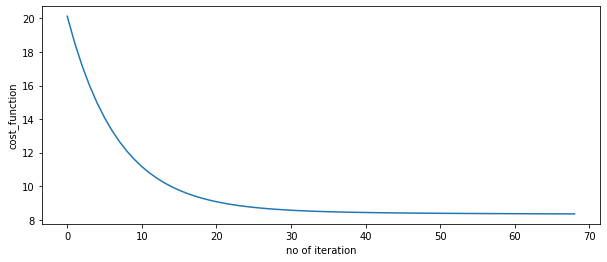

square_Error_value = 8.345574006092574, theta_0 = 23.4868,theta_1 = -9.849848715940674,theta_2 = 5.832800257734355,theta_3 = -5.279598661840252,theta_4 = 2.748677697328873
theta_0_70 = 23.4868


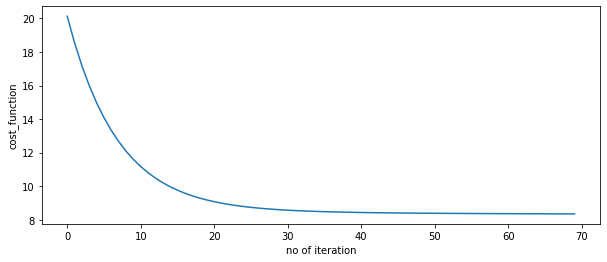

square_Error_value = 8.344146532789566, theta_0 = 23.4868,theta_1 = -9.871573076629998,theta_2 = 5.828120227482455,theta_3 = -5.31230908212571,theta_4 = 2.748014357807309
theta_0_71 = 23.4868


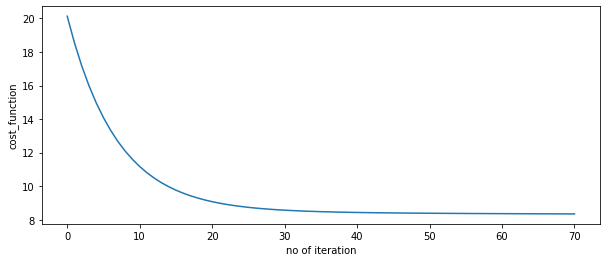

square_Error_value = 8.342756250869567, theta_0 = 23.4868,theta_1 = -9.864313235891329,theta_2 = 5.852309539962893,theta_3 = -5.315838413964689,theta_4 = 2.7759096351664745
theta_0_72 = 23.4868


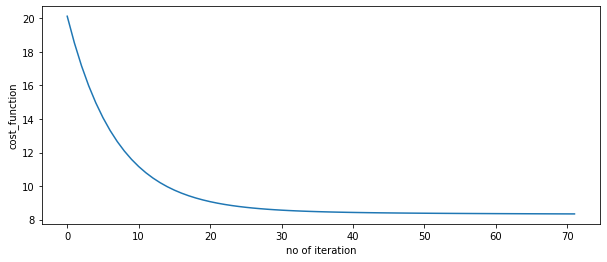

square_Error_value = 8.341401242328857, theta_0 = 23.4868,theta_1 = -9.883819391370201,theta_2 = 5.849464504023195,theta_3 = -5.346167276134394,theta_4 = 2.7769839445913185
theta_0_73 = 23.4868


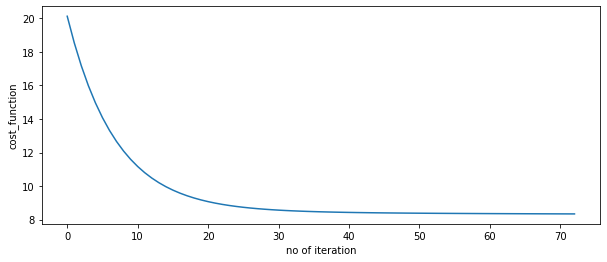

square_Error_value = 8.340079787246111, theta_0 = 23.4868,theta_1 = -9.878286803888168,theta_2 = 5.871536455231706,theta_3 = -5.35127660660802,theta_4 = 2.8027042409529983
theta_0_74 = 23.4868


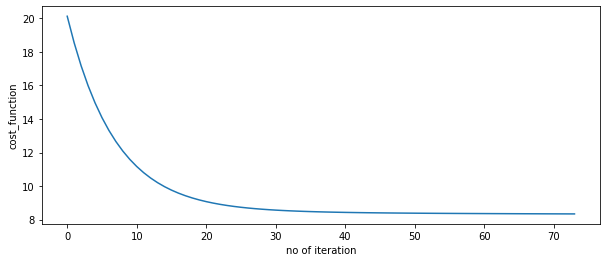

square_Error_value = 8.338790338043594, theta_0 = 23.4868,theta_1 = -9.89585907174852,theta_2 = 5.87024947766515,theta_3 = -5.37950907332313,theta_4 = 2.8052472504540322
theta_0_75 = 23.4868


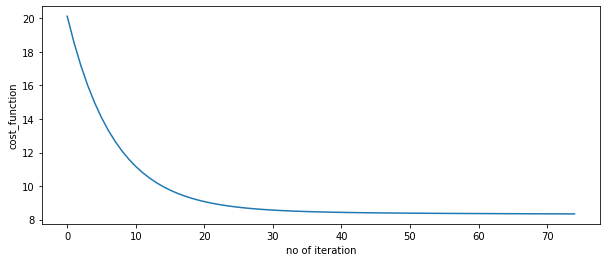

square_Error_value = 8.337531497233535, theta_0 = 23.4868,theta_1 = -9.891799935848017,theta_2 = 5.890466655202763,theta_3 = -5.385943425107253,theta_4 = 2.82905781096389
theta_0_76 = 23.4868


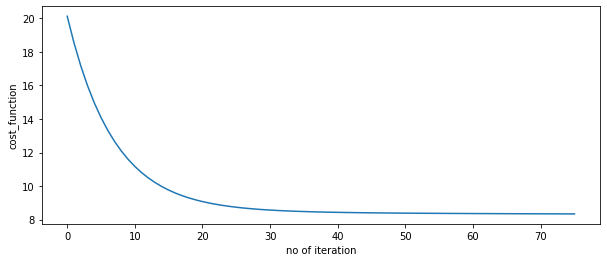

square_Error_value = 8.336301998174775, theta_0 = 23.4868,theta_1 = -9.90768425639514,theta_2 = 5.890499091760877,theta_3 = -5.412326518372976,theta_4 = 2.8328379516752604
theta_0_77 = 23.4868


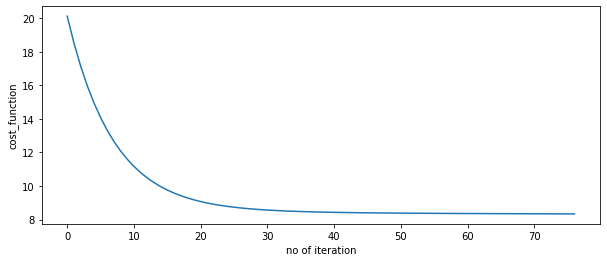

square_Error_value = 8.335100688429575, theta_0 = 23.4868,theta_1 = -9.90487980892066,theta_2 = 5.909088757872505,theta_3 = -5.419866465644721,theta_4 = 2.8549685049847016
theta_0_78 = 23.4868


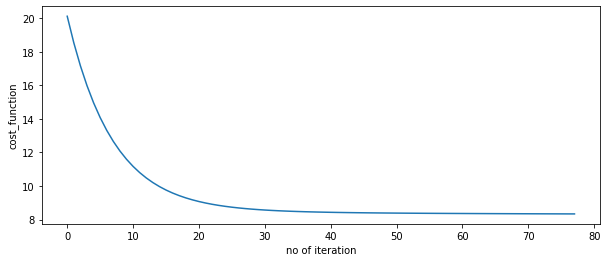

square_Error_value = 8.333926515366333, theta_0 = 23.4868,theta_1 = -9.919288968451552,theta_2 = 5.910235025237673,theta_3 = -5.444614258823657,theta_4 = 2.859786468780282
theta_0_79 = 23.4868


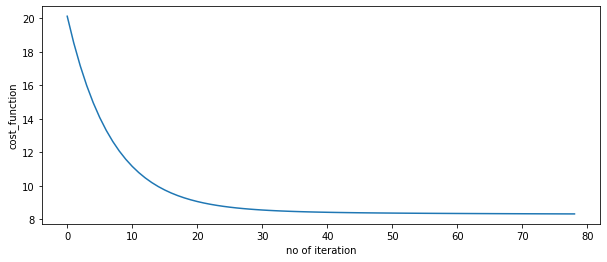

square_Error_value = 8.332778513702433, theta_0 = 23.4868,theta_1 = -9.917550691407115,theta_2 = 5.927393930376574,theta_3 = -5.453071064435487,theta_4 = 2.8804360544816046
theta_0_80 = 23.4868


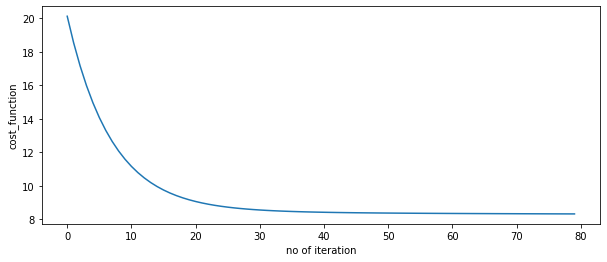

square_Error_value = 8.331655794722948, theta_0 = 23.4868,theta_1 = -9.93066883360839,theta_2 = 5.929476988755163,theta_3 = -5.476369165690668,theta_4 = 2.8861203741884704
theta_0_81 = 23.4868


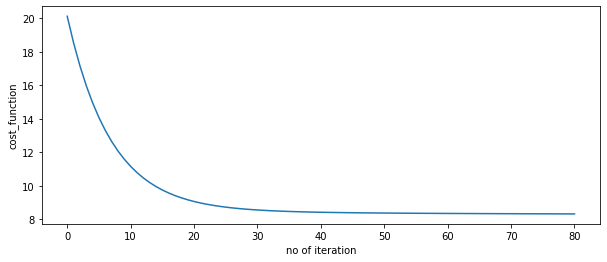

square_Error_value = 8.330557536947143, theta_0 = 23.4868,theta_1 = -9.929834315573654,theta_2 = 5.9453755280576175,theta_3 = -5.485580581708646,theta_4 = 2.9054615125275265
theta_0_82 = 23.4868


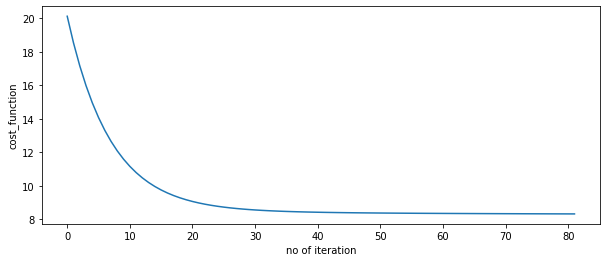

square_Error_value = 8.329482978045698, theta_0 = 23.4868,theta_1 = -9.941820838091964,theta_2 = 5.9482429798554355,theta_3 = -5.507590005604911,theta_4 = 2.9118647460885763
theta_0_83 = 23.4868


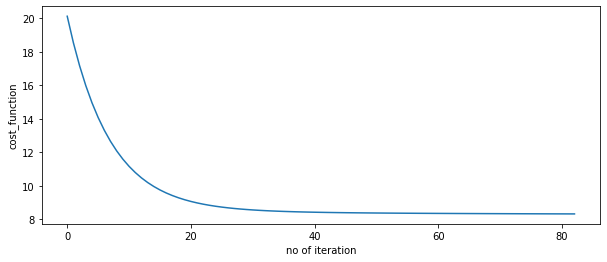

square_Error_value = 8.328431407838513, theta_0 = 23.4868,theta_1 = -9.941750201001701,theta_2 = 5.963028782238077,theta_3 = -5.517416646746165,theta_4 = 2.9300470396111593
theta_0_84 = 23.4868


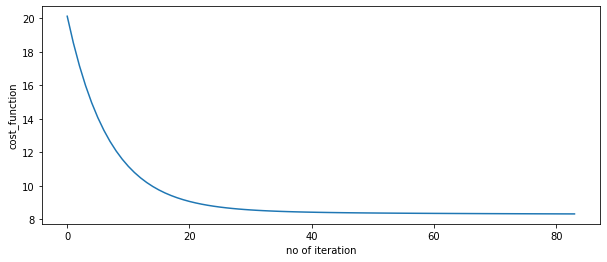

square_Error_value = 8.327402162226145, theta_0 = 23.4868,theta_1 = -9.95274312100615,theta_2 = 5.9665495028120095,theta_3 = -5.538277157534226,theta_4 = 2.937042475712103
theta_0_85 = 23.4868


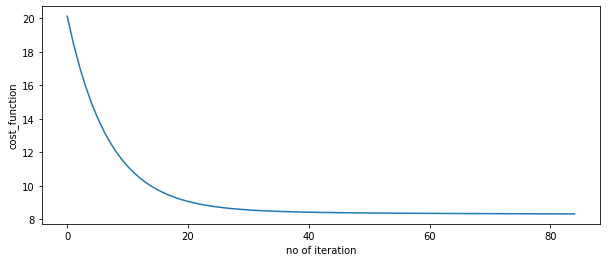

square_Error_value = 8.32639461792793, theta_0 = 23.4868,theta_1 = -9.953315935088188,theta_2 = 5.980350530156616,theta_3 = -5.548599369375892,theta_4 = 2.954195720276707
theta_0_86 = 23.4868


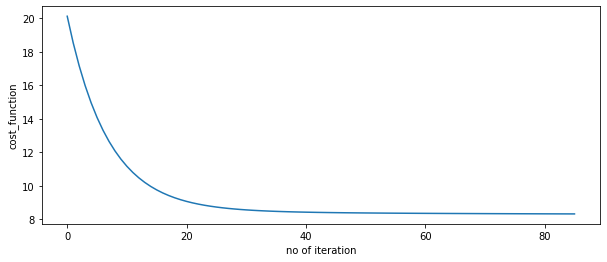

square_Error_value = 8.325408187917215, theta_0 = 23.4868,theta_1 = -9.963434796215413,theta_2 = 5.984411758091638,theta_3 = -5.568432368081611,theta_4 = 2.9616745342158746
theta_0_87 = 23.4868


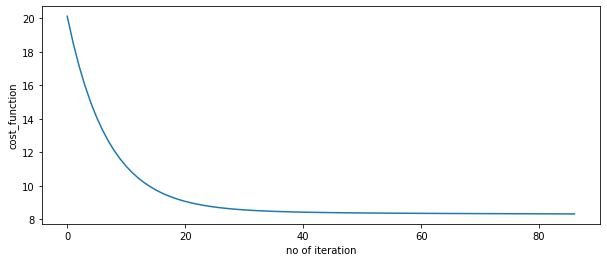

square_Error_value = 8.32444231745899, theta_0 = 23.4868,theta_1 = -9.964547416423429,theta_2 = 5.99733898140642,theta_3 = -5.579147522568273,theta_4 = 2.9779114062486425
theta_0_88 = 23.4868


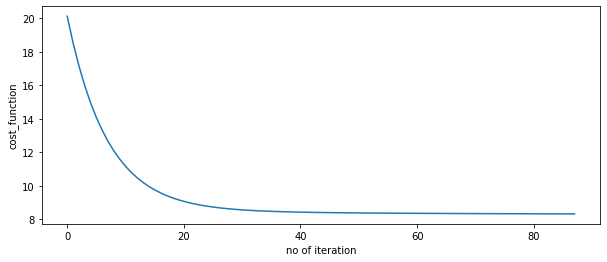

square_Error_value = 8.323496480668197, theta_0 = 23.4868,theta_1 = -9.973895799625653,theta_2 = 6.001843805660392,theta_3 = -5.598058540164104,theta_4 = 2.9857802045535333
theta_0_89 = 23.4868


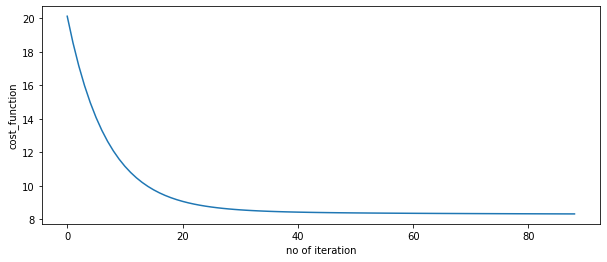

square_Error_value = 8.322570177518038, theta_0 = 23.4868,theta_1 = -9.975459066005426,theta_2 = 6.013993515974828,theta_3 = -5.609078700142281,theta_4 = 3.001198582303833
theta_0_90 = 23.4868


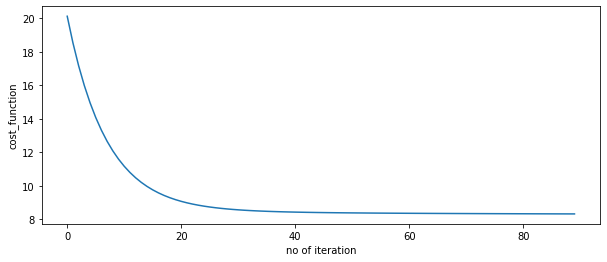

square_Error_value = 8.321662931237366, theta_0 = 23.4868,theta_1 = -9.984126758297418,theta_2 = 6.018858705777445,theta_3 = -5.627159550576272,theta_4 = 3.0093772829959233
theta_0_91 = 23.4868


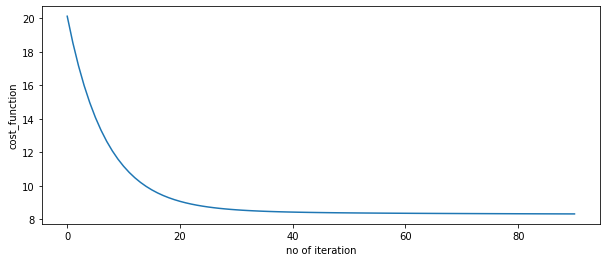

square_Error_value = 8.320774286044394, theta_0 = 23.4868,theta_1 = -9.986064010584618,theta_2 = 6.0303145096423085,theta_3 = -5.638409453031149,theta_4 = 3.024062251676785
theta_0_92 = 23.4868


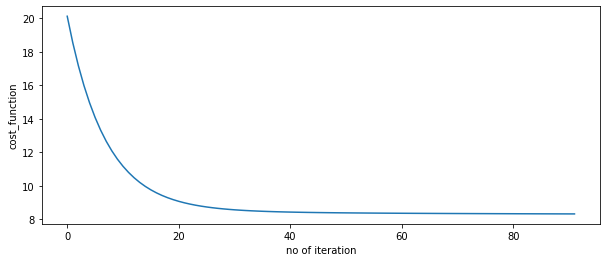

square_Error_value = 8.319903805171295, theta_0 = 23.4868,theta_1 = -9.994128878323458,theta_2 = 6.035468640413444,theta_3 = -5.6557400925478145,theta_4 = 3.032482254337107
theta_0_93 = 23.4868


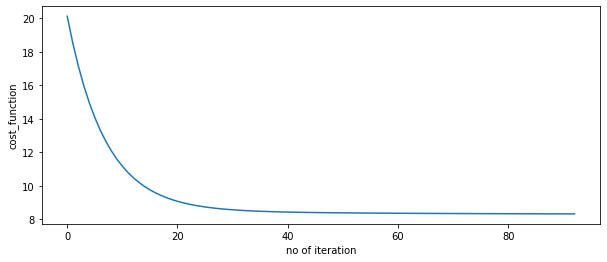

square_Error_value = 8.319051069140313, theta_0 = 23.4868,theta_1 = -9.996374241857604,theta_2 = 6.046303183068762,theta_3 = -5.667155407080235,theta_4 = 3.0465078382341595
theta_0_94 = 23.4868


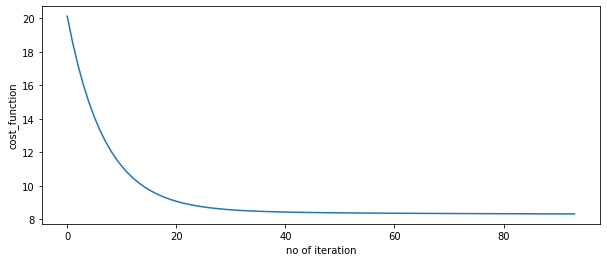

square_Error_value = 8.318215674257504, theta_0 = 23.4868,theta_1 = -10.003903848831113,theta_2 = 6.051685017994012,theta_3 = -5.6838055399285725,theta_4 = 3.0551104442831702
theta_0_95 = 23.4868


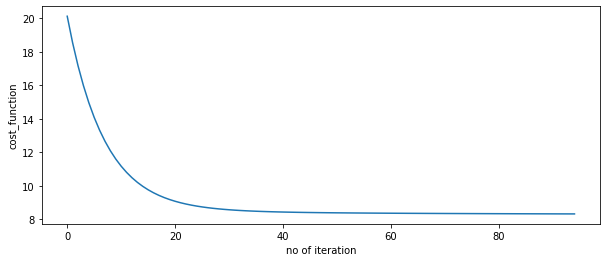

square_Error_value = 8.317397231294745, theta_0 = 23.4868,theta_1 = -10.00640075473021,theta_2 = 6.0619614713883285,theta_3 = -5.695331364937242,theta_4 = 3.0685411030423966
theta_0_96 = 23.4868


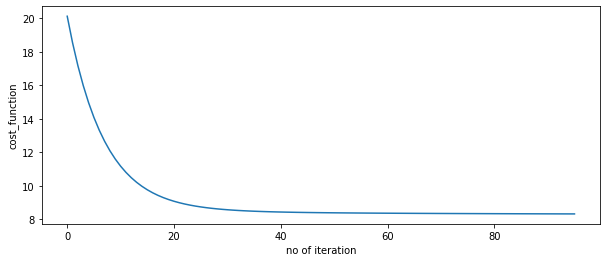

square_Error_value = 8.316595364334658, theta_0 = 23.4868,theta_1 = -10.013453759838663,theta_2 = 6.067518563793145,theta_3 = -5.711361830087516,theta_4 = 3.0772761520537104
theta_0_97 = 23.4868


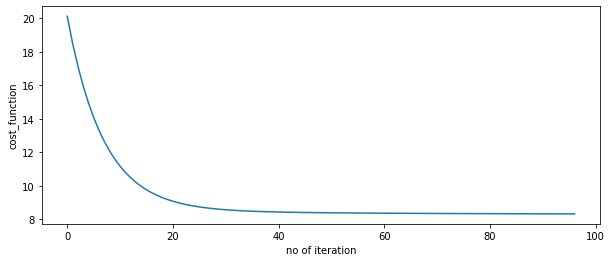

square_Error_value = 8.315809709756628, theta_0 = 23.4868,theta_1 = -10.01615366743901,theta_2 = 6.077291911560704,theta_3 = -5.722951394239915,theta_4 = 3.090168073285753
theta_0_98 = 23.4868


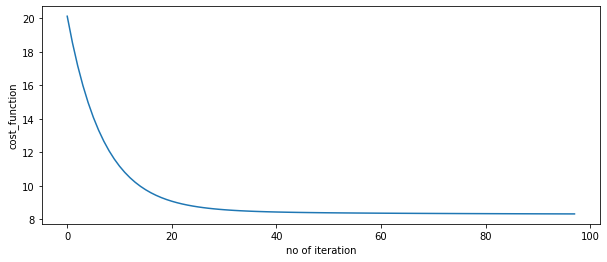

square_Error_value = 8.31503991534493, theta_0 = 23.4868,theta_1 = -10.02278103201244,theta_2 = 6.0829793979775655,theta_3 = -5.73841536300432,theta_4 = 3.098992765821262
theta_0_99 = 23.4868


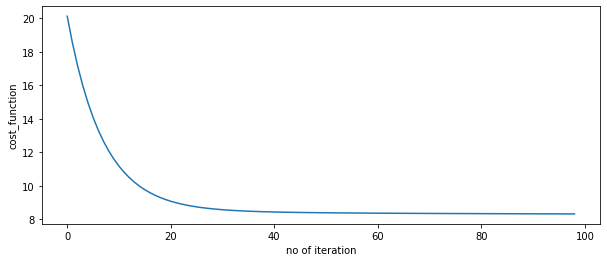

square_Error_value = 8.314285639502687, theta_0 = 23.4868,theta_1 = -10.025642325947073,theta_2 = 6.092297545096383,theta_3 = -5.750028904000378,theta_4 = 3.1113949817790947
theta_0_100 = 23.4868


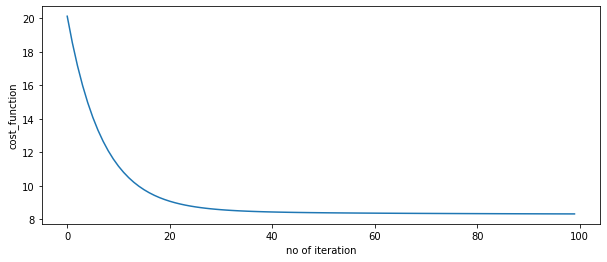

square_Error_value = 8.313546550557534, theta_0 = 23.4868,theta_1 = -10.031888356644668,theta_2 = 6.098077103024357,theta_3 = -5.764972914371428,theta_4 = 3.1202728632635126
theta_0_101 = 23.4868


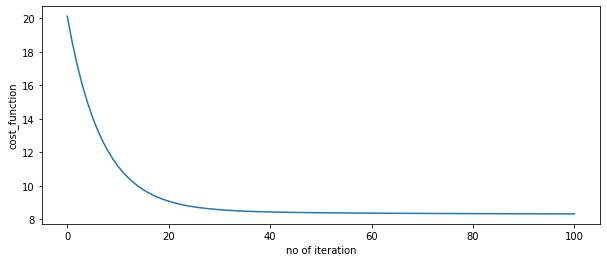

square_Error_value = 8.312822326146772, theta_0 = 23.4868,theta_1 = -10.034875394706482,theta_2 = 6.10698183409296,theta_3 = -5.776576710821683,theta_4 = 3.1322282155666117
theta_0_102 = 23.4868


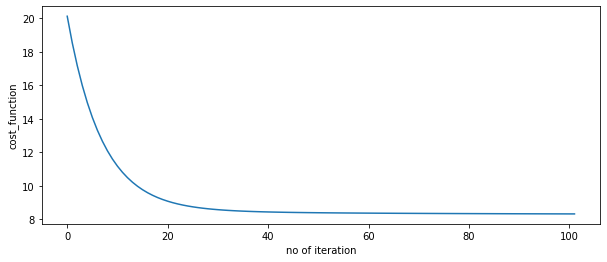

square_Error_value = 8.312112652671505, theta_0 = 23.4868,theta_1 = -10.0407786444073,theta_2 = 6.112820781994185,theta_3 = -5.79104156081802,theta_4 = 3.1411282991996683
theta_0_103 = 23.4868


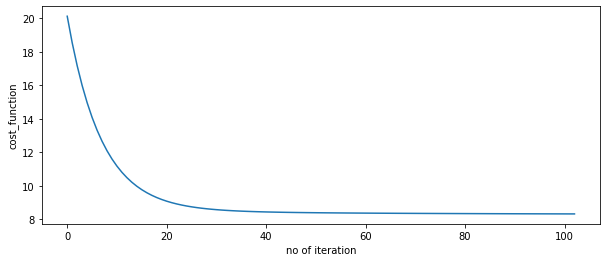

square_Error_value = 8.31141722481062, theta_0 = 23.4868,theta_1 = -10.043860935600344,theta_2 = 6.121348588796361,theta_3 = -5.802607096355016,theta_4 = 3.152674272310014
theta_0_104 = 23.4868


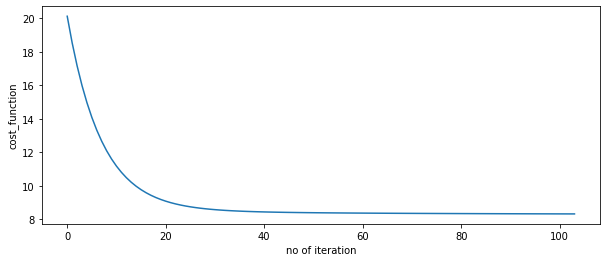

square_Error_value = 8.310735745086776, theta_0 = 23.4868,theta_1 = -10.049454981639593,theta_2 = 6.127219108935695,theta_3 = -5.816628615621295,theta_4 = 3.1615702820194596
theta_0_105 = 23.4868


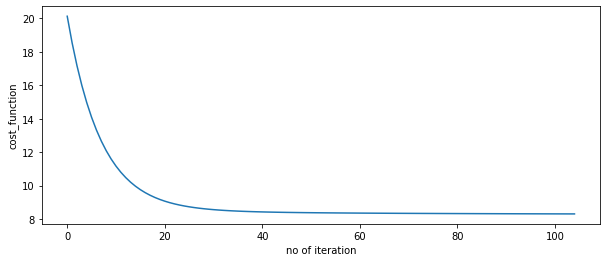

square_Error_value = 8.31006792347757, theta_0 = 23.4868,theta_1 = -10.052606476634663,theta_2 = 6.135401905140396,theta_3 = -5.828131857210408,theta_4 = 3.1727397233524037
theta_0_106 = 23.4868


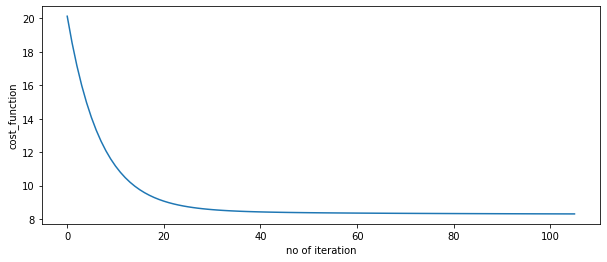

square_Error_value = 8.309413477066023, theta_0 = 23.4868,theta_1 = -10.05792059310131,theta_2 = 6.141280372518729,theta_3 = -5.84174157349026,theta_4 = 3.181609440385606
theta_0_107 = 23.4868


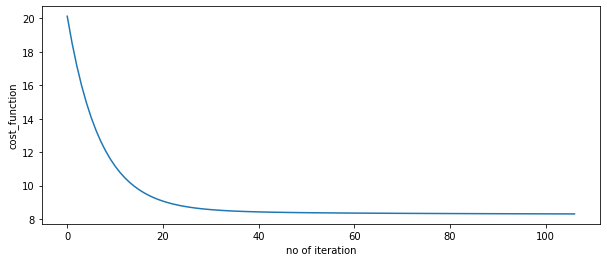

square_Error_value = 8.308772129725266, theta_0 = 23.4868,theta_1 = -10.061119071740649,theta_2 = 6.149146110925399,theta_3 = -5.853162348365247,theta_4 = 3.192431182501119
theta_0_108 = 23.4868


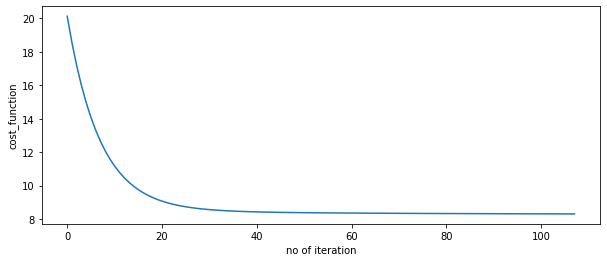

square_Error_value = 8.30814361183308, theta_0 = 23.4868,theta_1 = -10.066178810273428,theta_2 = 6.155012513840787,theta_3 = -5.866388063197417,theta_4 = 3.2012558814933203
theta_0_109 = 23.4868


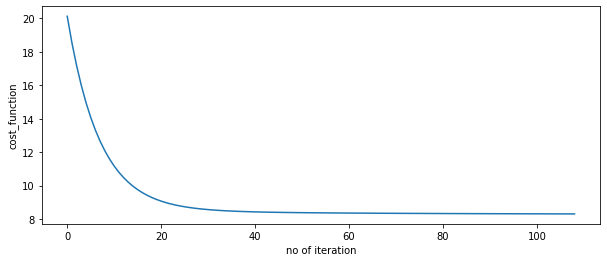

square_Error_value = 8.307527660012441, theta_0 = 23.4868,theta_1 = -10.069405352866331,theta_2 = 6.162585719476178,theta_3 = -5.877709520969728,theta_4 = 3.2117552797078877
theta_0_110 = 23.4868


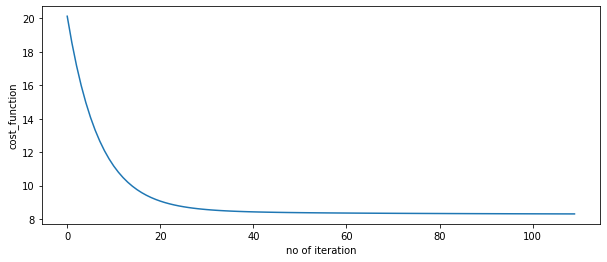

square_Error_value = 8.306924016894813, theta_0 = 23.4868,theta_1 = -10.074233044417202,theta_2 = 6.168423159219276,theta_3 = -5.890575806998322,theta_4 = 3.22051924199957
theta_0_111 = 23.4868


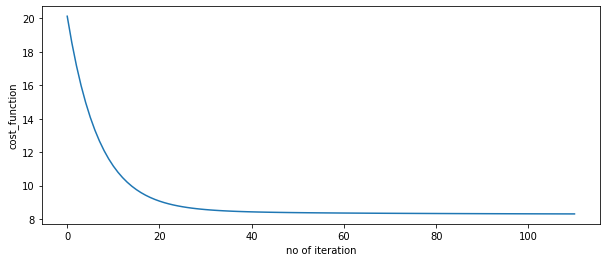

square_Error_value = 8.306332430903316, theta_0 = 23.4868,theta_1 = -10.07747157537901,theta_2 = 6.175725389774936,theta_3 = -5.901783955323395,theta_4 = 3.2307186389407976
theta_0_112 = 23.4868


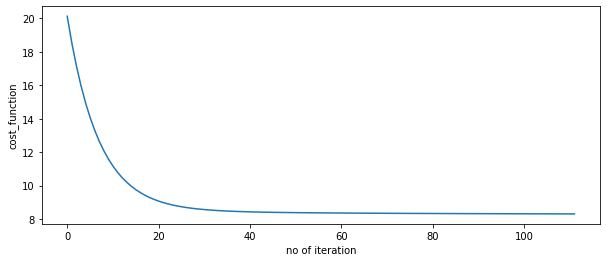

square_Error_value = 8.305752656053334, theta_0 = 23.4868,theta_1 = -10.082086763713365,theta_2 = 6.181519648668522,theta_3 = -5.914312585921419,theta_4 = 3.239408732586796
theta_0_113 = 23.4868


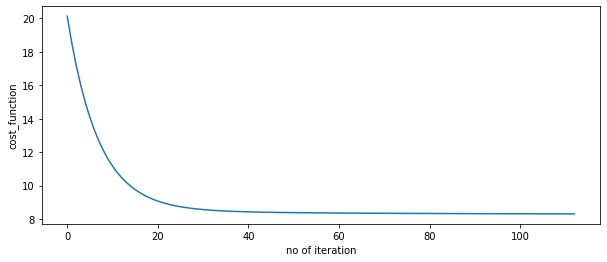

square_Error_value = 8.30518445176842, theta_0 = 23.4868,theta_1 = -10.085323657663752,theta_2 = 6.188569892199304,theta_3 = -5.925395889689192,theta_4 = 3.249327859642411
theta_0_114 = 23.4868


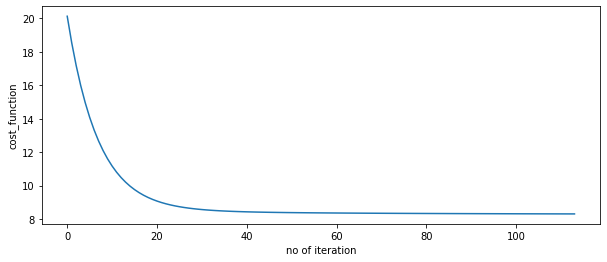

square_Error_value = 8.304627582709621, theta_0 = 23.4868,theta_1 = -10.089743473898743,theta_2 = 6.194309060662835,theta_3 = -5.9376062101338585,theta_4 = 3.2579331769975224
theta_0_115 = 23.4868


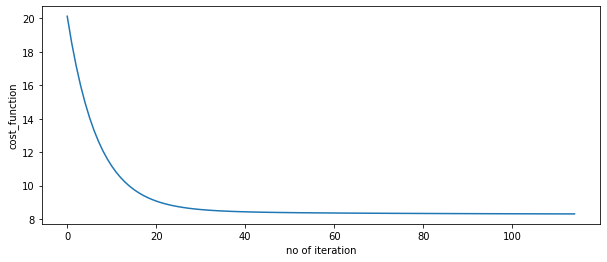

square_Error_value = 8.304081818616705, theta_0 = 23.4868,theta_1 = -10.092967215685182,theta_2 = 6.20112407911216,theta_3 = -5.948555245518767,theta_4 = 3.2675895012541654
theta_0_116 = 23.4868


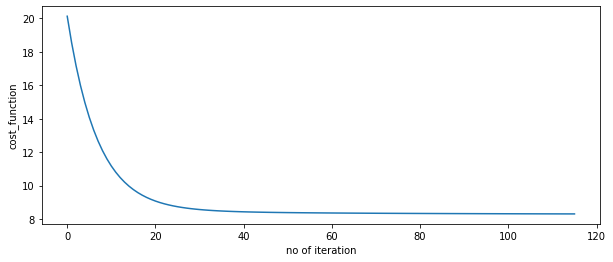

square_Error_value = 8.303546934159794, theta_0 = 23.4868,theta_1 = -10.097206701899642,theta_2 = 6.206798233702785,theta_3 = -5.960464493695683,theta_4 = 3.2761010462651727
theta_0_117 = 23.4868


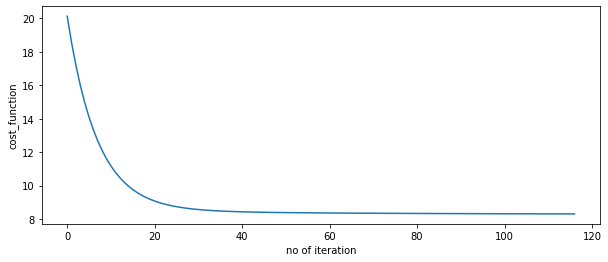

square_Error_value = 8.303022708800308, theta_0 = 23.4868,theta_1 = -10.100407593177497,theta_2 = 6.213392859650713,theta_3 = -5.971271649582898,theta_4 = 3.2855100703609708
theta_0_118 = 23.4868


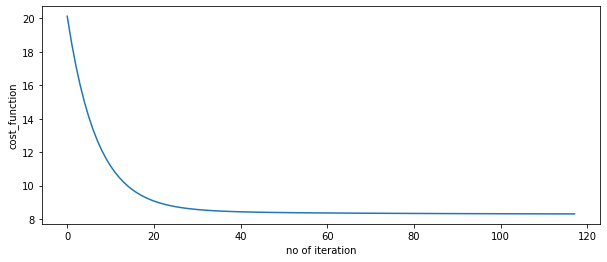

square_Error_value = 8.302508926660096, theta_0 = 23.4868,theta_1 = -10.104479982031991,theta_2 = 6.218993785129482,theta_3 = -5.9828952331071275,theta_4 = 3.293920488770108
theta_0_119 = 23.4868


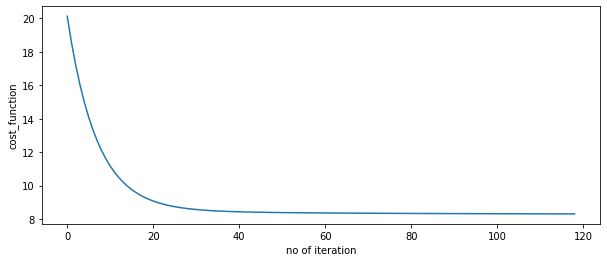

square_Error_value = 8.302005376397897, theta_0 = 23.4868,theta_1 = -10.107649888039145,theta_2 = 6.225381178149699,theta_3 = -5.9935544534321465,theta_4 = 3.3030960100732853
theta_0_120 = 23.4868


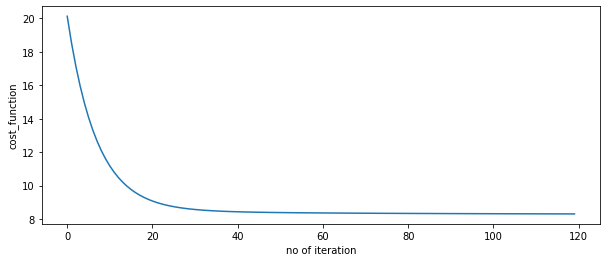

square_Error_value = 8.301511851092336, theta_0 = 23.4868,theta_1 = -10.111566844398913,theta_2 = 6.23090212756937,theta_3 = -6.00490618913371,theta_4 = 3.311399356666438
theta_0_121 = 23.4868


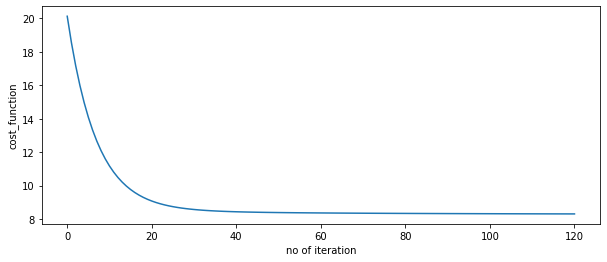

square_Error_value = 8.301028148130754, theta_0 = 23.4868,theta_1 = -10.114698975431827,theta_2 = 6.237093995709123,theta_3 = -6.01541275055367,theta_4 = 3.3203536913184104
theta_0_122 = 23.4868


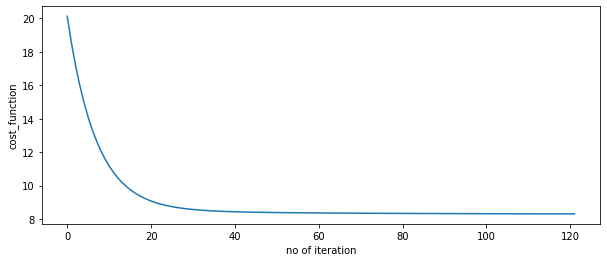

square_Error_value = 8.300554069103303, theta_0 = 23.4868,theta_1 = -10.118470805168636,theta_2 = 6.242529483338455,theta_3 = -6.026505071463011,theta_4 = 3.328545229152848
theta_0_123 = 23.4868


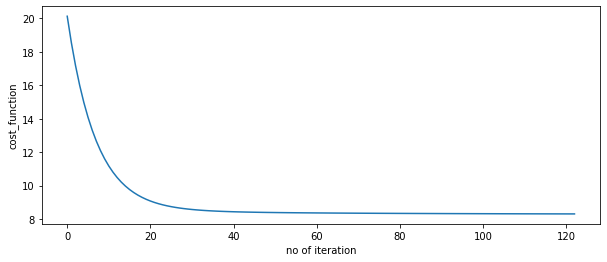

square_Error_value = 8.300089419701774, theta_0 = 23.4868,theta_1 = -10.121559528017048,theta_2 = 6.2485362744825,theta_3 = -6.0368553915391505,theta_4 = 3.3372894057595253
theta_0_124 = 23.4868


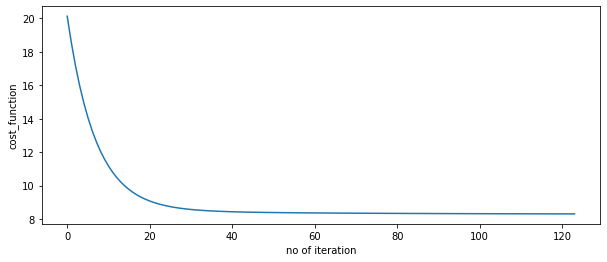

square_Error_value = 8.299634009622718, theta_0 = 23.4868,theta_1 = -10.125195358460495,theta_2 = 6.253881897088787,theta_3 = -6.047699525806909,theta_4 = 3.3453654329979763
theta_0_125 = 23.4868


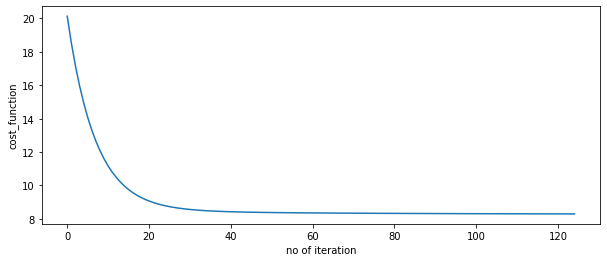

square_Error_value = 8.29918765247444, theta_0 = 23.4868,theta_1 = -10.128236033705859,theta_2 = 6.259712964318249,theta_3 = -6.057890997534904,theta_4 = 3.3539093601011576
theta_0_126 = 23.4868


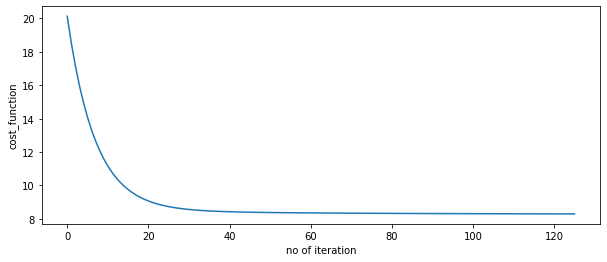

square_Error_value = 8.298750165687585, theta_0 = 23.4868,theta_1 = -10.1317439696054,theta_2 = 6.264965246940355,theta_3 = -6.068497123114921,theta_4 = 3.361867060676552
theta_0_127 = 23.4868


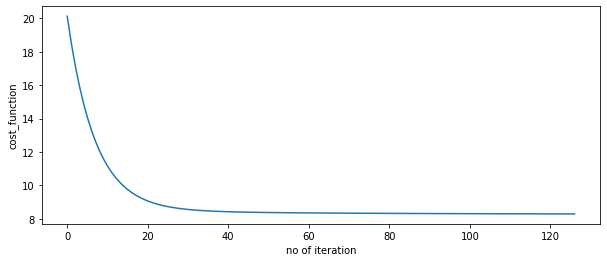

square_Error_value = 8.29832137042892, theta_0 = 23.4868,theta_1 = -10.134732811247497,theta_2 = 6.270628991435996,theta_3 = -6.078527972207501,theta_4 = 3.3702196715743065
theta_0_128 = 23.4868


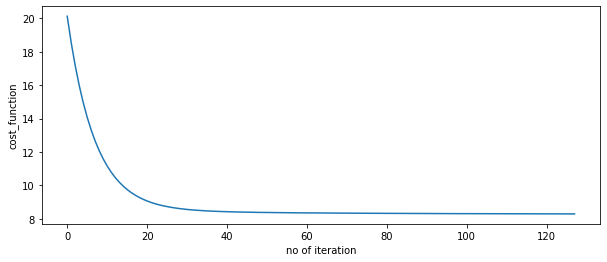

square_Error_value = 8.297901091518145, theta_0 = 23.4868,theta_1 = -10.138120069580271,theta_2 = 6.275785254307451,theta_3 = -6.088905350609173,theta_4 = 3.3780569864253955
theta_0_129 = 23.4868


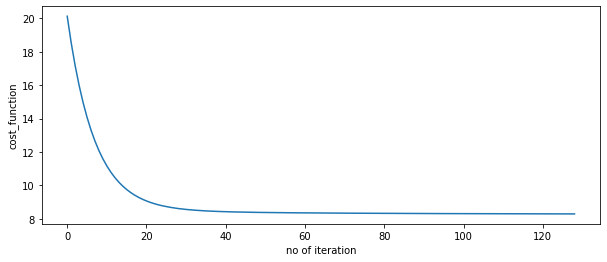

square_Error_value = 8.297489157347457, theta_0 = 23.4868,theta_1 = -10.141054023939443,theta_2 = 6.28128924886215,theta_3 = -6.098774512425686,theta_4 = 3.3862263644240516
theta_0_130 = 23.4868


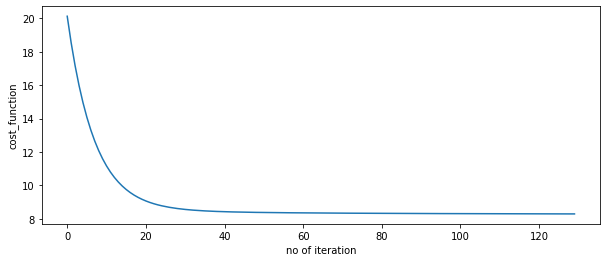

square_Error_value = 8.297085399803644, theta_0 = 23.4868,theta_1 = -10.144327050444419,theta_2 = 6.286347492599198,theta_3 = -6.1089316043904285,theta_4 = 3.393941880487528
theta_0_131 = 23.4868


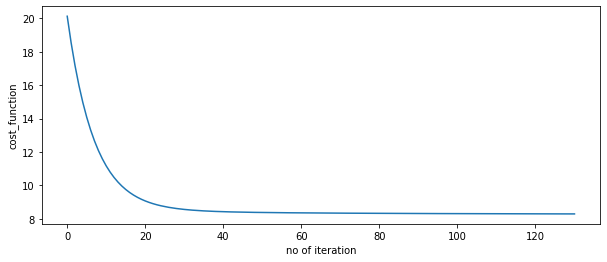

square_Error_value = 8.296689654192567, theta_0 = 23.4868,theta_1 = -10.14720369170388,theta_2 = 6.291698588385872,theta_3 = -6.118638617831434,theta_4 = 3.401935367247912
theta_0_132 = 23.4868


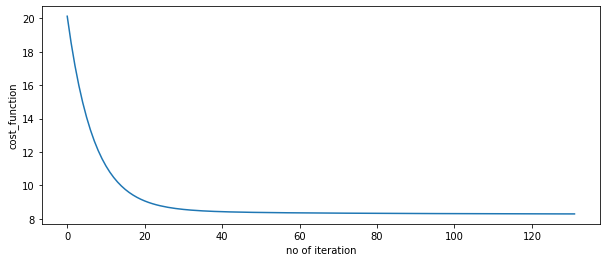

square_Error_value = 8.29630175916588, theta_0 = 23.4868,theta_1 = -10.150368261630382,theta_2 = 6.296657394948738,theta_3 = -6.1285831833982085,theta_4 = 3.409528221777256
theta_0_133 = 23.4868


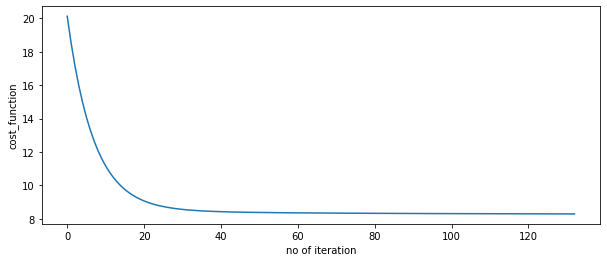

square_Error_value = 8.295921556649791, theta_0 = 23.4868,theta_1 = -10.153185701743132,theta_2 = 6.301861813828584,theta_3 = -6.1381280994488945,theta_4 = 3.417352511055069
theta_0_134 = 23.4868


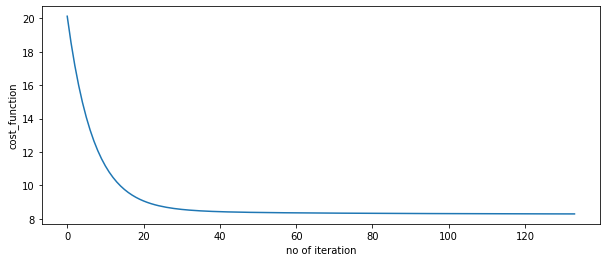

square_Error_value = 8.295548891775805, theta_0 = 23.4868,theta_1 = -10.15624700696271,theta_2 = 6.306720261103845,theta_3 = -6.147867284537227,theta_4 = 3.424822309168369
theta_0_135 = 23.4868


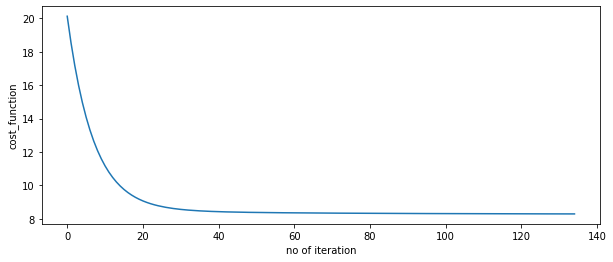

square_Error_value = 8.295183612813291, theta_0 = 23.4868,theta_1 = -10.159003817958457,theta_2 = 6.311783675447732,theta_3 = -6.157250587459237,theta_4 = 3.4324835279352826
theta_0_136 = 23.4868


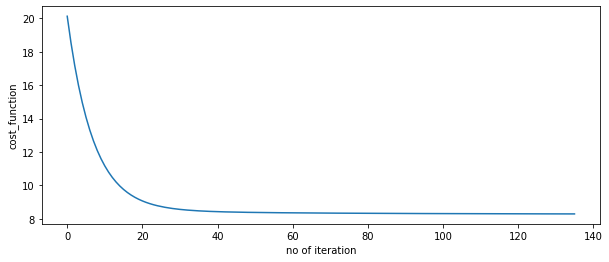

square_Error_value = 8.294825571103821, theta_0 = 23.4868,theta_1 = -10.16196654229627,theta_2 = 6.316541263593098,theta_3 = -6.1667909988075635,theta_4 = 3.439830271580975
theta_0_137 = 23.4868


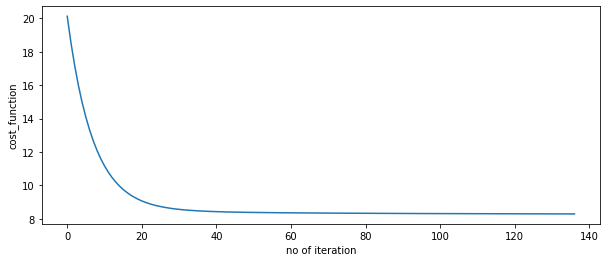

square_Error_value = 8.294474620997137, theta_0 = 23.4868,theta_1 = -10.164661689292197,theta_2 = 6.3214688653195354,theta_3 = -6.176013538251619,theta_4 = 3.447334050242406
theta_0_138 = 23.4868


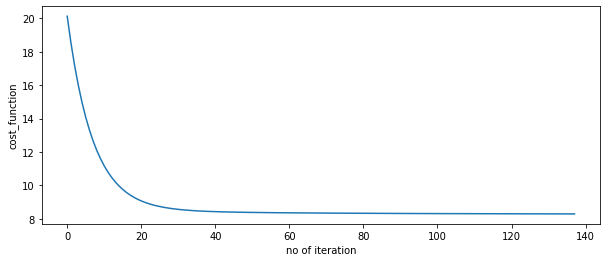

square_Error_value = 8.29413061978872, theta_0 = 23.4868,theta_1 = -10.16753007368116,theta_2 = 6.326125453265726,theta_3 = -6.185361308297851,theta_4 = 3.454558077019411
theta_0_139 = 23.4868


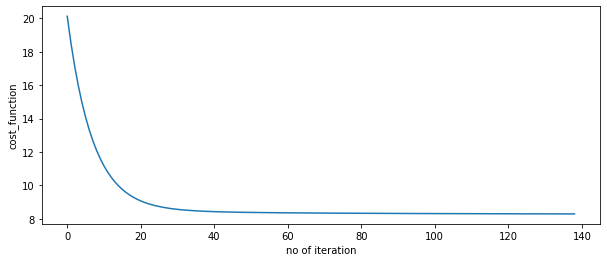

square_Error_value = 8.293793427658853, theta_0 = 23.4868,theta_1 = -10.170162857132132,theta_2 = 6.3309220135661795,theta_3 = -6.194424240845113,theta_4 = 3.4619096102112006
theta_0_140 = 23.4868


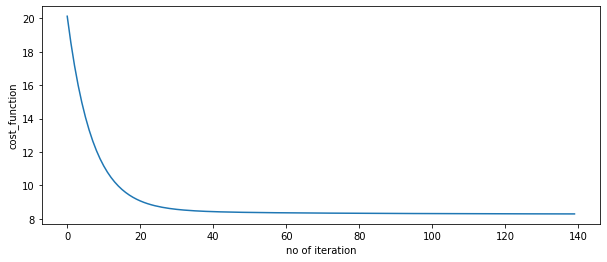

square_Error_value = 8.293462907613124, theta_0 = 23.4868,theta_1 = -10.17294075597465,theta_2 = 6.335477764289387,theta_3 = -6.203585083919701,theta_4 = 3.4690115406936175
theta_0_141 = 23.4868


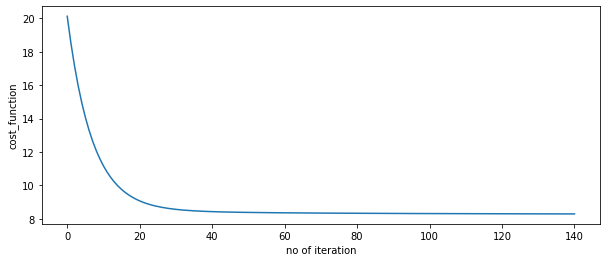

square_Error_value = 8.293138925424337, theta_0 = 23.4868,theta_1 = -10.17551076189854,theta_2 = 6.340147685310901,theta_3 = -6.212489822763284,theta_4 = 3.4762156399379744
theta_0_142 = 23.4868


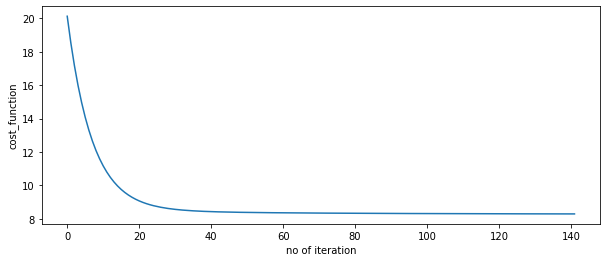

square_Error_value = 8.29282134957573, theta_0 = 23.4868,theta_1 = -10.178201691831969,theta_2 = 6.344603018678402,theta_3 = -6.221469083777946,theta_4 = 3.4831963323390243
theta_0_143 = 23.4868


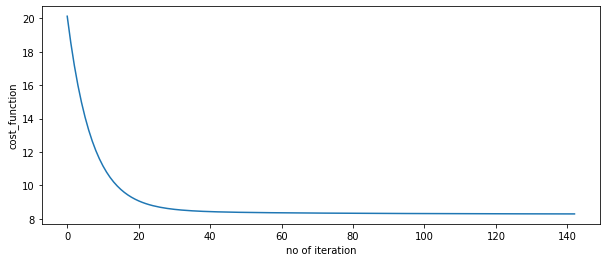

square_Error_value = 8.29251005120548, theta_0 = 23.4868,theta_1 = -10.180708748918594,theta_2 = 6.349150378260013,theta_3 = -6.230217255431698,theta_4 = 3.490257471665685
theta_0_144 = 23.4868


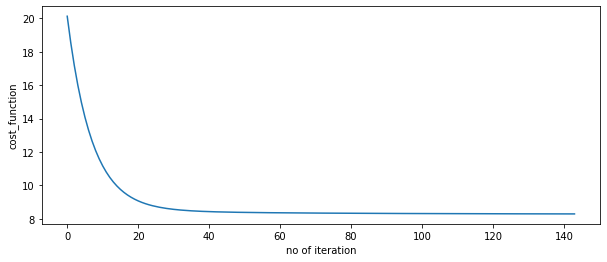

square_Error_value = 8.292204904052468, theta_0 = 23.4868,theta_1 = -10.183315931017608,theta_2 = 6.353505930414668,theta_3 = -6.2390199520854805,theta_4 = 3.497117982834893
theta_0_145 = 23.4868


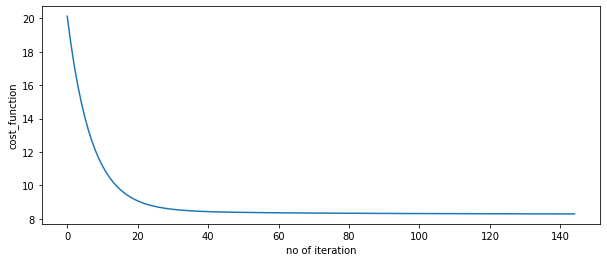

square_Error_value = 8.291905784403188, theta_0 = 23.4868,theta_1 = -10.185760073678885,theta_2 = 6.357934520824389,theta_3 = -6.247613359158929,theta_4 = 3.504040338322866
theta_0_146 = 23.4868


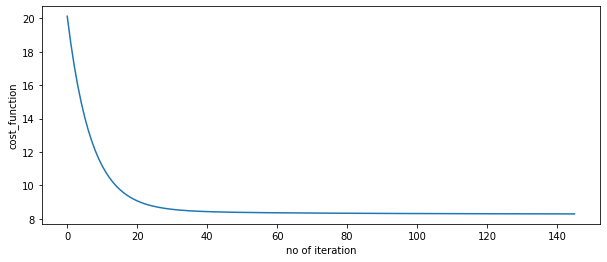

square_Error_value = 8.291612571039892, theta_0 = 23.4868,theta_1 = -10.18828646998722,theta_2 = 6.362191109214822,theta_3 = -6.256244218543783,theta_4 = 3.510781890207998
theta_0_147 = 23.4868


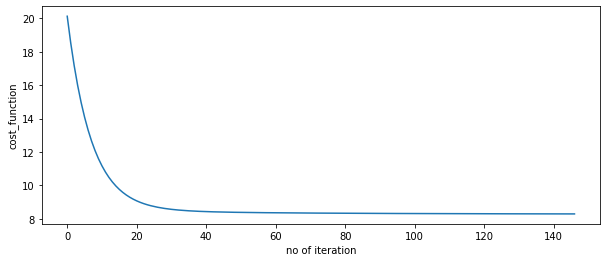

square_Error_value = 8.29132514518979, theta_0 = 23.4868,theta_1 = -10.190667906534985,theta_2 = 6.3665044707046645,theta_3 = -6.264684807753204,theta_4 = 3.5175693742731586
theta_0_148 = 23.4868


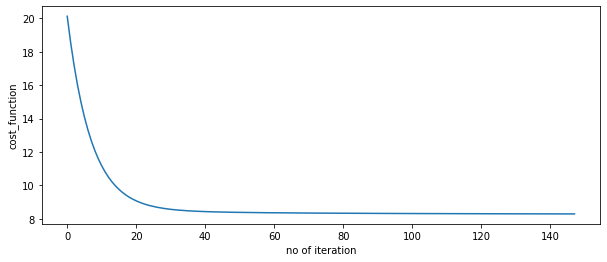

square_Error_value = 8.291043390475362, theta_0 = 23.4868,theta_1 = -10.193116251697406,theta_2 = 6.370663063989642,theta_3 = -6.273148298120834,theta_4 = 3.524193325097188
theta_0_149 = 23.4868


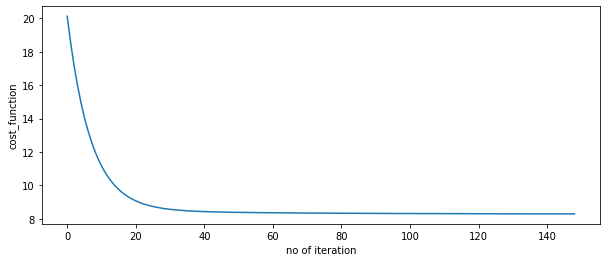

square_Error_value = 8.290767192865752, theta_0 = 23.4868,theta_1 = -10.195435336946503,theta_2 = 6.374864513874524,theta_3 = -6.2814381328196,theta_4 = 3.5308496162386174
theta_0_150 = 23.4868


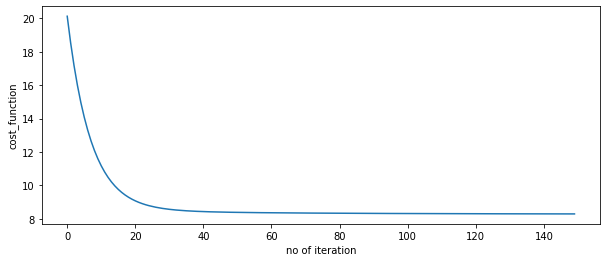

square_Error_value = 8.290496440629155, theta_0 = 23.4868,theta_1 = -10.1978081656069,theta_2 = 6.378926206035255,theta_3 = -6.289738491167367,theta_4 = 3.5373574357445094
theta_0_151 = 23.4868


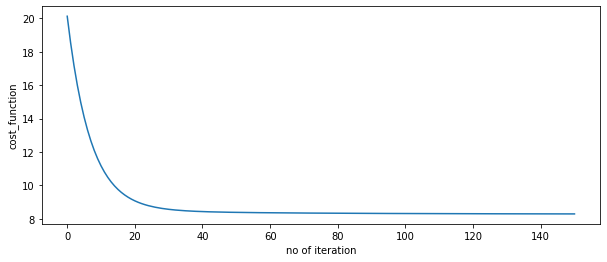

square_Error_value = 8.29023102428623, theta_0 = 23.4868,theta_1 = -10.20006537729719,theta_2 = 6.383018863905254,theta_3 = -6.2978797277765075,theta_4 = 3.543886004365428
theta_0_152 = 23.4868


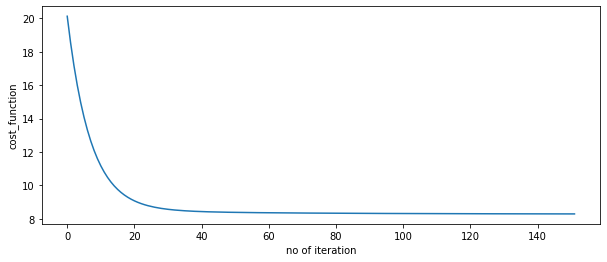

square_Error_value = 8.28997083656447, theta_0 = 23.4868,theta_1 = -10.202365047837976,theta_2 = 6.386984851990158,theta_3 = -6.306020983820385,theta_4 = 3.550279252570031
theta_0_153 = 23.4868


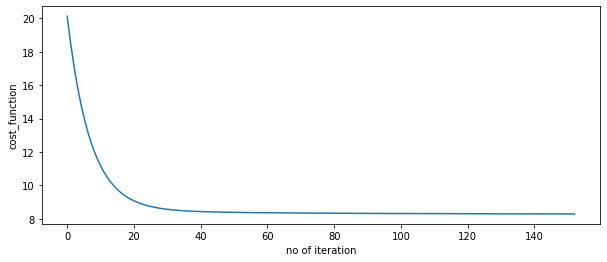

square_Error_value = 8.289715772353553, theta_0 = 23.4868,theta_1 = -10.204560966351758,theta_2 = 6.390971661582338,theta_3 = -6.314015851624729,theta_4 = 3.5566833834053293
theta_0_154 = 23.4868


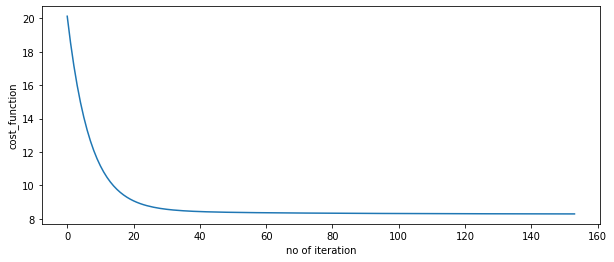

square_Error_value = 8.289465728661593, theta_0 = 23.4868,theta_1 = -10.206789681471426,theta_2 = 6.394843226587293,theta_3 = -6.322001848649786,theta_4 = 3.5629636923801
theta_0_155 = 23.4868


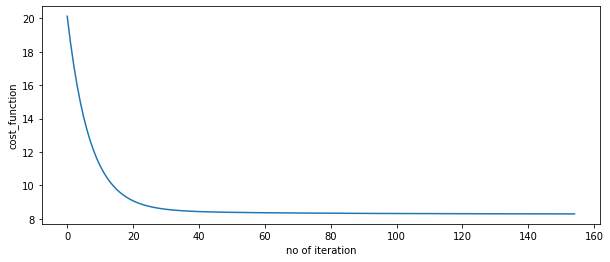

square_Error_value = 8.289220604572296, theta_0 = 23.4868,theta_1 = -10.208924972394389,theta_2 = 6.398726974771497,theta_3 = -6.329852632497979,theta_4 = 3.5692465039900716
theta_0_156 = 23.4868


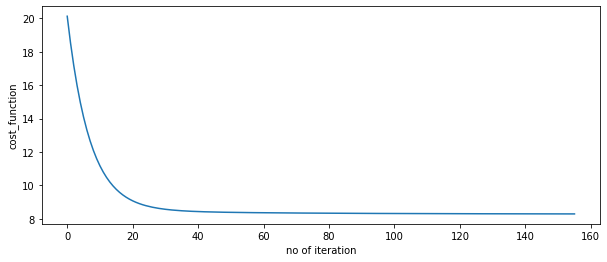

square_Error_value = 8.288980301203033, theta_0 = 23.4868,theta_1 = -10.211084796952422,theta_2 = 6.402505465226332,theta_3 = -6.337687045509922,theta_4 = 3.575415562252308
theta_0_157 = 23.4868


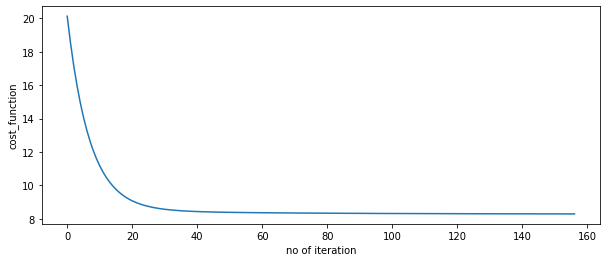

square_Error_value = 8.288744721663722, theta_0 = 23.4868,theta_1 = -10.213160196087964,theta_2 = 6.406288798497279,theta_3 = -6.345396071019613,theta_4 = 3.5815800239796207
theta_0_158 = 23.4868


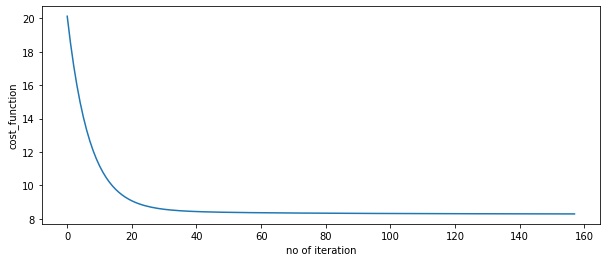

square_Error_value = 8.288513771016614, theta_0 = 23.4868,theta_1 = -10.21525307258787,theta_2 = 6.409975616387817,theta_3 = -6.35308242256314,theta_4 = 3.5876395631348545
theta_0_159 = 23.4868


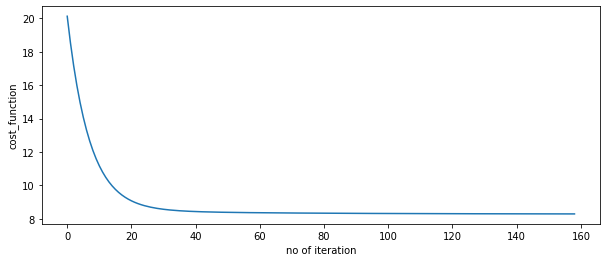

square_Error_value = 8.288287356236852, theta_0 = 23.4868,theta_1 = -10.21726937308803,theta_2 = 6.413661055202274,theta_3 = -6.360652043487006,theta_4 = 3.593688509867794
theta_0_160 = 23.4868


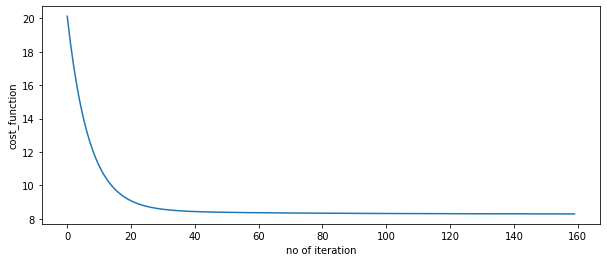

square_Error_value = 8.288065386173857, theta_0 = 23.4868,theta_1 = -10.219297135118756,theta_2 = 6.4172576439077735,theta_3 = -6.368193717446807,theta_4 = 3.599640293193152
theta_0_161 = 23.4868


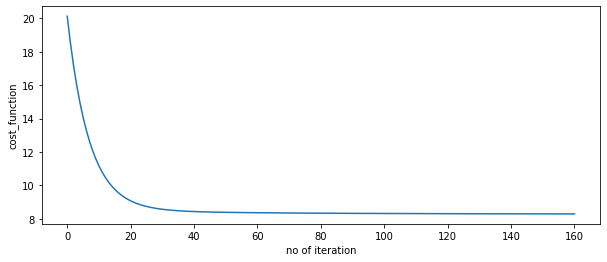

square_Error_value = 8.287847771513526, theta_0 = 23.4868,theta_1 = -10.221255176441007,theta_2 = 6.420847595159342,theta_3 = -6.375626304902086,theta_4 = 3.605576438231481
theta_0_162 = 23.4868


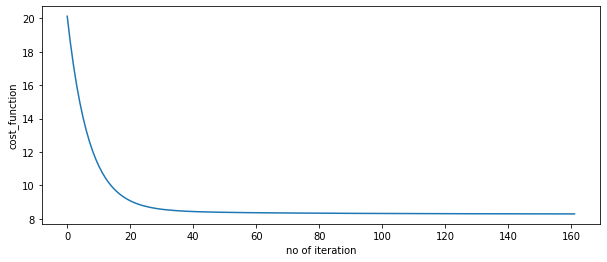

square_Error_value = 8.287634424741144, theta_0 = 23.4868,theta_1 = -10.223219560353433,theta_2 = 6.424355429128828,theta_3 = -6.383026558559251,theta_4 = 3.6114222509322773
theta_0_163 = 23.4868


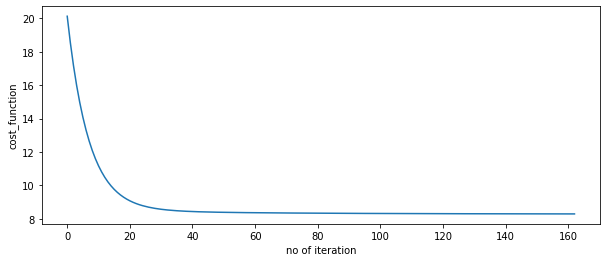

square_Error_value = 8.287425260105096, theta_0 = 23.4868,theta_1 = -10.225120218792398,theta_2 = 6.427852197012928,theta_3 = -6.390324491864033,theta_4 = 3.61724819721176
theta_0_164 = 23.4868


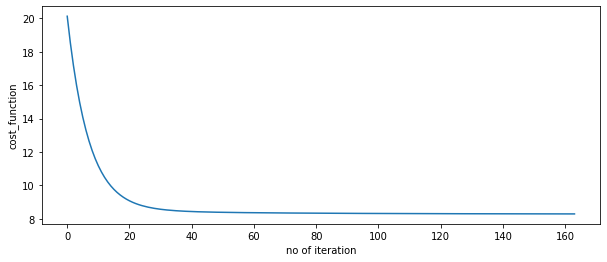

square_Error_value = 8.287220193581314, theta_0 = 23.4868,theta_1 = -10.227022873849908,theta_2 = 6.431272772941658,theta_3 = -6.3975864664434035,theta_4 = 3.622989838120246
theta_0_165 = 23.4868


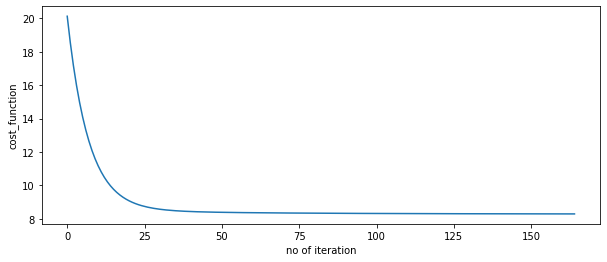

square_Error_value = 8.287019142838416, theta_0 = 23.4868,theta_1 = -10.228867054427338,theta_2 = 6.434678568428839,theta_3 = -6.404752125337954,theta_4 = 3.6287080880170453
theta_0_166 = 23.4868


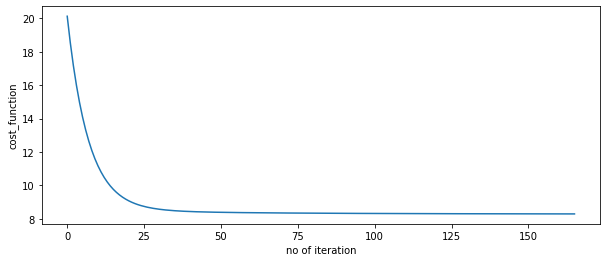

square_Error_value = 8.286822027203582, theta_0 = 23.4868,theta_1 = -10.230709551636977,theta_2 = 6.438013397728668,theta_3 = -6.411878855249854,theta_4 = 3.634347362533857
theta_0_167 = 23.4868


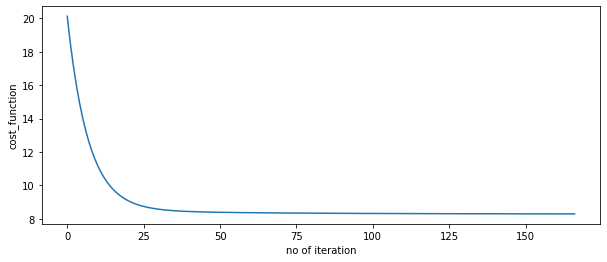

square_Error_value = 8.286628767629118, theta_0 = 23.4868,theta_1 = -10.232498181163006,theta_2 = 6.4413303468345795,theta_3 = -6.418914613311541,theta_4 = 3.639960326439957
theta_0_168 = 23.4868


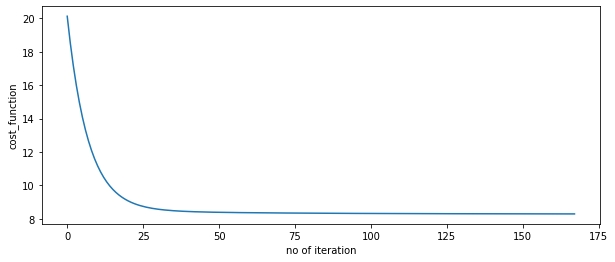

square_Error_value = 8.28643928665967, theta_0 = 23.4868,theta_1 = -10.234282020965596,theta_2 = 6.444580949220153,theta_3 = -6.425909034263574,theta_4 = 3.6454990405461323
theta_0_169 = 23.4868


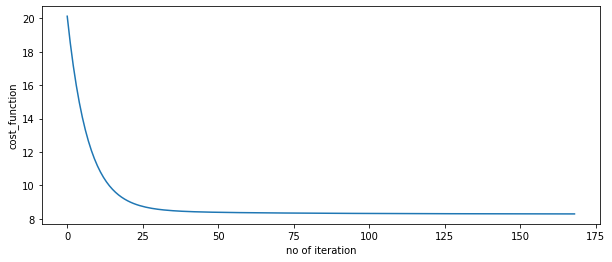

square_Error_value = 8.28625350840014, theta_0 = 23.4868,theta_1 = -10.236016042109854,theta_2 = 6.447811100234838,theta_3 = -6.432817253350094,theta_4 = 3.6510090443809347
theta_0_170 = 23.4868


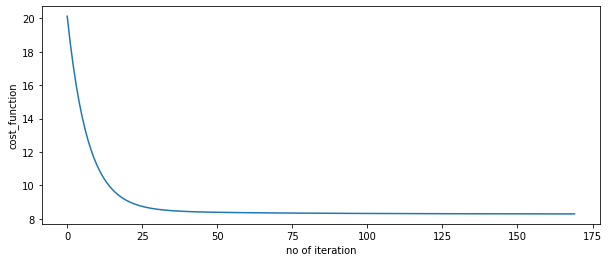

square_Error_value = 8.286071358484227, theta_0 = 23.4868,theta_1 = -10.237742661083205,theta_2 = 6.45097899827183,theta_3 = -6.439682209480741,theta_4 = 3.6564489995719494
theta_0_171 = 23.4868


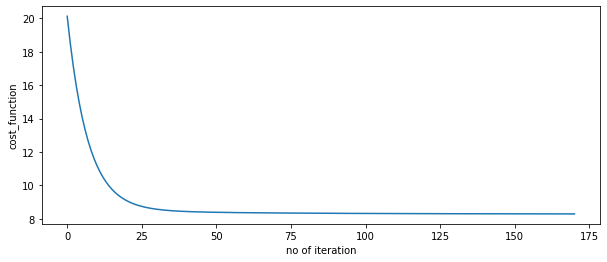

square_Error_value = 8.285892764043608, theta_0 = 23.4868,theta_1 = -10.239423027316478,theta_2 = 6.454124328088793,theta_3 = -6.446465235058907,theta_4 = 3.661858291372763
theta_0_172 = 23.4868


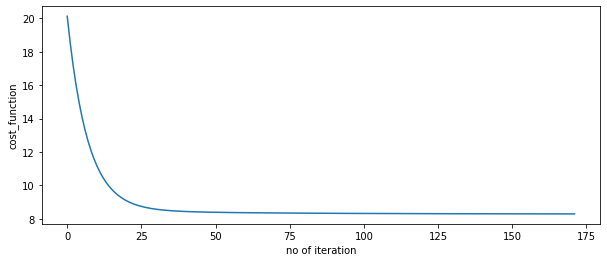

square_Error_value = 8.285717653677743, theta_0 = 23.4868,theta_1 = -10.241093804024826,theta_2 = 6.457211042571381,theta_3 = -6.453203485223989,theta_4 = 3.667201280386386
theta_0_173 = 23.4868


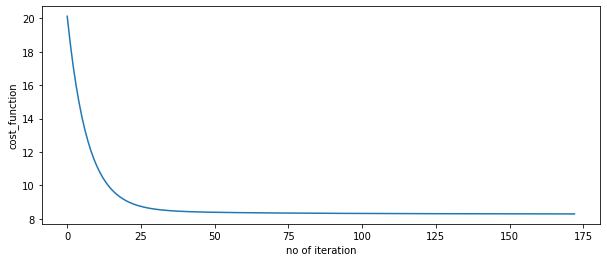

square_Error_value = 8.2855459574243, theta_0 = 23.4868,theta_1 = -10.242721475311004,theta_2 = 6.460273462237718,theta_3 = -6.459863642460888,theta_4 = 3.6725120361011236
theta_0_174 = 23.4868


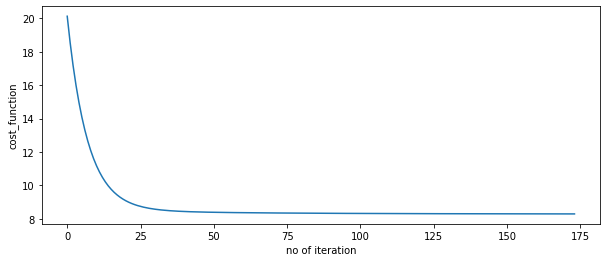

square_Error_value = 8.285377606730162, theta_0 = 23.4868,theta_1 = -10.244337735415748,theta_2 = 6.463280508280638,theta_3 = -6.466477865786098,theta_4 = 3.6777598393284663
theta_0_175 = 23.4868


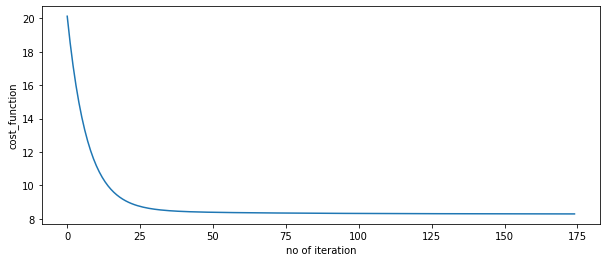

square_Error_value = 8.285212534423026, theta_0 = 23.4868,theta_1 = -10.245913674550263,theta_2 = 6.4662618678729995,theta_3 = -6.473017456296195,theta_4 = 3.6829741679171404
theta_0_176 = 23.4868


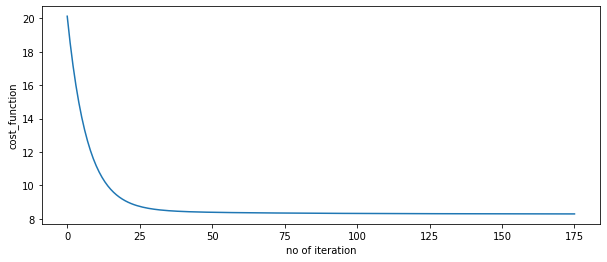

square_Error_value = 8.285050674683564, theta_0 = 23.4868,theta_1 = -10.247476695281383,theta_2 = 6.469190751619137,theta_3 = -6.479510257093493,theta_4 = 3.6881285504014367
theta_0_177 = 23.4868


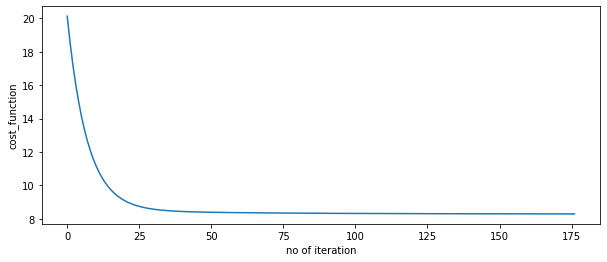

square_Error_value = 8.284891963018195, theta_0 = 23.4868,theta_1 = -10.249001864786594,theta_2 = 6.472092844535975,theta_3 = -6.485931556249874,theta_4 = 3.6932484983385443
theta_0_178 = 23.4868


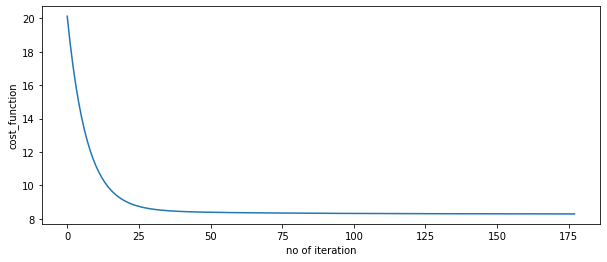

square_Error_value = 8.28473633623232, theta_0 = 23.4868,theta_1 = -10.250512878860658,theta_2 = 6.474945060394023,theta_3 = -6.4923054683822095,theta_4 = 3.6983112072793136
theta_0_179 = 23.4868


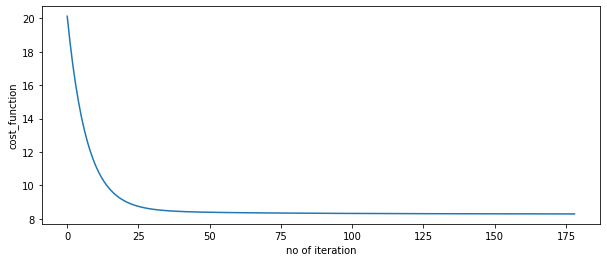

square_Error_value = 8.284583732404183, theta_0 = 23.4868,theta_1 = -10.251988238360834,theta_2 = 6.477769627142283,theta_3 = -6.49861072311268,theta_4 = 3.703338762536731
theta_0_180 = 23.4868


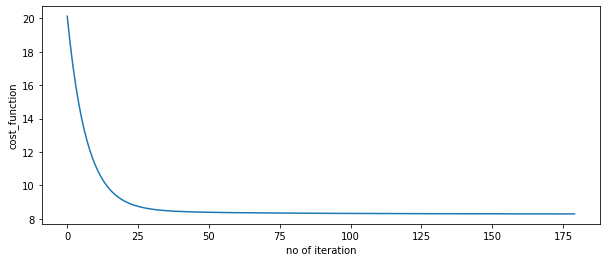

square_Error_value = 8.284434090859195, theta_0 = 23.4868,theta_1 = -10.253448437419783,theta_2 = 6.480546655480627,theta_3 = -6.504868213880046,theta_4 = 3.708311525228251
theta_0_181 = 23.4868


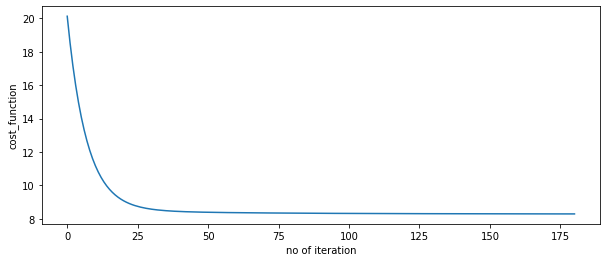

square_Error_value = 8.284287352144833, theta_0 = 23.4868,theta_1 = -10.254874941429025,theta_2 = 6.483295387024356,theta_3 = -6.511059640879657,theta_4 = 3.7132486208074362
theta_0_182 = 23.4868


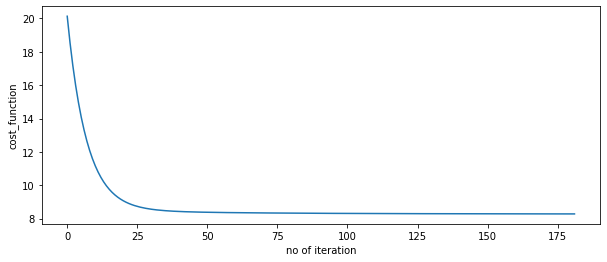

square_Error_value = 8.28414345800598, theta_0 = 23.4868,theta_1 = -10.256285479063909,theta_2 = 6.485998692257463,theta_3 = -6.5172031144895035,theta_4 = 3.718133142950238
theta_0_183 = 23.4868


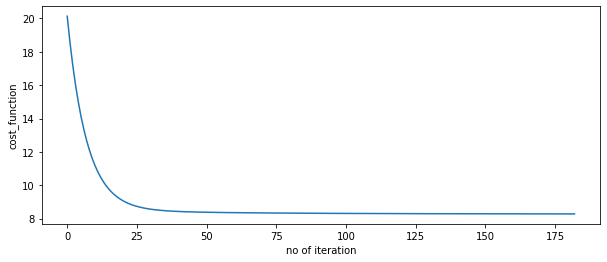

square_Error_value = 8.284002351360826, theta_0 = 23.4868,theta_1 = -10.257664075129393,theta_2 = 6.4886732329866454,theta_3 = -6.523282898790443,theta_4 = 3.7229816600232355
theta_0_184 = 23.4868


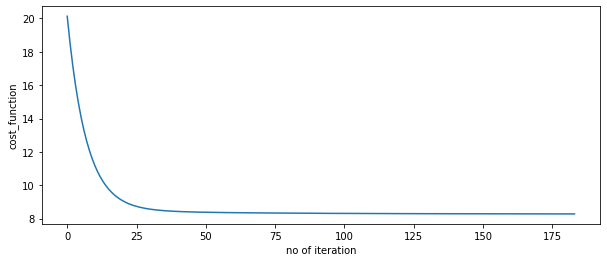

square_Error_value = 8.283863976277212, theta_0 = 23.4868,theta_1 = -10.259026069544456,theta_2 = 6.491304261998948,theta_3 = -6.5293146994669655,theta_4 = 3.7277796243557373
theta_0_185 = 23.4868


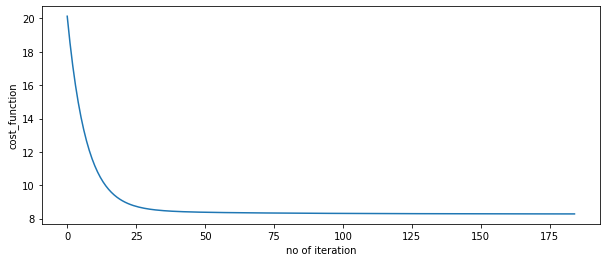

square_Error_value = 8.28372827794947, theta_0 = 23.4868,theta_1 = -10.260357696695358,theta_2 = 6.493906212368924,theta_3 = -6.535284993314864,theta_4 = 3.732541395066394
theta_0_186 = 23.4868


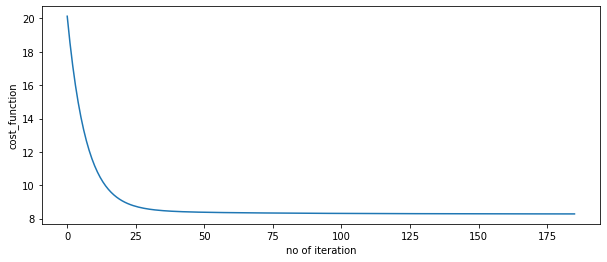

square_Error_value = 8.283595202675722, theta_0 = 23.4868,theta_1 = -10.261672233060372,theta_2 = 6.496466393228679,theta_3 = -6.541207408094241,theta_4 = 3.737254460271064
theta_0_187 = 23.4868


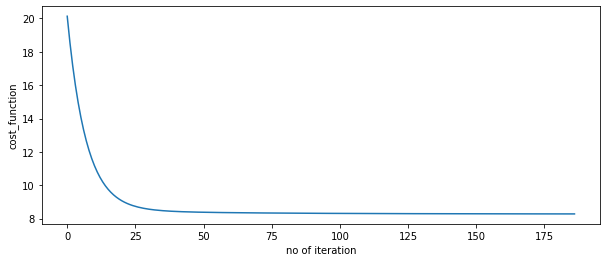

square_Error_value = 8.28346469783564, theta_0 = 23.4868,theta_1 = -10.26295782051961,theta_2 = 6.498997312113657,theta_3 = -6.547070330086907,theta_4 = 3.7419312702409275
theta_0_188 = 23.4868


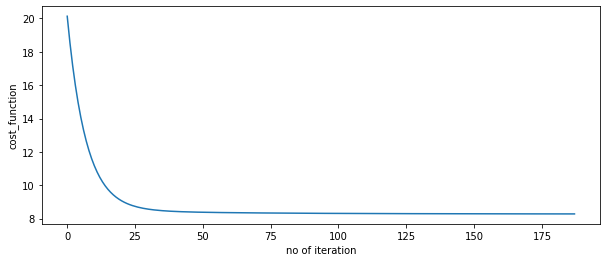

square_Error_value = 8.283336711868658, theta_0 = 23.4868,theta_1 = -10.264225953051872,theta_2 = 6.501488053035805,theta_3 = -6.552885591339186,theta_4 = 3.7465610700856486
theta_0_189 = 23.4868


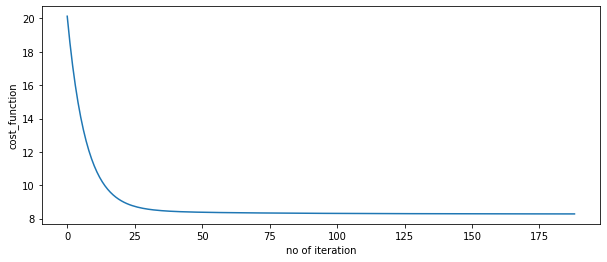

square_Error_value = 8.283211194252612, theta_0 = 23.4868,theta_1 = -10.265466419173666,theta_2 = 6.503949459834057,theta_3 = -6.5586432257898295,theta_4 = 3.7511546606629906
theta_0_190 = 23.4868


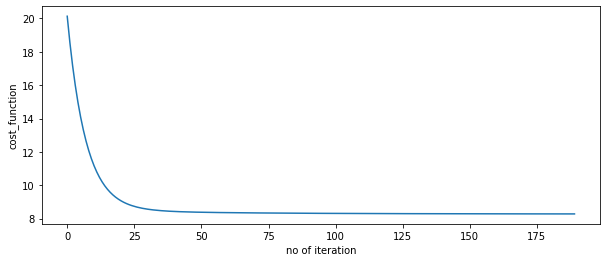

square_Error_value = 8.283088095482828, theta_0 = 23.4868,theta_1 = -10.266689172985442,theta_2 = 6.506372148356693,theta_3 = -6.564353513502647,theta_4 = 3.755702803343708
theta_0_191 = 23.4868


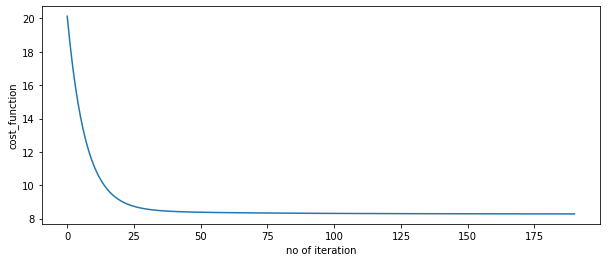

square_Error_value = 8.28296736705161, theta_0 = 23.4868,theta_1 = -10.267885424386835,theta_2 = 6.508765524879912,theta_3 = -6.5700079099948665,theta_4 = 3.7602148736289167
theta_0_192 = 23.4868


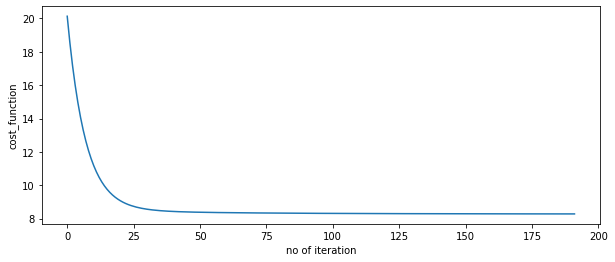

square_Error_value = 8.282848961428156, theta_0 = 23.4868,theta_1 = -10.269063797129164,theta_2 = 6.511121527223831,theta_3 = -6.57561535384941,theta_4 = 3.7646829412843283
theta_0_193 = 23.4868


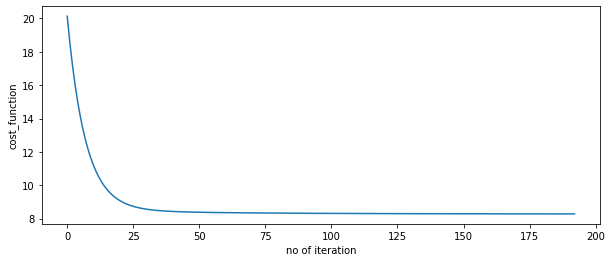

square_Error_value = 8.282732832038885, theta_0 = 23.4868,theta_1 = -10.270216727987938,theta_2 = 6.513448319398727,theta_3 = -6.581168526955716,theta_4 = 3.769115149960434
theta_0_194 = 23.4868


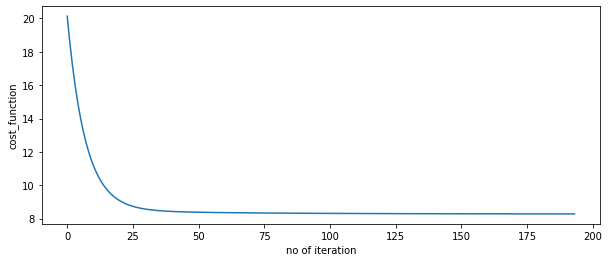

square_Error_value = 8.282618933248138, theta_0 = 23.4868,theta_1 = -10.27135169131757,theta_2 = 6.515738979983691,theta_3 = -6.586675208221241,theta_4 = 3.773504698333519
theta_0_195 = 23.4868


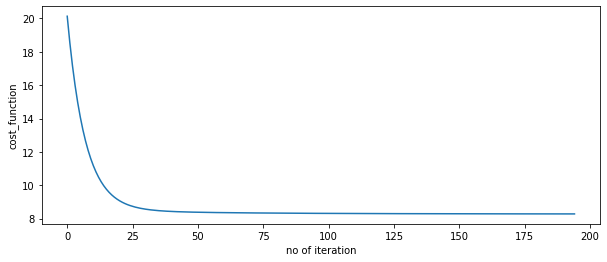

square_Error_value = 8.282507220339276, theta_0 = 23.4868,theta_1 = -10.272462182812868,theta_2 = 6.51800059939008,theta_3 = -6.592129137360775,theta_4 = 3.7778586653267276
theta_0_196 = 23.4868


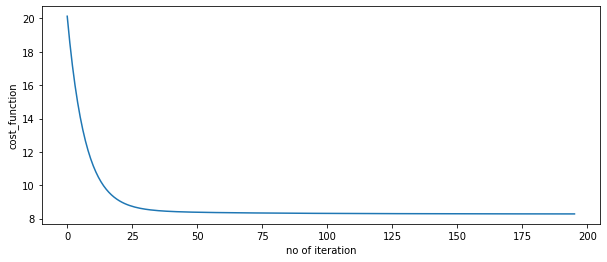

square_Error_value = 8.282397649496188, theta_0 = 23.4868,theta_1 = -10.273554683705436,theta_2 = 6.520227240485087,theta_3 = -6.597537090630414,theta_4 = 3.7821712235513867
theta_0_197 = 23.4868


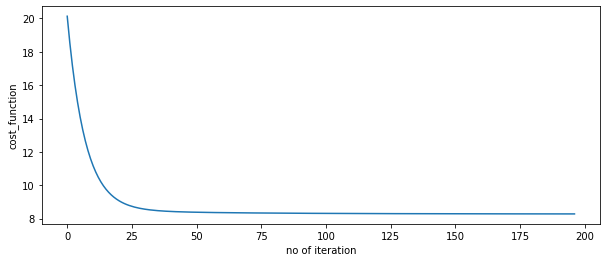

square_Error_value = 8.282290177785121, theta_0 = 23.4868,theta_1 = -10.274623603580595,theta_2 = 6.522425065751445,theta_3 = -6.602893720044875,theta_4 = 3.786448531543151
theta_0_198 = 23.4868


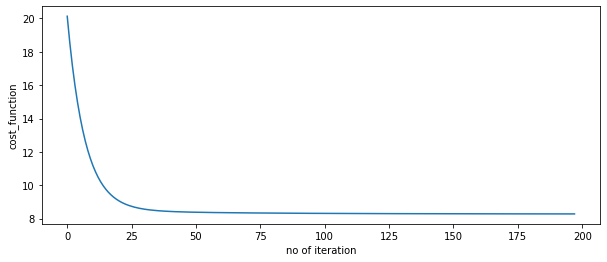

square_Error_value = 8.282184763136923, theta_0 = 23.4868,theta_1 = -10.275674565510021,theta_2 = 6.524588987239384,theta_3 = -6.608204934832431,theta_4 = 3.7906856020372417
theta_0_199 = 23.4868


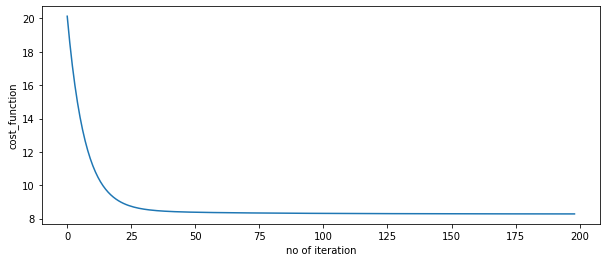

square_Error_value = 8.282081364329603, theta_0 = 23.4868,theta_1 = -10.27670276773999,theta_2 = 6.526724365314005,theta_3 = -6.613466173662139,theta_4 = 3.794887797846493
The square error for testing data set = 8.282081364329603
The error for testing data set = 2.877860553315536


In [23]:
#Training the model
for i in iteration_no:
  h_fun2 = theta_0 + theta_1*norm_training_set_x_f1+theta_2*norm_training_set_x_f2+theta_3*norm_training_set_x_f3+theta_4*norm_training_set_x_f4
  j = 0.5*np.mean(np.square(h_fun2-training_set_y))
  j_hist1.append(j)
  theta_0 = theta_0 - alpha*np.mean(h_fun2-training_set_y)
  theta_1 = theta_1 - alpha*np.mean(((h_fun2-training_set_y)*norm_training_set_x_f1))
  theta_2 = theta_2 - alpha*np.mean(((h_fun2-training_set_y)*norm_training_set_x_f2))
  theta_3 = theta_3 - alpha*np.mean(((h_fun2-training_set_y)*norm_training_set_x_f3))
  theta_4 = theta_4 - alpha*np.mean(((h_fun2-training_set_y)*norm_training_set_x_f4))
  print(f"theta_0_{i} = {theta_0}")

  
  fig,ax = plt.subplots(1,1,figsize=(10,4))
  
  ax.plot(j_hist1[:])
  ax.set_xlabel("no of iteration")
  ax.set_ylabel("cost_function")

  #ax[1].scatter(norm_training_set_x_f1,training_set_y)
  #ax[1].set_ylabel("mpg")
  #ax[2].scatter(norm_training_set_x_f3,training_set_y)
  #ax[2].set_ylabel("mpg")
  #x_f1_r = np.arange(np.min(training_set_x_f1),np.max(training_set_x_f1),0.1)
  #x_f3_r = np.arange(np.min(training_set_x_f3),np.max(training_set_x_f3),0.1)
  
  #x_f1_r2 = np.square(x_f1_r)
  #x_f3_r2 = np.square(x_f3_r)
  #x_f1_r_mu = np.mean(x_f1_r); x_f1_r_std = np.std(x_f1_r)
  #x_f3_r_mu = np.mean(x_f3_r); x_f3_r_std = np.std(x_f3_r)
  #x_f1_r2_mu = np.mean(x_f1_r2); x_f1_r2_std = np.std(x_f1_r2)
  #x_f3_r2_mu = np.mean(x_f3_r2); x_f3_r2_std = np.std(x_f3_r2)
  #x_f1_r = (x_f1_r-x_f1_r_mu)/x_f1_r_std
  #x_f1_r2 = (x_f1_r2-x_f1_r2_mu)/x_f1_r2_std
  #x_f3_r = (x_f3_r-x_f3_r_mu)/x_f3_r_std
  #x_f3_r2 = (x_f3_r2-x_f3_r2_mu)/x_f3_r2_std
  #x_f1_r=x_f1_r[:3850]
  #x_f1_r2=x_f1_r2[:3850]

  #ax[1].plot(x_f1_r,(theta_0 + theta_1*x_f1_r+theta_2*x_f1_r2+theta_3*x_f3_r+theta_4*x_f3_r2),c="r",label="prdection line")
  #ax[2].plot(x_f3_r,(theta_0 + theta_1*x_f1_r+theta_2*x_f1_r2+theta_3*x_f3_r+theta_4*x_f3_r2),c="r",label="prdection line")

  plt.show()
  print(f"square_Error_value = {j}, theta_0 = {theta_0},theta_1 = {theta_1},theta_2 = {theta_2},theta_3 = {theta_3},theta_4 = {theta_4}")

print(f"The square error for training data set = {j}")
print(f"The error for training data set = {np.sqrt(j)}")

  







The square error for testing data set = 8.768123087203136
The error for testing data set = 2.9611016678262057


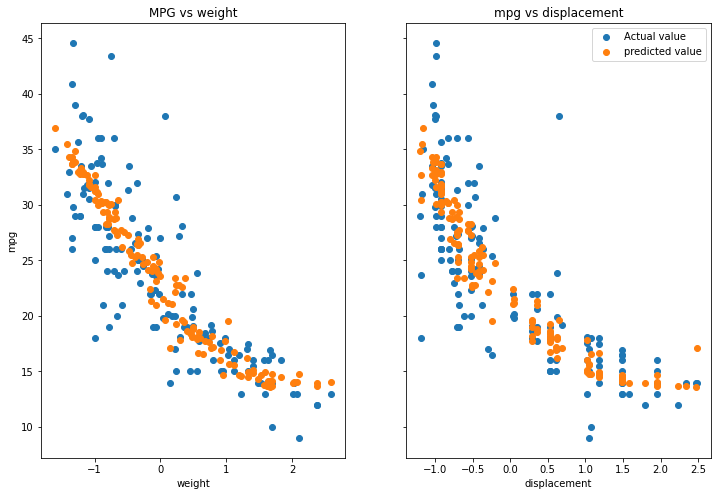

148
148
148


In [24]:
#testing our model
new_theta_0 = 23.78
new_theta_1 = -12.149323765452024
new_theta_2 = 8.491646736084842
new_theta_3 = -6.504110745202031
new_theta_4 = 3.49117844202135

testing_set_x_f3 = testing_set_x["displacement"]
testing_set_x_f4 = np.square(testing_set_x["displacement"])
testing_set_x_f1_mu = np.mean(training_set_x_f1)
testing_set_x_f2_mu =np.mean(training_set_x_f2)
testing_set_x_f1_std = np.std(training_set_x_f1)
testing_set_x_f2_std =np.std(training_set_x_f2)
testing_set_x_f3_mu = np.mean(training_set_x_f3)
testing_set_x_f4_mu =np.mean(training_set_x_f4)
testing_set_x_f3_std = np.std(training_set_x_f3)
testing_set_x_f4_std =np.std(training_set_x_f4)

norm_testing_set_x_f1 = (testing_set_x_f1 - testing_set_x_f1_mu)/testing_set_x_f1_std
norm_testing_set_x_f2 = (testing_set_x_f2-testing_set_x_f2_mu)/testing_set_x_f2_std
norm_testing_set_x_f3 = (testing_set_x_f3 - testing_set_x_f3_mu)/testing_set_x_f3_std
norm_testing_set_x_f4 = (testing_set_x_f4 - testing_set_x_f4_mu)/testing_set_x_f4_std
h_fun3 = new_theta_0 + new_theta_1*norm_testing_set_x_f1+ new_theta_2*norm_testing_set_x_f2+ new_theta_3*norm_testing_set_x_f3+ new_theta_4*norm_testing_set_x_f4
j_1 = 0.5*np.mean(np.square(h_fun3-testing_set_y))
print(f"The square error for testing data set = {j_1}")
print(f"The error for testing data set = {np.sqrt(j_1)}")
fig,ax = plt.subplots(1,2,figsize=(12,8),sharey = True)
ax[0].scatter(norm_testing_set_x_f1,testing_set_y,label="Actual value")
ax[0].scatter(norm_testing_set_x_f1,h_fun3,label="predicted value")
ax[0].set(title="MPG vs weight",xlabel="weight",ylabel="mpg")
ax[1].scatter(norm_testing_set_x_f3,testing_set_y,label="Actual value")
ax[1].scatter(norm_testing_set_x_f3,h_fun3,label="predicted value")
ax[1].set(title="mpg vs displacement",xlabel="displacement")
plt.legend()
plt.show()
print(len(norm_testing_set_x_f1))
print(len(h_fun3))
print(len(testing_set_y))

#Assignment(0.5)

In [25]:
# MAking MODEL = 3
#without using hand coding. Making use of Scikit learn libraries
# first making dataframe using pandas libariries

X_Train = pd.DataFrame()
X_Train["weight"]= training_set_x["weight"]
X_Train["weight square"] = np.square(training_set["weight"])
X_Train["displacement"] = training_set["displacement"]
X_Train["displacement square"] = np.square(training_set["displacement"])

X_Test =pd.DataFrame()
X_Test["weight"]= testing_set_x["weight"]
X_Test["weight square"] = np.square(testing_set["weight"])
X_Test["displacement"] = testing_set["displacement"]
X_Test["displacement square"] = np.square(testing_set["displacement"])


In [26]:
X_Train

weight  weight square  displacement  displacement square
315    3003        9018009         151.0              22801.0
123    2807        7879249         156.0              24336.0
292    3940       15523600         360.0             129600.0
172    2223        4941729          90.0               8100.0
294    1975        3900625          86.0               7396.0
..      ...            ...           ...                  ...
109    2401        5764801         140.0              19600.0
225    3520       12390400         250.0              62500.0
148    2246        5044516         116.0              13456.0
288    3830       14668900         318.0             101124.0
78     2979        8874441         120.0              14400.0

[250 rows x 4 columns]

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_model = LinearRegression()
lin_model.fit(X_Train,training_set_y)


LinearRegression()

In [28]:
y_train_predict = lin_model.predict(X_Train)
rmse = np.sqrt(mean_squared_error(training_set_y,y_train_predict))
r2 = r2_score(training_set_y,y_train_predict)

print("The Model Performance for Training set")
print("--------------------------------------")
print(f"The root mean square error = {rmse}")
print(f"The R2_scor is = {r2}")

y_test_predict = lin_model.predict(X_Test)
rmse_2=np.sqrt(mean_squared_error(testing_set_y,y_test_predict))
r2_2 = r2_score(testing_set_y,y_test_predict)

print("\n")
print("The Model Performance for Testing set")
print("--------------------------------------")
print(f"The root mean square error = {rmse_2}")
print(f"The R2_scor is = {r2_2}")



The Model Performance for Training set
--------------------------------------
The root mean square error = 4.06804028978769
The R2_scor is = 0.7356483021367342


The Model Performance for Testing set
--------------------------------------
The root mean square error = 4.183460654131136
The R2_scor is = 0.6988683867229679


Hence from above observation we say that our hand coded model is showing less root mean square error in comparison of sklearn_model:,
RMSE value:,
Training data set:,
hand coded model = 2.877860553315536,
sklearn_model =4.06804028978769,
Testing data set:,
hand coded model = 2.9611016678262057,
sklearn_model = 0.6988683867229679.

#Assignment(1 marks)

In [45]:
# Find the thetas using normal method
#Model = 4(Using normal equation)
x_train_n = X_Train.to_numpy()
training_set_y_n = training_set_y.to_numpy()
x_train_n_t = np.transpose(x_train_n)
training_set_y_n_t = np.transpose(training_set_y_n)
#print(x_train_n_t)

multi = np.matmul(x_train_n,x_train_n_t)
inv_multi = np.linalg.inv(multi)
z = np.zeros((250,1))
for i in range(250):
  z[i] = training_set_y_n[i]

multi_1 = np.matmul(inv_multi,x_train_n)
theta = np.matmul(np.transpose(multi_1),z)
print(theta)

[[ 1.20511382e+36]
 [-2.19773246e+38]
 [-9.35472571e+33]
 [-1.67320304e+37]]


In [ ]:
#Comparison between thetas of Model = 2 and Model =4
